# Import all the libraries that we will need 

In [93]:
import copy
import csv
#import dabest
import datetime
import fnmatch
import glob
from IPython.display import Image, display, clear_output
import itertools
from itertools import groupby
import matplotlib.cbook
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
%matplotlib inline
import multiprocessing
import numpy as np
import os
import pandas as pd
import pickle
import platform
from pylab import rcParams
import re
import scipy
from scipy import stats
from scipy.ndimage import gaussian_filter as smooth
from scipy.signal import find_peaks
import statistics
import sys
import time
import warnings
matplotlib.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
startTimeNotebook = datetime.datetime.now()

In [94]:
from scipy import interpolate
def fixSpeed_camGlitch(data):
    res = copy.copy(data)
    ic = 50
    # replace speed value with None if value is too big or too small 
    # then interpolate the missing value 
    for i, (p, s) in enumerate(zip(data, smooth(data, 2))): res[i] = None if s - ic > p or p > s + ic else p
    inds = np.arange(res.shape[0])
    good = np.where(np.isfinite(res))
    f = interpolate.interp1d(inds[good], res[good],bounds_error=False)
    return np.where(np.isfinite(res),res,f(inds))




# Define data path.

In [95]:
###Set the notebook screen ratio for jupyter
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:85% !important; }</style>"))

#### Define folder with data 
if platform.system()=='Linux':
    root="/home/david/Desktop/DATA"#testDist3Days"#2TM/20210622"#root="/home/david/Desktop/DATARUN_ANALYSIS/test0727"#new/test1203"#DATARUN ANALYSIS/all distance" #all distances" #DATARUN ANALYSIS/test0820
    savePath="/home/david/Desktop/Save"
else: #mac: if platform.system()=='Darwin':
    root="/Users/tom/Desktop/allcleanDATA20210820/12345_DATAclean"#AET-2/test1203"#Desktop/DATARUN_ANALYSIS/test0826"#" #current : test0826
    savePath="/Users/tom/Desktop/Save"#os.path.join(root,"ALLRATS","Fig")
print("Path to data is: %s"%root)

retval = os.getcwd()
print("Current working directory: %s" % retval)#print("Notebook Path: ", notebookPath)
print("Save Path: ", savePath)   

lickBug = []#'RatF01 RatF01_2021_07_21_16_21_18'
notfixed = ['RatM02 RatM02_2021_07_18_17_13_11', 'RatF00 RatF00_2021_08_19_13_14_34', 'RatF00 RatF00_2021_08_19_15_40_01', 'RatF01 RatF01_2021_07_21_16_21_18', 'RatF00 RatF00_2021_07_21_10_43_27', 'RatF00 RatF00_2021_07_21_15_19_33']
F00lostTRACKlick = ['RatF00 RatF00_2021_08_20_10_49_54', 'RatF00 RatF00_2021_08_20_15_40_51']
buggedRatSessions = ['RatF00 RatF00_2021_07_19_13_12_15']
boundariesBug = [["RatF00 RatF00_2021_07_19_15_25_33", [40, 20]], ["RatF01 RatF01_2021_07_19_11_09_43", [40,20]], ['RatM02 RatM02_2021_08_19_12_34_15', [35, 17]], ['RatM02 RatM02_2021_08_19_12_34_15', [35, 17]], ['RatM02 RatM02_2021_08_19_12_34_15', [35, 17]], ['RatF00 RatF00_2021_08_18_11_11_19', [75, 22]], ['RatF02 RatF02_2021_08_18_18_08_44', [75, 20]], ['RatF02 RatF02_2021_08_19_17_42_46', [40, 18]], ['RatF02 RatF02_2021_07_18_17_11_30', [75, 23]], ['RatF02 RatF02_2021_07_21_12_46_49', [43, 21]], ['RatF02 RatF02_2021_07_23_17_08_21', [75, 25]], ['RatF02 RatF02_2021_07_26_12_27_04', [40, 22]], ['RatF00 RatF00_2021_07_20_10_09_39', [100, 20]], ['RatF00 RatF00_2021_07_21_10_43_27', [40, 20]], ['RatF00 RatF00_2021_07_21_15_19_33', [40, 20]], ['RatF00 RatF00_2021_07_23_10_38_43', [75, 25]], ['RatF00 RatF00_2021_07_23_15_04_12', [75, 25]], ['RatF00 RatF00_2021_07_24_10_49_55', [100, 25]], ['RatF00 RatF00_2021_07_25_10_54_14', [75, 25]], ['RatF00 RatF00_2021_07_25_15_38_20', [75, 25]], ['RatF00 RatF00_2021_07_26_15_17_06', [45, 22]], ]
runstaysepbug = ['RatF00 RatF00_2021_07_18_10_36_33', 'RatM01 RatM01_2021_07_18_11_40_37', 'RatM01 RatM01_2021_07_18_16_12_12', 'RatM01 RatM01_2021_07_19_16_28_01', 'RatM00 RatM00_2021_08_19_15_40_49', 'RatF01 RatF01_2021_08_19_11_09_37', 'RatM02 RatM02_2021_07_21_12_48_07', 'RatM02 RatM02_2021_07_21_17_25_04', 'RatM02 RatM02_2021_07_25_17_37_53', 'RatM02 RatM02_2021_07_26_12_28_45', 'RatM02 RatM02_2021_07_26_17_21_19', 'RatM01 RatM01_2021_07_21_11_46_29', 'RatM01 RatM01_2021_07_26_11_26_38', 'RatM01 RatM01_2021_07_26_16_19_55', 'RatM00 RatM00_2021_07_21_10_45_30', 'RatM00 RatM00_2021_07_26_10_25_22', 'RatM00 RatM00_2021_07_26_15_18_23', 'RatF02 RatF02_2021_07_20_17_12_04', 'RatF00 RatF00_2021_07_20_10_09_39', 'RatF00 RatF00_2021_07_21_10_43_27', ] 

Path to data is: /home/david/Desktop/DATA
Current working directory: /home/david/Desktop/code
Save Path:  /home/david/Desktop/Save


# Define functions

In [96]:
###------------------------------------------------------------------------------------------------------------------
### Utility/low_level computation functions()
###------------------------------------------------------------------------------------------------------------------
# conversion
def inch2cm(value): return value / 2.54
def cm2inch(value): return value * 2.54
#new px to cm conversion. To correct camera lens distorsion (pixels in the center of the treadmill are more precise than the ones located at the extremities), I directly applied a filter in LabView, and conversion should be uniform now, 11 px is equal to 1 cm at every point of the treadmill.
def datapx2cm(list):
    array = []
    for pos in list:
        if pos == 0:
            array.append(pos)
        elif pos > 0 and pos < 1300:
            array.append(pos/11)
        else: 
            array.append(pos)
            print("might have error in position", pos)
    return array         
#function to split lists --> used to split the raw X position array into smaller arrays (runs and stays). Later in the code we modify the array and change some values to 0, which will be used as cutting points.
def split_a_list_at_zeros(List):
    return [list(g) for k, g in groupby(List, key=lambda x:x!=0) if k]
#function to open and read from the .position files using pandas, specify the path of the file to open, the column that you want to extract from, and the extension of the file
def read_csv_pandas(path, Col=None, header=None):
    #verify that the file exists
    if not os.path.exists(path):
        print("No file %s"%path)
        return []
    try: #open the file
        csvData=pd.read_csv(path, header=header, delim_whitespace=True, low_memory=False)
    except ValueError:
        print("%s not valid (usually empty)"%path)
        return []
        #verify that the column that we specified is not empty, and return the values
    if Col is not None:
        return csvData.values[:, Col[0]] #np.insert(csvData.values[:, Col[0]], 0, 0.0)
    else:
        return csvData
#cuts session in bins
def bin_session(animal, session, data_to_cut, data_template, bins):
    output={}
    bincount = 0
    for timebin in bins:
        if timebin[0] == 0:
            start_of_bin = 0
        else:
            start_of_bin = int(np.where(data_template[animal, session] == timebin[0])[0])+1
        end_of_bin = int(np.where(data_template[animal, session] == timebin[1])[0])+1
        output[bincount] = data_to_cut[animal, session][start_of_bin : end_of_bin]
        bincount += 1 
    return output
#function to read the parameters for each rat for the session in the behav.param file. Specify the name of the parameter that you want to get from the file and optionally the value type that you want. File path is not an option, maybe change that. Dataindex is in case you don't only want the last value in line, so you can choose which value you want using its index --maybe add the option to choose a range of values. 
def read_params(animal, session, paramName, dataindex = -1, valueType=str):
    #define path of the file
    behav = root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".behav_param"
    #check if it exists
    if not os.path.exists(behav):
        print("No file %s" % behav)  
    #check if it is not empty
    #if os.stat(behav).st_size == 0:
        #print("File empty %s" % behav)
    with open(behav, "r") as f:
        #scan the file for a specific parameter, if the name of the parameter is here, get the value 
        for line in f:
            if valueType is str:
                if paramName in line:
                    #get the last value of the line [-1], values are separated with _blanks_ with the .split() function
                    return int(line.split()[dataindex])  
            if valueType is float: 
                if paramName in line:
                    return float(line.split()[dataindex])

def save_sessionplot_as_png(animal, session, filename, dpi = 'figure', transparent = True, background = 'auto'):
    sessionPath = root+os.sep+animal+os.sep+"Experiments"+os.sep+session
    folderPath = os.path.join(sessionPath, "Figures")
    if not os.path.exists(folderPath):
        os.mkdir(folderPath)
    filePath = os.path.join(folderPath, filename)
    plt.savefig(filePath, dpi=dpi, transparent=transparent, facecolor = background, edgecolor = background)
#save plot as png 
def save_plot_as_png(filename, dpi = 'figure', transparent = True, background = 'auto'):
    folderPath = os.path.join(os.getcwd(), "Figures")
    if not os.path.exists(folderPath):
        os.mkdir(folderPath)
    filePath = os.path.join(folderPath, filename)
    plt.savefig(filePath, dpi=dpi, transparent=transparent, facecolor = background, edgecolor = background)
#only display one legend when there is duplicates (e.g. we don't want one label per run)
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))
#small utility function to compute moving average, used to see the eventual acquisition bugs
def movinavg(interval, window_size):
    if window_size != 0:
        window = np.ones(int(window_size))/float(window_size)
    else:
        print("Error: Window size == 0")
    return np.convolve(interval, window, 'same')
#same with median, used to compute moving threshold for lick detection
def movinmedian(interval, window_size):
    if window_size != 0: window = int(window_size)
    else: print("Error: Window size == 0")
    val = pd.Series(interval)
    return val.rolling(window).median()
def reversemovinmedian(interval, window_size):
    if window_size != 0: window =int(window_size)
    else: print("Error: Window size == 0")
    val = pd.Series(interval[::-1])
    return list(reversed(val.rolling(window).median()))
#function to compute speed array based on position and time arrays            
def compute_speed(dataPos, dataTime): #speed only computed along X axis. Compute along X AND Y axis?
    rawdata_speed = {}
    deltaXPos = (np.diff(dataPos))
    deltaTime = (np.diff(dataTime))
    rawdata_speed = np.divide(deltaXPos, deltaTime)
    rawdata_speed = np.append(rawdata_speed, 0)
    return rawdata_speed.astype('float32')# type of the array has to be modified to float32 (what it should be anyways, or we'll have problems doing some operations on this array), i don't know why but it's set up as 'O' type object by default. #stackexchange says that it might be linked to arrays not having the same size, or wrong dat aformat, but I've not yet seen anything strange. Converting works for now, so let's go with that. 
#group bin data by reward%
def poolByReward(data, proba, blocks, rewardproba):
    output = []
    for i in range(0, len(blocks)):
        if rewardproba[i] == proba:
            if len(data) == 1:
                output.append(data[0][i])
            if len(data) == 2: #usually for data like dataLeft+dataRight
                output.append(data[0][i]+data[1][i])
            if len(data) > 2:
                print("too much data, not intendend")
    return output
#util func to print in a given color
def colorprint(text, color, backgroundcolor = None):#print text with custom colors (text+background) colorprint("texxxxt", (R, G, B), (R, G, B)), with R, G, B [0-1]
    if isinstance(text, str) and isinstance(color, tuple):
        if  any(v > 1 or v < 0 for v in color): print("RGB must be [0-1] not [0-255]")
        else :
            if backgroundcolor == None:
                return "\033[38;2;{0};{1};{2}m{3}".format(int(color[0]*255), int(color[1]*255), int(color[2]*255), text) #takes RGB values [0:255]
            elif backgroundcolor != None:
                return "\033[38;2;{0};{1};{2}m\033[48;2;{3};{4};{5}m{6}".format(int(color[0]*255), int(color[1]*255), int(color[2]*255), int(backgroundcolor[0]*255), int(backgroundcolor[1]*255), int(backgroundcolor[2]*255), text) #takes RGB values [0:255]
    else: print("error: check input type(")
#util funct to print a progress bar
def update_progress(progress):
    animalList = [os.path.basename(path) for path in sorted(glob.glob(root+"/Rat*"))]
    barLength = 50

    def status_update(progress):
        status = ""
        if isinstance(progress, int):
            progress = float(progress)
        if not isinstance(progress, float):
            progress = 0
            status = "Error: progress var must be float\r\n"
        if progress < 0:
            progress = 0
            status = "Something's WRONG...\r\n"
        if progress < 1 and progress >= 0:
            status = "Computing..."
        if progress >= 0.999:
            progress = 1
            status = 'Done ✓ \r'
        return status
        
    #text = "\rPercent: [{0}] {1}% {2}".format( "#"*block + "~~~(___C'>" + "-"*(barLength-block), int(round(progress*100)), progressstatus(progress, session))
    text = ("\r" + animalList[0] +"{0}".format( " "*int(round(barLength * progress[0])) + "          __QQ" + " "*(barLength-int(round(barLength * progress[0]))))+ " "*180 + "Progress: [{0}] {1}% {2}".format( " "*int(round(barLength * progress[0])) + " ~~~(_)_\">" + " "*(barLength-int(round(barLength * progress[0]))), int(round(progress[0]*100)), status_update(progress[0]))+
            "\n\n" + animalList[1] +"{0}".format( " "*int(round(barLength * progress[1])) + "          __QQ" + " "*(barLength-int(round(barLength * progress[1]))))+ " "*180 + "Progress: [{0}] {1}% {2}".format( " "*int(round(barLength * progress[1])) + " ~~~(_)_\">" + " "*(barLength-int(round(barLength * progress[1]))), int(round(progress[1]*100)), status_update(progress[1]))+
            "\n\n" + animalList[2] +"{0}".format( " "*int(round(barLength * progress[2])) + "          __QQ" + " "*(barLength-int(round(barLength * progress[2]))))+ " "*180 + "Progress: [{0}] {1}% {2}".format( " "*int(round(barLength * progress[2])) + " ~~~(_)_\">" + " "*(barLength-int(round(barLength * progress[2]))), int(round(progress[2]*100)), status_update(progress[2]))+
            "\n\n" + animalList[3] +"{0}".format( " "*int(round(barLength * progress[3])) + "          __QQ" + " "*(barLength-int(round(barLength * progress[3]))))+ " "*180 + "Progress: [{0}] {1}% {2}".format( " "*int(round(barLength * progress[3])) + " ~~~(_)_\">" + " "*(barLength-int(round(barLength * progress[3]))), int(round(progress[3]*100)), status_update(progress[3]))+
            "\n\n" + animalList[4] +"{0}".format( " "*int(round(barLength * progress[4])) + "          __QQ" + " "*(barLength-int(round(barLength * progress[4]))))+ " "*180 + "Progress: [{0}] {1}% {2}".format( " "*int(round(barLength * progress[4])) + " ~~~(_)_\">" + " "*(barLength-int(round(barLength * progress[4]))), int(round(progress[4]*100)), status_update(progress[4]))+
            "\n\n" + animalList[5] +"{0}".format( " "*int(round(barLength * progress[5])) + "          __QQ" + " "*(barLength-int(round(barLength * progress[5]))))+ " "*180 + "Progress: [{0}] {1}% {2}".format( " "*int(round(barLength * progress[5])) + " ~~~(_)_\">" + " "*(barLength-int(round(barLength * progress[5]))), int(round(progress[5]*100)), status_update(progress[5]))+"\n\n")
    sys.stdout.write(text)
    sys.stdout.flush()
#select specified session among all the session in datapath
def matchsession(animal, sessionlist): 
    list = [session for session in sessionlist if animal == session[0:6]]
    return(list)
###------------------------------------------------------------------------------------------------------------------
### INDIVIDUAL FIGURES
###------------------------------------------------------------------------------------------------------------------
# This function plots the base trajectory of the rat. Parameters are time : time data, position : X position data, lickL/R, lick data, maxminstep for x and y axis, color and marker of the plot, width of the axis, and x y labels
def plot_BASEtrajectory(time, position, lickLeft, lickRight, maxminstep, maxminstep2, color = [], marker = [], linewidth = [], xyLabels=["N","Bins"]):   
    #select data that we want to plot
    plt.plot(time, position, color=color[0], marker=marker[0], linewidth = linewidth[0])#easy time againt position of the animal
    plt.plot(time, [None if x == 0 else x for x in lickLeft], color=color[1], marker=marker[1], markersize = marker[2])#lick data, plot position in which the animal licked, NoLick = we don't care so None
    plt.plot(time, [None if x == 0 else x for x in lickRight], color=color[1], marker=marker[1], markersize = marker[2])
    #configure plot
    traj = plt.gca()
    #configure ax xy span
    traj.set_xlim(maxminstep[0]-maxminstep[2],maxminstep[1]+maxminstep[2])
    traj.set_ylim(maxminstep2[0]-maxminstep2[2],maxminstep2[1]+maxminstep2[2])
    #configure xy style
    traj.set_xlabel(xyLabels[1],fontsize=12,labelpad=0)
    traj.set_ylabel(xyLabels[0],fontsize=12,labelpad=-1)
    traj.xaxis.set_ticks_position('bottom')
    traj.yaxis.set_ticks_position('left')
    traj.get_xaxis().set_tick_params(direction='out',pad=2)
    traj.get_yaxis().set_tick_params(direction='out',pad=2)
    #remove unnecessary axes
    traj.spines['top'].set_color("none")
    traj.spines['right'].set_color("none")
    return traj
def plot_BASEtrajectoryV2(animal, session, time, goodPos, badPos, lickL, lickR, rewardProbaBlock, blocks, barplotaxes, xyLabels=["Speed cm/s","Quantity", "Direction", "Speed(cm/s)"], title=[None], linewidth = 1):
    ax1 = plt.gca()
    for i in range(0, len(blocks)):
        plt.axvspan(blocks[i][0], blocks[i][1], color='grey', alpha=rewardProbaBlock[i]/250, label = "%reward: " + str(rewardProbaBlock[i]) if (i == 0 or i == 1) else "")
    plt.plot(time, goodPos, label = "run", color="dodgerblue", linewidth = 1)
    plt.plot(time, badPos, label = "wait", color="orange", linewidth = 1)
    plt.plot(time, [None if x == 0 else x for x in lickL], color= "b", marker="o", markersize = 1)#lick data, plot position in which the animal licked, NoLick = we don't care so None
    plt.plot(time, [None if x == 0 else x for x in lickR], color= "b", marker="o", markersize = 1)
    
    ax1.set_xlabel(xyLabels[0], fontsize = xyLabels[6])
    ax1.set_ylabel(xyLabels[2], fontsize = xyLabels[6])
    ax1.set_xlim([barplotaxes[0], barplotaxes[1]])
    ax1.set_ylim([barplotaxes[2], barplotaxes[3]])
    ax1.spines['bottom'].set_linewidth(linewidth[0])
    ax1.spines['left'].set_linewidth(linewidth[0])
    ax1.spines['top'].set_color("none")
    ax1.spines['right'].set_color("none")
    ax1.tick_params(width=2, labelsize = xyLabels[7])
    #x_ticks = np.arange(1800, 3300, 300)
    #ax1.set_xticks(x_ticks)
    #ax1.set_xticklabels([int(val / 60) for val in ax1.get_xticks().tolist()])
    return ax1         
#plot old boundaries run stay
def plot_peak(data, animal, session, leftBoundaryPeak, rightBoundaryPeak, kde, maxminstep, maxminstep2, marker = [], xyLabels=["N","Bins"]):
    #fig, ax = plt.subplots(figsize=(3,6))
    bins = np.arange(120)
    xx = np.linspace(0, 120, 120)
    xline1 = [leftBoundaryPeak, leftBoundaryPeak]
    xline2 = [rightBoundaryPeak, rightBoundaryPeak]
    border = 5
    yline = [0, 0.01]
    peak = plt.gca()
    if platform.system()== 'Darwin':
        peak.hist(data, normed=True, bins=bins, alpha=0.3, orientation='horizontal') #bugged on linux, working on mac
    #plot kde + boundaries
    peak.plot(kde(xx), xx, color = 'r')
    peak.plot(yline, xline1, ":", color='k')
    peak.plot(yline, xline2, ":", color='k')
    peak.plot(yline, [xline1[0]+border, xline1[0]+border], ":", color='k', alpha = 0.5)
    peak.plot(yline, [xline2[0]-border, xline2[0]-border], ":", color='k', alpha = 0.5)
    #configure plot
    peak.set_xlim(maxminstep[0]-maxminstep[2],maxminstep[1]+maxminstep[2])
    peak.set_ylim(maxminstep2[0]-maxminstep2[2],maxminstep2[1]+maxminstep2[2])
    peak.set_xlabel(xyLabels[1],fontsize=12,labelpad=0)
    peak.set_ylabel(xyLabels[0],fontsize=12,labelpad=-1)
    peak.spines['top'].set_color("none")
    peak.spines['left'].set_color("none")
    peak.spines['right'].set_color("none")
    peak.yaxis.set_ticks_position('left')
    peak.xaxis.set_ticks_position('bottom')
    peak.get_xaxis().set_tick_params(direction='out',pad=2)
    peak.get_yaxis().set_tick_params(direction='out',pad=2)
    peak.axes.get_yaxis().set_visible(False)
    return peak
#function to plot the tracks of each runs and stays
def plot_tracks(animal, session, good_PosdataRight, good_TimedataRight, bad_PosdataRight, bad_TimedataRight, bounds, xylim, color, xyLabels=["Speed cm/s","Quantity", "Direction", "Speed(cm/s)"], title=[None], linewidth = 1): 
    tracksplot = plt.gca()
    tracksplot.set_title(title[0], fontsize = title[1], pad=50)
    for i, j in zip(good_PosdataRight, good_TimedataRight):
        plt.plot(np.subtract(j, j[0]), i, color = color[0], linewidth=0.3, label="Good Item" if i == good_PosdataRight[0] else "")
    for k, l in zip(bad_PosdataRight, bad_TimedataRight):
        plt.plot(np.subtract(l, l[0]), k, color = color[1], linewidth=0.3,  label="Bad Item" if k == bad_PosdataRight[0] else "")
    tracksplot.set_title(title[0], fontsize = title[1])
    tracksplot.set_xlabel(xyLabels[0], fontsize = xyLabels[2])
    tracksplot.set_ylabel(xyLabels[1], fontsize = xyLabels[2])
    tracksplot.set_xlim([xylim[0], xylim[1]])
    tracksplot.set_ylim([xylim[2], xylim[3]])
    tracksplot.spines['top'].set_color("none")
    tracksplot.spines['right'].set_color("none")
    xline1 = [bounds[0], bounds[0]]
    xline2 = [bounds[1], bounds[1]]
    yline = [0,20]
    plt.plot(yline, xline1, ":", color='k')
    plt.plot(yline, xline2, ":", color='k')
    tracksplot.legend()
    return tracksplot
#function to plot the cumulative distribution of the run speeds and stay times        
def cumul_plot(gooddataRight, gooddataLeft, baddataRight, baddataLeft, barplotaxes, maxminstepbin, scatterplotaxes, legend, color, xyLabels=["","","",""], title=[None], linewidth = 1):      
    cumul = plt.gca()
    custom_legend = [Line2D([0], [0], color = color[0], lw=legend[3]), Line2D([0], [0], color = color[1], lw=legend[2])]
    plt.hist(gooddataRight, np.arange(maxminstepbin[0],maxminstepbin[1], maxminstepbin[2]), weights=np.ones_like(gooddataRight)/float(len(gooddataRight + baddataRight)), color = color[0], histtype = 'step', cumulative = True, linewidth = legend[3])
    plt.hist(gooddataLeft, np.arange(maxminstepbin[0],maxminstepbin[1], maxminstepbin[2]), weights=np.ones_like(gooddataLeft)/float(len(gooddataLeft + baddataLeft)), color =color[1], histtype = 'step', cumulative = True, linewidth = legend[2])
    plt.hist(baddataRight, np.arange(maxminstepbin[0],maxminstepbin[1], maxminstepbin[2]), weights=np.ones_like(baddataRight)/float(len(gooddataRight + baddataRight)), color =color[2], histtype = 'step', cumulative = True, linewidth = legend[3])
    plt.hist(baddataLeft, np.arange(maxminstepbin[0],maxminstepbin[1], maxminstepbin[2]), weights=np.ones_like(baddataLeft)/float(len(gooddataLeft + baddataLeft)), color =color[3], histtype = 'step', cumulative = True, linewidth = legend[2])
    #plt.hist(gooddataRight + baddataRight, np.arange(maxminstepbin[0],maxminstepbin[1], maxminstepbin[2]), weights=np.ones_like(gooddataRight + baddataRight)/float(len(gooddataRight + baddataRight)), color ='r', histtype = 'step', cumulative = True, linewidth = legend[3])
    #plt.hist(gooddataLeft + baddataLeft, np.arange(maxminstepbin[0],maxminstepbin[1], maxminstepbin[2]), weights=np.ones_like(gooddataLeft + baddataLeft)/float(len(gooddataRight + baddataRight)), color ='r', histtype = 'step', cumulative = True, linewidth = legend[2])
    cumul.set_title(title[0], fontsize = title[1], pad=50)
    cumul.set_xlabel(xyLabels[0], fontsize = xyLabels[2])
    cumul.set_ylabel(xyLabels[1], fontsize = xyLabels[2])
    cumul.set_xlim([barplotaxes[0], barplotaxes[1]])
    cumul.set_ylim([barplotaxes[2], barplotaxes[3]])
    cumul.spines['bottom'].set_linewidth(linewidth[0])
    cumul.spines['left'].set_linewidth(linewidth[0])
    cumul.spines['top'].set_color("none")
    cumul.spines['right'].set_color("none")
    cumul.tick_params(width=2, labelsize = xyLabels[2]) 
    #plt.tight_layout(pad=0.5)
    cumul.legend(custom_legend, [legend[0], legend[1]], bbox_to_anchor = (0., 1.02, 1., .102), loc='lower left', mode="expand", borderaxespad=0., frameon = False)
    return cumul
#function to plot the scatter data of run times and stay times
def distribution_plot(gooddataRight, gooddataLeft, baddataRight, baddataLeft, barplotaxes, maxminstepbin, scatterplotaxes, legend, color, xyLabels=["","","",""], title=[None], linewidth = 1):
    distr = plt.gca()
    plt.scatter(np.random.normal(1, 0.05, len(gooddataRight)), gooddataRight, s=20, color = color[0], marker = "$\u25ba$", label=legend[0])
    plt.scatter(np.random.normal(2, 0.05, len(gooddataLeft)), gooddataLeft, s=20, color = color[1], marker = "$\u25c4$", label=legend[1])
    plt.scatter(np.random.normal(1, 0.05, len(baddataRight)), baddataRight, s=20, color = color[2], alpha = 0.2, marker = "$\u25ba$", label=legend[2])
    plt.scatter(np.random.normal(2, 0.05, len(baddataLeft)), baddataLeft, s=20, color = color[3], alpha = 0.2, marker = "$\u25c4$", label=legend[3])
    plt.scatter(1.2, np.mean(gooddataRight), s=25, color = color[0])
    plt.scatter(2.2, np.mean(gooddataLeft), s=25, color = color[1])
    plt.boxplot(gooddataRight, positions = [1.35])
    plt.boxplot(gooddataLeft, positions = [2.35])
    distr.set_xlabel(xyLabels[1], fontsize = xyLabels[4])
    distr.set_ylabel(xyLabels[0], fontsize = xyLabels[4])
    distr.set_title(title[0], fontsize = title[1], pad=50)
    distr.set_xlim([scatterplotaxes[0], scatterplotaxes[1]])
    distr.set_ylim([scatterplotaxes[2], scatterplotaxes[3]])
    distr.set_xticks([1,2])
    distr.set_xticklabels([xyLabels[2],xyLabels[3]], fontsize = xyLabels[5])
    distr.spines['bottom'].set_linewidth(linewidth[0])
    distr.spines['left'].set_linewidth(linewidth[0])
    distr.spines['top'].set_color("none")
    distr.spines['right'].set_color("none")
    distr.tick_params(width=2, labelsize = xyLabels[5])
    handles, labels = distr.get_legend_handles_labels()
    distr.legend([handles[0], handles[2], handles[1], handles[3]], [legend[0], legend[2], legend[1], legend[3]], bbox_to_anchor = (0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0., frameon = False)
    return distr
#plot rat speed along run
def plot_speed(animal, session, good_PosdataRight, good_TimedataRight, bad_PosdataRight, bad_TimedataRight, bounds, xylim, xyLabels=["Speed cm/s","Quantity", "Direction", "Speed(cm/s)"], title=[None], linewidth = 1 ): 
    ax = plt.gca()
    for i, j in zip(good_PosdataRight, good_TimedataRight):
        time = np.subtract(j, j[0])
        iabs =  [abs(ele) for ele in i]
        plt.plot(np.subtract(j, j[0]), iabs, color='g' , linewidth=0.3, label="Good Item" if i == good_PosdataRight[0] else "")
        if len(np.where(i == max(i))[0]) == 1:
            maxspeed = max(iabs)
            maxspeedtime = np.where(iabs == maxspeed)[0]
            plt.scatter(time[maxspeedtime], maxspeed, color ='darkgreen', s=20)
        else: print(max(i))
    for k, l in zip(bad_PosdataRight, bad_TimedataRight):
        time = np.subtract(l, l[0])
        kabs =  [abs(ele) for ele in k]
        plt.plot(np.subtract(l, l[0]), kabs, color='r', linewidth=0.3,  label="Bad Item" if k == bad_PosdataRight[0] else "")
        if len(np.where(k == max(k))[0]) == 1:
            maxspeed = max(kabs)
            maxspeedtime = np.where(kabs == maxspeed)[0]
            plt.scatter(time[maxspeedtime], maxspeed, color ='darkred', s=20)
        else: print(max(k))
    ax.set_title(title[0], fontsize = title[1])
    ax.set_xlabel(xyLabels[0], fontsize = xyLabels[2])
    ax.set_ylabel(xyLabels[1], fontsize = xyLabels[2])
    ax.set_xlim([xylim[0], xylim[1]])
    ax.set_ylim([xylim[2], xylim[3]])
    ax.spines['top'].set_color("none")
    ax.spines['right'].set_color("none")
    xline1 = [bounds[0], bounds[0]]
    xline2 = [bounds[1], bounds[1]]
    yline = [0,20]
    plt.plot(yline, xline1, ":", color='k')
    plt.plot(yline, xline2, ":", color='k')
    ax.legend()
    return ax
#plot per block
def plot_figBin(data, rewardProbaBlock, blocks, barplotaxes, color, xyLabels=["Speed cm/s","Quantity", "Direction", "Speed(cm/s)"], title=[None], linewidth = 1):
    warnings.simplefilter("ignore", category=RuntimeWarning)
    binplot = plt.gca()
    for i in range(0, len(blocks)):
        plt.axvspan(blocks[i][0]/60, blocks[i][1]/60, color='grey', alpha=rewardProbaBlock[i]/250, label = "%reward: " + str(rewardProbaBlock[i]) if (i == 0 or i == 1) else "")
        plt.scatter(np.full((1, 1), (blocks[i][1] + blocks[i][0])/120), data[i], s=50, color = color[0])
        for i in range(0, len(blocks)-1):
            plt.plot(((blocks[i][1] + blocks[i][0])/120, (blocks[i+1][1] + blocks[i+1][0])/120), (data[i], data[i+1]), color = color[0], linewidth = 1)
    binplot.set_title(title[0], fontsize = title[1])
    binplot.set_xlabel(xyLabels[0], fontsize = xyLabels[2])
    binplot.set_ylabel(xyLabels[1], fontsize = xyLabels[2])
    binplot.set_xlim([barplotaxes[0], barplotaxes[1]])
    binplot.set_ylim([barplotaxes[2], barplotaxes[3]])
    binplot.spines['bottom'].set_linewidth(linewidth[0])
    binplot.spines['left'].set_linewidth(linewidth[0])
    binplot.spines['top'].set_color("none")
    binplot.spines['right'].set_color("none")
    binplot.tick_params(width=2, labelsize = xyLabels[3])
    return binplot
#plot block per %reward
def plot_figBinMean(ax, dataLeft, dataRight, color, ylim):
    warnings.simplefilter("ignore", category=RuntimeWarning)
    two_groups_unpaired = dabest.load(pd.DataFrame(dict([(k,pd.Series(v)) for k,v in {"10%\nreward" : dataLeft, "90%\nreward" : dataRight}.items()])), idx=("10%\nreward", "90%\nreward"), resamples=5000)
    dabestplot = two_groups_unpaired.mean_diff.plot(ax = ax, raw_marker_size=7, es_marker_size=5, custom_palette= {"10%\nreward" : color[0], "90%\nreward" : color[0]}, group_summaries='mean_sd', group_summary_kwargs={'lw':3, 'alpha':0.8}, reflines_kwargs= {'linestyle':'dashed', 'linewidth':0.8, 'color' : 'black'}, swarm_ylim=(ylim), swarm_label = "", contrast_label = "mean difference", halfviolin_alpha=0.5, violinplot_kwargs={'widths':0.5});
    ax.axvspan(-0.5, 0.5, color='grey', alpha = 10/250) #when plot is ax, swarm is ax, contrast is ax.contrast_axes..
    ax.axvspan( 0.5, 1.5, color='grey', alpha = 90/250)
    return ax
###------------------------------------------------------------------------------------------------------------------
### DATA PROCESSING FUNCTIONS
###------------------------------------------------------------------------------------------------------------------
# Old function to compute start of run and end of run boundaries
def extract_boundaries(data, animal, session, dist, height = None):
    # animals lick in the extremities, so they spend more time there, so probability of them being there is more important than the probability of being in the middle of the apparatus. we compute the two average positions of these resting points. We defined a run as the trajectory of the animal between the resting points. So we have to find these resting points. In later stages of the experiments the start/end of runs is defined based on the speed of the animals. 
    # function params : data is X position array for the session that we analyse, height = parameter to define a limit to the probability of detecting a place as significantly more probable than another.
    #We use a KDE (Kernel Density Estimate) to find said places. See testhitopeak.ipynb 2nd method for histogram. histogram is coded in next cell between """ """, but does not work on linux
    kde = stats.gaussian_kde(data)
    #compute KDE = get the position probability curve and compute peaks of the curve
    peak_pos, peak_height = [], []
    nb_samples = 120 #played a bit with the values, this works (number of data bins, we chose 1 per cm, also tested 10 bins per cm)
    samples = np.linspace(0, 120, nb_samples)
    probs = kde.evaluate(samples)
    maxima_index = find_peaks(probs, height) 
    peak_pos = maxima_index[0]
    peak_height = maxima_index[1]["peak_heights"]
    #print("values", peak_pos, peak_height)
    # if there is more than two peaks (e.g. an animal decides to stay in the middle of the treadmill), only keep the two biggest peaks (should be the extremities) and remove the extra peak/s if there is one or more
    peak_posLeft, peak_heightLeft, peak_posRight, peak_heightRight = [], [], [], []
    for i, j in zip(peak_pos, peak_height):
        if i < dist/2:
            peak_posLeft.append(i)
            peak_heightLeft.append(j)
        if i > dist/2:
            peak_posRight.append(i)
            peak_heightRight.append(j)
    leftBoundaryPeak = peak_posLeft[np.argmax(peak_heightLeft)]
    rightBoundaryPeak = peak_posRight[np.argmax(peak_heightRight)]
    #print("computing bounds", animal, leftBoundaryPeak, rightBoundaryPeak) 
    return leftBoundaryPeak, rightBoundaryPeak, kde
#convert scale, convert i=0:120 to 60:-60 which correspnds to the speed to the right (0 to 60) and to the left (0 to -60)
def convert_scale(number): 
    old_min=0
    old_max=120
    new_max=-60
    new_min=60
    return int(((number- old_min) / (old_max - old_min)) * (new_max - new_min) + new_min)
# compute mask to separate runs and stays based on speed
def filterspeed(animal, session, dataPos, dataSpeed, dataTime, threshold, dist):
    #dissociate runs from non runs, we want a cut off based on animal, speed. How to define this speed? If we plot the speed of the animal in function of the X position in the apparatus, so we can see that there is some blobs of speeds close to 0 and near the extremities of the treadmill, these are the ones that we want to define as non running speeds. With this function we want to compute the area of these points of data (higher density, this technique might not work when animals are not properly trained) in order to differentiate them.
    middle = dist/2                    
    xmin, xmax = 0, 120 #specify the x and y range of the window that we want to analyse
    ymin, ymax =-60, 60
    position = np.array(dataPos, dtype = float) #data needs to be transformed to float perform the KDE
    speed = np.array(dataSpeed, dtype = float)
    time = np.array(dataTime, dtype = float)
    X, Y = np.mgrid[xmin:xmax:120j, ymin:ymax:120j]#create 2D grid to compute KDE
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([position, speed])
    kernel = stats.gaussian_kde(values)#compute KDE, this gives us an estimation of the point density
    Z = np.reshape(kernel(positions).T, X.shape)
    #Using the KDE that we just computed, we select the zones that have a density above a certain threshold (after testing 0.0001 seems to work well), which roughly corresponds to the set of data that we want to extract.
    # We loop through the 2D array, if the datapoint is > threshold we get the line (speed limit) and the row (X position in cm). This gives us the speed limit for each part of the 
    # treadmill, so basically a zone delimited with speed limits (speed limits can be different in different points of the zone).
    i, j = [], [] #i is the set of speeds (lines) for which we will perform operations, j is the set of positions (rows) for each speed for which we will perform operations
    for line in range(0, len(np.rot90(Z))):
        if len(np.where(np.rot90(Z)[line]> threshold)[0]) > 1:
            i.append(convert_scale(line))
            j.append(np.where(np.rot90(Z)[line] > threshold)[0])
    #create a mask using the zone computed before and combine them. We have two zones (left and right), so we perform the steps on each side, first part is on the left.
    rawMask = np.array([])
    for line, pos in zip(i, j): #pos is the array of positions for which the speed of the animal is under the speed limit. "11 [ 7  8  9 10 11]" for instance here the speed limit is 11 cm/s, and is attained between 7 and 11cm on the treadmill. "10 [  4   5   6   7   8   9  10  11  12  13 105 106 107 108 109 110]" when we decrease the speed limit, here 10, we here have 2 zones, one between 4 and 13cm and another between 105 and 110cm. we continue through these speed values (roughly from 11 to 0, then from 0 to -10 in this example)
        if pos[pos<middle].size:
            low = pos[pos<middle][0]#first value of the array, explained above (7)
            high = pos[pos<middle][-1]#last value of the array (11)
            a = np.ma.masked_less(position, high)#take everything left of the rightmost point, if the value is ok == True
            b = np.ma.masked_greater(position,low)#take everything right of the leftmost point
            c = np.ma.masked_less(speed, line+0.5)#take everything below the high point
            d = np.ma.masked_greater(speed,line-0.5)#take everything above the low point
            mask = np.logical_and(a.mask,b.mask)#first combination for all the rows (=Xposition), keep the intersection of mask a AND b, so keep all between the leftmost and rightmost points
            mask2 = np.logical_and(c.mask, d.mask)#second combination for all the lines (=speed), keep the intersection of mask c AND d, so keep all between speed+0.5:speed-0.5
            combiLeft = np.logical_and(mask, mask2)# combine the first and the second mask, so we only keep the intersection of the two masks, intersection is TRUE, the rest is FALSE
            if not rawMask.size:#must do that for the first iteration so it's not empty
                rawMask = combiLeft
            else : rawMask = np.logical_xor(combiLeft, rawMask) # merge the newly computed mask with the previously computed masks. We use XOR so that the TRUE values of the new mask are added to the complete mask. Same step left and right just add to the existing full mask wether the new mask is on the left or the right. 
        #same as above for the right part
        if pos[pos>middle].size:
            low = pos[pos>middle][0]
            high = pos[pos>middle][-1]
            a = np.ma.masked_less(position, high)
            b = np.ma.masked_greater(position,low)
            c = np.ma.masked_less(speed, line+0.5)
            d = np.ma.masked_greater(speed,line-0.5)
            mask = np.logical_and(a.mask,b.mask)
            mask2 = np.logical_and(c.mask, d.mask)
            combiRight = np.logical_and(mask, mask2)
            if not rawMask.size:
                rawMask = combiRight
            else : rawMask = np.logical_xor(combiRight, rawMask)
    return ~rawMask
# Mask smoothing, what it does is if we have a small part of running in either sides between parts of not running, we say that this is not running and modify the mask. So we have to set up all possible cases and generate an appropriate response, but in all cases encountered these problems were only in the waiting times and not in running. 
def removeSplits_Mask(inputMask, inputPos, animal, session, dist):
    correctedMask = [list(val) for key, val in groupby(inputMask[animal, session], lambda x: x == True)]
    splitPos = []
    middle = (dist)/2   
    count = [0, 0, 0, 0, 0, 0]
    start, end = 0, 0
    for elem in correctedMask:
        start = end
        end = start + len(elem)
        splitPos.append(inputPos[animal,session][start:end])
    for m, p in zip(correctedMask, splitPos):
        if p[0] < middle and p[-1] < middle:
            if m[0] == False: pass #print("in L")
            if m[0] == True: #print("bug")
                correctedMask[count[5]] = [False for val in m]
                count[0] += 1
            count[5] += 1 
            #print(m, p, "all left")  
        elif p[0] > middle and p[-1] > middle:
            if m[0] == False: pass #print("in R")
            if m[0] == True: #print("bug")
                correctedMask[count[5]] = [False for val in m]
                count[1] += 1
            count[5] += 1 
            #print(m, p, "all right")
        elif p[0] < middle and p[-1] > middle:
            if m[0] == True: pass #print("runLR")
            if m[0] == False:
                #print("bug")
                correctedMask[count[5]] = [True for val in m]
                count[2] += 1
            count[5] += 1 
            #print(m, p, "left right")
        elif p[0] > middle and p[-1] < middle:
            if m[0] == True: pass #print("runRL")
            if m[0] == False: #print("bug")
                correctedMask[count[5]] = [True for val in m]
                count[3] += 1
            count[5] += 1 
            #print(m, p, "right left")
        else: #print(m,p,"bbb")
            count[4] += 1 
            count[5] += 1
    #print(count)
    return np.concatenate(correctedMask)
# separate runs/stays * left/right + other variables into dicts
def extract_runSpeedBin(dataPos, dataSpeed, dataTime, dataLickR, dataLickL, mask, animal, session, blocks, boundary, treadmillspeed, limspeed, hasLick):
    runs = {}
    stays = {}
    runs[animal, session] = {}
    stays[animal, session] = {}
    position, speed, time, goodPos, badPos, goodSpeed, badSpeed, goodTime, badTime = ({bin : [] for bin in range(0, len(blocks))} for i in range(9))

    all_speedRunToRight, all_speedRunToLeft, all_timeRunToRight, all_timeRunToLeft, all_timeStayInRight, all_timeStayInLeft, all_TtrackStayInRight, all_TtrackStayInLeft, all_instantSpeedRight, all_instantSpeedLeft, all_maxSpeedRight, all_maxSpeedLeft, good_speedRunToRight, good_speedRunToLeft, good_XtrackRunToRight, good_XtrackRunToLeft, good_timeRunToRight, good_timeRunToLeft, bad_speedRunToRight, bad_speedRunToLeft, bad_XtrackRunToRight,bad_XtrackRunToLeft, bad_timeRunToRight, bad_timeRunToLeft, good_instantSpeedRight, good_instantSpeedLeft, good_maxSpeedRight, good_maxSpeedLeft, bad_instantSpeedRight, bad_instantSpeedLeft, bad_maxSpeedRight, bad_maxSpeedLeft, good_timeStayInRight, good_timeStayInLeft, good_XtrackStayInRight, good_XtrackStayInLeft, good_TtrackStayInRight, good_TtrackStayInLeft, bad_timeStayInRight, bad_timeStayInLeft, bad_XtrackStayInRight, bad_XtrackStayInLeft, bad_TtrackStayInRight, bad_TtrackStayInLeft, lick_arrivalRight, lick_drinkingRight, lick_waitRight, lick_arrivalLeft, lick_drinkingLeft, lick_waitLeft = ({bin : [] for bin in range(0, len(blocks))} for i in range(50))
    all_whenmaxSpeedRight, good_whenmaxSpeedRight, bad_whenmaxSpeedRight, all_whenmaxSpeedLeft, good_whenmaxSpeedLeft, bad_whenmaxSpeedLeft = ({bin : [] for bin in range(0, len(blocks))} for i in range(6))
    all_wheremaxSpeedRight, good_wheremaxSpeedRight, bad_wheremaxSpeedRight, all_wheremaxSpeedLeft, good_wheremaxSpeedLeft, bad_wheremaxSpeedLeft = ({bin : [] for bin in range(0, len(blocks))} for i in range(6))
    
    for i in range(0, len(blocks)):
        position[i] = np.array(dataPos[animal, session][i], dtype = float)
        speed[i] = np.array(dataSpeed[animal, session][i], dtype = float)
        time[i] = np.array(dataTime[animal, session][i], dtype = float)
        #print(mask[animal, session][i])

        goodPos[i] = [val[0] if val[1] == False  else None for val in [[i, j] for i, j in zip(position[i], mask[animal, session][i])]]
        badPos[i]  = [val[0] if val[1] == True else None for val in [[i, j] for i, j in zip(position[i], mask[animal, session][i])]]
        goodSpeed[i] = [val[0] if val[1] == False  else None for val in [[i, j] for i, j in zip(speed[i], mask[animal, session][i])]]
        badSpeed[i]  = [val[0] if val[1] == True else None for val in [[i, j] for i, j in zip(speed[i], mask[animal, session][i])]]
        goodTime[i] = [val[0] if val[1] == False  else None for val in [[i, j] for i, j in zip(time[i], mask[animal, session][i])]]
        badTime[i]  = [val[0] if val[1] == True else None for val in [[i, j] for i, j in zip(time[i], mask[animal, session][i])]]

        stays[animal, session][i] = [[e[0], e[1], e[2], e[3], e[4]] if [e[0], e[1], e[2]] != [None, None, None] else 0 for e in [[i, j, k, l, m] for i, j, k, l, m in zip(goodPos[i], goodSpeed[i], goodTime[i], dataLickR[animal, session][i], dataLickL[animal, session][i])]]
        runs[animal, session][i] = [[e[0], e[1], e[2]] if [e[0], e[1], e[2]] != [None, None, None] else 0 for e in [[i, j, k] for i, j, k, in zip(badPos[i], badSpeed[i], badTime[i])]]

        for run in split_a_list_at_zeros(runs[animal, session][i]):
            #calculate distance run as the distance between first and last value
            distanceRun = abs(run[0][0]-run[-1][0])
            #calculate time as sum of time interval between frames
            totaltimeRun = []
            xTrackRun = []
            instantSpeed = []
            maxSpeed = []
            for item in run:
                xTrackRun.append(item[0])
                instantSpeed.append(abs(item[1]))
                totaltimeRun.append(item[2])
            if np.sum(np.diff(totaltimeRun)) != 0:
                speedRun = distanceRun/np.sum(np.diff(totaltimeRun)) - treadmillspeed[i] #pb number of items ?
                maxSpeed = max(instantSpeed) - treadmillspeed[i]
                wheremaxSpeed = xTrackRun[np.argmax(instantSpeed)] - xTrackRun[0] if xTrackRun[0] < xTrackRun[np.argmax(instantSpeed)] else xTrackRun[0] - xTrackRun[np.argmax(instantSpeed)]
                whenmaxSpeed = np.sum(np.diff(totaltimeRun[0:np.argmax(instantSpeed)])) #totaltimeRun[np.argmax(instantSpeed)]-
                #check if the subsplit starts on the left or the right -> determine if the animal is running left or right
                if run[0][0] < ((boundary[0]+boundary[1])/2):
                    #check if the subsplit is ending on the other side -> determine if this is a run 
                    if run[-1][0] > ((boundary[0]+boundary[1])/2):
                        #check if there is a limspeed : if no compute all the runs -> used to compute limspeed
                        #second pass : there is a computed limspeed, use it to sort good and bad runs
                        if limspeed[0] is not None:
                            #check if this is a good or bad run and assign im to the good or bad array accordingly
                            if speedRun > limspeed[0][0] and speedRun < limspeed[0][1]:
                                #good run array
                                good_speedRunToRight[i].append(speedRun)
                                good_XtrackRunToRight[i].append(xTrackRun)
                                good_timeRunToRight[i].append(totaltimeRun)  
                                good_instantSpeedRight[i].append(instantSpeed) 
                                good_maxSpeedRight[i].append(maxSpeed)
                                good_wheremaxSpeedRight[i].append(wheremaxSpeed)
                                good_whenmaxSpeedRight[i].append(whenmaxSpeed)
                            else:
                                #bad run array
                                bad_speedRunToRight[i].append(speedRun)
                                bad_XtrackRunToRight[i].append(xTrackRun)
                                bad_timeRunToRight[i].append(totaltimeRun)
                                bad_instantSpeedRight[i].append(instantSpeed)
                                bad_maxSpeedRight[i].append(maxSpeed)
                                bad_wheremaxSpeedRight[i].append(wheremaxSpeed)
                                bad_whenmaxSpeedRight[i].append(whenmaxSpeed)
                        else:
                            #all runs array first pass
                            all_speedRunToRight[i].append(speedRun)
                            all_timeRunToRight[i].append(totaltimeRun)
                            all_instantSpeedRight[i].append(instantSpeed)
                            all_maxSpeedRight[i].append(maxSpeed)
                            all_wheremaxSpeedRight[i].append(wheremaxSpeed)
                            all_whenmaxSpeedRight[i].append(whenmaxSpeed)
                #same thing for the runs that go to the other side
                elif run[0][0]>((boundary[0]+boundary[1])/2):
                    if run[-1][0]<((boundary[0]+boundary[1])/2):
                        if limspeed[1] is not None:
                            if speedRun > limspeed[1][0] and speedRun < limspeed[1][1]:
                                good_speedRunToLeft[i].append(speedRun)   
                                good_XtrackRunToLeft[i].append(xTrackRun)
                                good_timeRunToLeft[i].append(totaltimeRun)
                                good_instantSpeedLeft[i].append(instantSpeed) 
                                good_maxSpeedLeft[i].append(maxSpeed)
                                good_wheremaxSpeedLeft[i].append(wheremaxSpeed)
                                good_whenmaxSpeedLeft[i].append(whenmaxSpeed)
                            else:
                                bad_speedRunToLeft[i].append(speedRun)
                                bad_XtrackRunToLeft[i].append(xTrackRun)
                                bad_timeRunToLeft[i].append(totaltimeRun)
                                bad_instantSpeedLeft[i].append(instantSpeed)
                                bad_maxSpeedLeft[i].append(maxSpeed)
                                bad_wheremaxSpeedLeft[i].append(wheremaxSpeed)
                                bad_whenmaxSpeedLeft[i].append(whenmaxSpeed)
                        else:
                            all_speedRunToLeft[i].append(speedRun)
                            all_timeRunToLeft[i].append(totaltimeRun)
                            all_instantSpeedLeft[i].append(instantSpeed)
                            all_maxSpeedLeft[i].append(maxSpeed)
                            all_wheremaxSpeedLeft[i].append(wheremaxSpeed)
                            all_whenmaxSpeedLeft[i].append(whenmaxSpeed)

        for stay in split_a_list_at_zeros(stays[animal, session][i]):
            tInZone = []
            xTrackStay = []
            lickR = []
            lickL = []
            for item in stay:
                xTrackStay.append(item[0])
                tInZone.append(item[2])
                lickR.append(item[3])
                lickL.append(item[4])
            totaltimeStay = np.sum(np.diff(tInZone))
            #first identify if the subsplit created is on the left or right by comparing to the middle
            if stay[0][0] > ((boundary[0]+boundary[1]) / 2):
                if hasLick == True: #put hasLick as a param
                    # if empty put in bad stay
                    if not all(v == 0 for v in lickR):
                        #bad_timeStayInRight[i].append(totaltimeStay)
                        #bad_XtrackStayInRight[i].append(xTrackStay)
                        #bad_TtrackStayInRight[i].append(tInZone)
                        #continue
                        pre = []
                        drink = []
                        post = []
                        for t, l in zip(tInZone[0:np.min(np.nonzero(lickR))], lickR[0:np.min(np.nonzero(lickR))]):
                            pre.append(t)
                        for t, l in zip(tInZone[np.min(np.nonzero(lickR)):np.max(np.nonzero(lickR))], lickR[np.min(np.nonzero(lickR)):np.max(np.nonzero(lickR))]):
                            drink.append(t)
                        for t, l in zip(tInZone[np.max(np.nonzero(lickR)):-1], lickR[np.max(np.nonzero(lickR)):-1]):
                            post.append(t)
                        
                        #drink <- dig in that later on to have more info on lick (lick rate, number of licks, etc.)
                        lick_arrivalRight[i].append(np.sum(np.diff(pre)))
                        lick_drinkingRight[i].append(np.sum(np.diff(drink)))
                        lick_waitRight[i].append(np.sum(np.diff(post)))

                if limspeed[0] is not None:
                    if totaltimeStay > limspeed[0][0] and totaltimeStay < limspeed[0][1]:# and xTrackStay[0] > boundary[0] and xTrackStay[-1] > boundary[0]:
                        good_timeStayInRight[i].append(totaltimeStay)
                        good_XtrackStayInRight[i].append(xTrackStay)
                        good_TtrackStayInRight[i].append(tInZone)
                    else:
                        bad_timeStayInRight[i].append(totaltimeStay)
                        bad_XtrackStayInRight[i].append(xTrackStay)
                        bad_TtrackStayInRight[i].append(tInZone)
                else:
                    all_timeStayInRight[i].append(totaltimeStay)
                    all_TtrackStayInRight[i].append(tInZone)
        
            elif stay[0][0] < ((boundary[0] + boundary[1]) / 2):
                if hasLick == True: #put hasLick as a param
                    if not all(v == 0 for v in lickL):
                        #bad_timeStayInLeft[i].append(totaltimeStay)
                        #bad_XtrackStayInLeft[i].append(xTrackStay)
                        #bad_TtrackStayInLeft[i].append(tInZone)
                        #continue
                        preL = []
                        drinkL = []
                        postL = []
                        for t, l in zip(tInZone[0:np.min(np.nonzero(lickL))], lickR[0:np.min(np.nonzero(lickL))]):
                            preL.append(t)
                        for t, l in zip(tInZone[np.min(np.nonzero(lickL)):np.max(np.nonzero(lickL))], lickL[np.min(np.nonzero(lickL)):np.max(np.nonzero(lickL))]):
                            drinkL.append(t)
                        for t, l in zip(tInZone[np.max(np.nonzero(lickL)):-1], lickL[np.max(np.nonzero(lickL)):-1]):
                            postL.append(t)

                        lick_arrivalLeft[i].append(np.sum(np.diff(preL)))
                        lick_drinkingLeft[i].append(np.sum(np.diff(drinkL)))
                        lick_waitLeft[i].append(np.sum(np.diff(postL)))

                if limspeed[1] is not None:
                    if totaltimeStay > limspeed[1][0] and totaltimeStay < limspeed[1][1]:# and xTrackStay[0] < boundary[1] and xTrackStay[-1] < boundary[1]:
                        good_timeStayInLeft[i].append(totaltimeStay)   
                        good_XtrackStayInLeft[i].append(xTrackStay)
                        good_TtrackStayInLeft[i].append(tInZone)
                    else:
                        bad_timeStayInLeft[i].append(totaltimeStay)
                        bad_XtrackStayInLeft[i].append(xTrackStay)
                        bad_TtrackStayInLeft[i].append(tInZone)
                else:
                    all_timeStayInLeft[i].append(totaltimeStay)
                    all_TtrackStayInRight[i].append(tInZone)

    return all_speedRunToRight, all_speedRunToLeft, all_timeRunToRight, all_timeRunToLeft, all_timeStayInRight, all_timeStayInLeft, all_TtrackStayInRight, all_TtrackStayInLeft, all_instantSpeedRight, all_instantSpeedLeft, all_maxSpeedRight, all_maxSpeedLeft, all_whenmaxSpeedRight, all_whenmaxSpeedLeft, all_wheremaxSpeedRight, all_wheremaxSpeedLeft, good_speedRunToRight, good_speedRunToLeft, good_XtrackRunToRight, good_XtrackRunToLeft, good_timeRunToRight, good_timeRunToLeft, bad_speedRunToRight, bad_speedRunToLeft, bad_XtrackRunToRight,bad_XtrackRunToLeft, bad_timeRunToRight, bad_timeRunToLeft, good_instantSpeedRight, good_instantSpeedLeft, good_maxSpeedRight, good_maxSpeedLeft,    good_whenmaxSpeedRight, good_whenmaxSpeedLeft, good_wheremaxSpeedRight, good_wheremaxSpeedLeft, bad_instantSpeedRight, bad_instantSpeedLeft, bad_maxSpeedRight, bad_maxSpeedLeft, bad_whenmaxSpeedRight, bad_whenmaxSpeedLeft, bad_wheremaxSpeedRight, bad_wheremaxSpeedLeft, good_timeStayInRight, good_timeStayInLeft, good_XtrackStayInRight, good_XtrackStayInLeft, good_TtrackStayInRight, good_TtrackStayInLeft, bad_timeStayInRight, bad_timeStayInLeft, bad_XtrackStayInRight, bad_XtrackStayInLeft, bad_TtrackStayInRight, bad_TtrackStayInLeft, lick_arrivalRight, lick_drinkingRight, lick_waitRight, lick_arrivalLeft, lick_drinkingLeft, lick_waitLeft
# due to the way blocks are computed, some runs may have started in block[n] and ended in block [n+1], this function appends the end of the run to the previous block. See reCutBins.
def fixSplittedRunsMask(animal, session, input_Binmask, blocks):
    output_Binmask = copy.deepcopy(input_Binmask)
    for i in range(1, len(blocks)): #print(input_Binmask[i-1][-1], input_Binmask[i][0])
        if not all(v == False for v in output_Binmask[i]): #if animal did not do any run (only one stay along the whole block) don't do the operation
            if output_Binmask[i-1][-1] == True and output_Binmask[i][0] == True: #print(i, "case1")
                #print(session, i-1, i) #uncomment to see whether/which bins have had fixes. 
                while output_Binmask[i][0] == True:
                    output_Binmask[i-1] = np.append(output_Binmask[i-1], output_Binmask[i][0])
                    output_Binmask[i]   = np.delete(output_Binmask[i], 0)
            if output_Binmask[i-1][-1] == False and output_Binmask[i][0] == False: #print(i, "case2")
                #print(session, i-1, i)
                while output_Binmask[i][0] == False:
                    output_Binmask[i-1] = np.append(output_Binmask[i-1], output_Binmask[i][0])
                    output_Binmask[i]   = np.delete(output_Binmask[i], 0)
    return output_Binmask
# following fixSplittedRunsMask, this function re cuts the bins of a variable at the same Length as the fixed binMask we just computed. 
def reCutBins(data_to_cut, data_template):
    output={}
    start_of_bin = 0
    for i, bin in enumerate(data_template):
        end_of_bin = start_of_bin + len(data_template[i])
        output[i] = data_to_cut[start_of_bin : end_of_bin]
        start_of_bin = end_of_bin
    return output
#function to stitch together all the bins of a variable to form the full session variable.
def stitch(input):
    dataSession = copy.deepcopy(input)
    for i, data in enumerate(input):
        dataSession[i] = list(itertools.chain.from_iterable(list(data.values())))
    return dataSession

In [133]:

animal = 'RatF01' 
#sessionIN = ['RatF02_2021_07_21_17_22_58'] #60cm
#sessionIN = ['RatF02_2021_08_07_12_48_58'] #TM-20
# sessionIN = ['RatF02_2021_07_22_18_14_16'] #120cm

sessionIN = ['RatF01_2022_04_03_12_09_38'] #-20cm



redoMask = True

# initialise all Var dicts
params, rat_markers, water = {}, {}, {}
extractTime, extractPositionX, extractPositionY, extractLickLeft, extractLickRight, framebuffer, solenoid_ON_Left, solenoid_ON_Right, cameraEdit = ({} for i in range(9)) 
rawTime, rawPositionX, rawPositionY, rawLickLeftX, rawLickRightX, rawLickLeftY, rawLickRightY, smoothMask, rawSpeed = ({} for i in range(9)) 
binPositionX, binPositionY, binTime, binLickLeftX, binLickRightX, binSolenoid_ON_Left, binSolenoid_ON_Right = ({} for i in range(7))
leftBoundaryPeak, rightBoundaryPeak, kde = {}, {}, {}
smoothMask, rawMask, binSpeed, binMask = {}, {}, {}, {}
goodPos, badPos, goodSpeed, badSpeed = {}, {}, {}, {}
goodPosY, badPosY, goodSpeedY, badSpeedY = {}, {}, {}, {}
all_whenmaxSpeedRightBin, all_whenmaxSpeedLeftBin, good_whenmaxSpeedRightBin, good_whenmaxSpeedLeftBin, bad_whenmaxSpeedRightBin, bad_whenmaxSpeedLeftBin = {}, {}, {}, {}, {}, {}
all_wheremaxSpeedRightBin, all_wheremaxSpeedLeftBin, good_wheremaxSpeedRightBin, good_wheremaxSpeedLeftBin, bad_wheremaxSpeedRightBin, bad_wheremaxSpeedLeftBin = {}, {}, {}, {}, {}, {}
all_whenmaxSpeedRight, all_whenmaxSpeedLeft, good_whenmaxSpeedRight, good_whenmaxSpeedLeft, bad_whenmaxSpeedRight, bad_whenmaxSpeedLeft = {}, {}, {}, {}, {}, {}
all_wheremaxSpeedRight, all_wheremaxSpeedLeft, good_wheremaxSpeedRight, good_wheremaxSpeedLeft, bad_wheremaxSpeedRight, bad_wheremaxSpeedLeft = {}, {}, {}, {}, {}, {}
limspeedRunToRight, limspeedRunToLeft, limstayRight, limstayLeft, all_speedRunToRight, all_speedRunToLeft, all_timeRunToRight, all_timeRunToLeft, all_timeStayInRight, all_timeStayInLeft, all_TtrackStayInRight, all_TtrackStayInLeft, all_instantSpeedRight, all_instantSpeedLeft, all_maxSpeedRight, all_maxSpeedLeft, good_speedRunToRight, good_speedRunToLeft, good_XtrackRunToRight, good_XtrackRunToLeft, good_timeRunToRight, good_timeRunToLeft, bad_speedRunToRight, bad_speedRunToLeft, bad_XtrackRunToRight,bad_XtrackRunToLeft, bad_timeRunToRight, bad_timeRunToLeft, good_instantSpeedRight, good_instantSpeedLeft, good_maxSpeedRight, good_maxSpeedLeft, bad_instantSpeedRight, bad_instantSpeedLeft, bad_maxSpeedRight, bad_maxSpeedLeft, good_timeStayInRight, good_timeStayInLeft, good_XtrackStayInRight, good_XtrackStayInLeft, good_TtrackStayInRight, good_TtrackStayInLeft, bad_timeStayInRight, bad_timeStayInLeft, bad_XtrackStayInRight, bad_XtrackStayInLeft, bad_TtrackStayInRight, bad_TtrackStayInLeft, lick_arrivalRight, lick_drinkingRight, lick_waitRight, lick_arrivalLeft, lick_drinkingLeft, lick_waitLeft = ({} for i in range(54))
limspeedRunToRightBin, limspeedRunToLeftBin, limstayRightBin, limstayLeftBin, all_speedRunToRightBin, all_speedRunToLeftBin, all_timeRunToRightBin, all_timeRunToLeftBin, all_timeStayInRightBin, all_timeStayInLeftBin, all_TtrackStayInRightBin, all_TtrackStayInLeftBin, all_instantSpeedRightBin, all_instantSpeedLeftBin, all_maxSpeedRightBin, all_maxSpeedLeftBin, good_speedRunToRightBin, good_speedRunToLeftBin, good_XtrackRunToRightBin, good_XtrackRunToLeftBin, good_timeRunToRightBin, good_timeRunToLeftBin, bad_speedRunToRightBin, bad_speedRunToLeftBin, bad_XtrackRunToRightBin, bad_XtrackRunToLeftBin, bad_timeRunToRightBin, bad_timeRunToLeftBin, good_instantSpeedRightBin, good_instantSpeedLeftBin, good_maxSpeedRightBin, good_maxSpeedLeftBin, bad_instantSpeedRightBin, bad_instantSpeedLeftBin, bad_maxSpeedRightBin, bad_maxSpeedLeftBin, good_timeStayInRightBin, good_timeStayInLeftBin, good_XtrackStayInRightBin, good_XtrackStayInLeftBin, good_TtrackStayInRightBin, good_TtrackStayInLeftBin, bad_timeStayInRightBin, bad_timeStayInLeftBin, bad_XtrackStayInRightBin, bad_XtrackStayInLeftBin, bad_TtrackStayInRightBin, bad_TtrackStayInLeftBin, lick_arrivalRightBin, lick_drinkingRightBin, lick_waitRightBin, lick_arrivalLeftBin, lick_drinkingLeftBin, lick_waitLeftBin = ({} for i in range(54))
nb_runs_to_rightBin, nb_runs_to_leftBin, nb_runsBin, total_trials = {}, {}, {}, {}
nb_rewardBlockLeft, nb_rewardBlockRight,nbWaterLeft, nbWaterRight, totalWater, totalDistance =({} for i in range(6))

palette = [(0.55, 0.0, 0.0),  (0.8, 0.36, 0.36),   (1.0, 0.27, 0.0),   (0.0, 0.39, 0.0),    (0.13, 0.55, 0.13),   (0.2, 0.8, 0.2)]### we use RGB [0-1] not [0-255]. See www.colorhexa.com for conversion #old#palette = ['darkred', 'indianred', 'orangered', 'darkgreen', 'forestgreen', 'limegreen']
if fnmatch.fnmatch(animal, 'RatF*'): rat_markers[animal]=[palette[0], "$\u2640$"]
elif fnmatch.fnmatch(animal, 'RatM*'): rat_markers[animal]=[palette[0], "$\u2642$"]
elif fnmatch.fnmatch(animal, 'Rat00*'): rat_markers[animal]=[palette[0], "$\u2426$"]
else: print("error, this is not a rat you got here")

if sessionIN != []: sessionList = sessionIN
else: sessionList = sorted([os.path.basename(expPath) for expPath in glob.glob(root+os.sep+animal+os.sep+"Experiments"+os.sep+"Rat*")])
for sessionindex, session in enumerate(sessionList):
#
    #extract/compute parameters from behav_params and create a parameter dictionnary for each rat and each session
    #change of behav_param format 07/2020 -> labview ok 27/07/2020 before nOk #format behavparam ? #catchup manual up to 27/07
    params[animal, session] = { "sessionDuration" : read_params(animal, session, "sessionDuration"),
                                "acqPer" : read_params(animal, session, "acqPer"),
                                "waterLeft" : round((read_params(animal, session, "waterLeft", valueType = float) - read_params(animal, session, "cupWeight", valueType = float))/10*1000, 2),
                                "waterRight" : round((read_params(animal, session, "waterRight", valueType = float) - read_params(animal, session, "cupWeight", valueType = float))/10*1000, 2), 
                                "treadmillDist" : read_params(animal, session, "treadmillSize"),      
                                "weight" : read_params(animal, session, "ratWeight"), 
                                "lastWeightadlib" : read_params(animal, session, "ratWeightadlib"),
                                "lastDayadlib" : read_params(animal, session, "lastDayadlib"),
                                "lickthresholdLeft" : read_params(animal, session, "lickthresholdLeft"), #added in Labview 2021/07/06. Now uses the custom lickthreshold for each side. Useful when lickdata baseline drifts and value is directly changed in LV. Only one session might be bugged, so this parameter is session specific. Before, the default value (300) was used and modified manually during the analysis. 
                                "lickthresholdRight" : read_params(animal, session, "lickthresholdRight"),
                                "realEnd" : str(read_params(animal, session, "ClockStop"))} 

    #initialize boundaries to be computed later using the KDE function
    params[animal, session]["boundaries"] = []

    #compute number of days elapsed between experiment day and removal of the water bottle
    lastDayadlib   = str(datetime.datetime.strptime(str(read_params(animal, session, "lastDayadlib")), "%Y%m%d").date())
    stringmatch    = re.search(r'\d{4}_\d{2}_\d{2}_\d{2}_\d{2}_\d{2}', session)
    experimentDay  = str(datetime.datetime.strptime(stringmatch.group(), '%Y_%m_%d_%H_%M_%S'))
    daysSinceadlib = datetime.date(int(experimentDay[0:4]), int(experimentDay[5:7]), int(experimentDay[8:10])) - datetime.date(int(lastDayadlib[0:4]), int(lastDayadlib[5:7]), int(lastDayadlib[8:10]))
    params[animal, session]["daysSinceadLib"] = daysSinceadlib.days

    #compute IRL elapsed session time
    if params[animal, session]['realEnd'] != 'None':
        startExpe = datetime.time(int(experimentDay[11:13]), int(experimentDay[14:16]), int(experimentDay[17:19]))
        endExpe   = datetime.time(hour = int(params[animal, session]['realEnd'][0:2]), minute = int(params[animal, session]['realEnd'][2:4]), second = int(params[animal, session]['realEnd'][4:6]))
        params[animal, session]["realSessionDuration"] = datetime.datetime.combine(datetime.date(1, 1, 1), endExpe) - datetime.datetime.combine(datetime.date(1, 1, 1), startExpe)
    else: params[animal, session]["realSessionDuration"] = None

    #determine block duration set based on the block timing defined in labview. 1 block in labview is comprised of a ON period and a OFF period. Max 12 blocks in LabView (12 On + 12 Off)*repeat.
    blocklist = []# raw blocks from LabView -> 1 block (ON+OFF) + etc
    for blockN in range(1,13): #13? or more ? Max 12 blocks, coded in LabView...
        #add block if  block >0 seconds then get data from file. 
        #Data from behav_params as follows: Block N°: // ON block Duration // OFF block duration // Repeat block // % reward ON // % reward OFF // Treadmill speed.
        if read_params(animal, session, "Block "+ str(blockN), dataindex =  -6, valueType = str) != 0:
            blocklist.append([read_params(animal, session, "Block "+ str(blockN), dataindex =  -6, valueType = str), read_params(animal, session, "Block "+ str(blockN), dataindex =  -5, valueType = str), 
                                read_params(animal, session, "Block "+ str(blockN), dataindex =  -4, valueType = str), read_params(animal, session, "Block "+ str(blockN), dataindex =  -3, valueType = str), 
                                read_params(animal, session, "Block "+ str(blockN), dataindex =  -2, valueType = str), read_params(animal, session, "Block "+ str(blockN), dataindex =  -1, valueType = str), blockN])
    
    #create an array [start_block, end_block] for each block using the values we have just read -> 1 block ON + 1 bloc OFF + etc.
    timecount, blockON_start, blockON_end, blockOFF_start, blockOFF_end = 0, 0, 0, 0, 0
    blocks = [] #blocks that we are going to use in the data processing. 1 block ON + 1 bloc OFF + etc.
    rewardP_ON = [] #probability of getting the reward in each ON phase 
    rewardP_OFF = [] #same for OFF
    treadmillSpeed = [] #treadmill speed for each block (ON + OFF blocks not differenciated for now)
    rewardProbaBlock = []
    for block in blocklist:
        for repeat in range(0, block[2]): #in essence blocks = [a, b], [b, c], [c, d], ...
            blockON_start = timecount
            timecount += block[0]
            blockON_end = timecount
            blockOFF_start = timecount
            timecount += block[1]
            blockOFF_end = timecount
            blocks.append([blockON_start, blockON_end])
            if blockOFF_start - blockOFF_end != 0:
                blocks.append([blockOFF_start, blockOFF_end])
            rewardP_ON.append(block[3])
            rewardP_OFF.append(block[4])
            rewardProbaBlock.extend(block[3:5])
            treadmillSpeed.append(block[5])
            treadmillSpeed.append(block[5])
    params[animal, session]["blocks"], params[animal, session]["rewardP_ON"], params[animal, session]["rewardP_OFF"], params[animal, session]["treadmillSpeed"], params[animal, session]['rewardProbaBlock'] = blocks, rewardP_ON, rewardP_OFF, treadmillSpeed, rewardProbaBlock

    #Extract data for each .position file generated from LabView
    #Data loaded : time array, position of the animal X and Y axis, Licks to the left and to the right, and frame number
    extractTime[animal, session]      = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[3])#old format = 5
    extractPositionX[animal, session] = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[4])#old format = 6
    extractPositionY[animal, session] = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[5])
    extractLickLeft[animal, session]  = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[6])
    extractLickRight[animal, session] = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[7])
    solenoid_ON_Left[animal, session] = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[8])
    solenoid_ON_Right[animal, session]= read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[9])
    framebuffer[animal, session]      = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[10])
    cameraEdit[animal, session]       = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[11])

    #Cut leftover data at the end of the session (e.g. session is 1800s long, data goes up to 1820s because session has not been stopped properly/stopped manually, so we remove the extra 20s)
    rawTime[animal, session]          = extractTime[animal, session][extractTime[animal, session]      <= params[animal, session]["sessionDuration"]]
    rawPositionX[animal, session]     = extractPositionX[animal, session][extractTime[animal, session] <= params[animal, session]["sessionDuration"]]
    rawPositionY[animal, session]     = extractPositionY[animal, session][extractTime[animal, session] <= params[animal, session]["sessionDuration"]]
    rawLickLeftX[animal, session]     = extractLickLeft[animal, session][extractTime[animal, session]  <= params[animal, session]["sessionDuration"]]
    rawLickLeftY[animal, session]     = extractLickLeft[animal, session][extractTime[animal, session]  <= params[animal, session]["sessionDuration"]]# not needed, check
    rawLickRightX[animal, session]    = extractLickRight[animal, session][extractTime[animal, session] <= params[animal, session]["sessionDuration"]]
    rawLickRightY[animal, session]    = extractLickRight[animal, session][extractTime[animal, session] <= params[animal, session]["sessionDuration"]]# not needed, check
    solenoid_ON_Left[animal, session] = solenoid_ON_Left[animal, session][extractTime[animal, session] <= params[animal, session]["sessionDuration"]]
    solenoid_ON_Right[animal, session]= solenoid_ON_Right[animal, session][extractTime[animal, session]<= params[animal, session]["sessionDuration"]]# not needed, check
    
    #convert data from px to cm
    rawPositionX[animal, session], rawPositionY[animal, session] = datapx2cm(rawPositionX[animal, session]), datapx2cm(rawPositionY[animal, session])
    rawSpeed[animal, session]  = compute_speed(rawPositionX[animal, session], rawTime[animal, session])
    smoothMask[animal,session] = np.array([True])
    
    rawSpeed[animal, session] = fixSpeed_camGlitch(rawSpeed[animal, session])
    #smoothing
    smoothPos, smoothSpeed = True, True
    sigmaPos, sigmaSpeed = 2, 2 #seems to work, less: not smoothed enough, more: too smoothed, not sure how to objectively compute an optimal value.
    if smoothSpeed == True: rawSpeed[animal, session]      = smooth(compute_speed(rawPositionX[animal, session], rawTime[animal, session]), sigmaSpeed)
    #if smoothPos == True:   rawPositionX[animal, session]  = smooth(rawPositionX[animal, session], sigmaPos)

    
    

    # Load lick data -- Licks == measure of conductance at the reward port. Conductance is ____ and when lick, increase of conductance so ___|_|___, we define it as a lick if it is above a threshold. But baseline value can randomly increase like this ___----, so baseline can be above threshold, so false detections. -> compute moving median to get the moving baseline (median, this way we eliminate the peaks in the calculation of the baseline) and then compare with threshold. __|_|__---|---|----
    window = 200
    if params[animal, session]["lickthresholdLeft"] == None: params[animal, session]["lickthresholdLeft"] = 300
    if params[animal, session]["lickthresholdRight"]== None: params[animal, session]["lickthresholdRight"] = 300
    rawLickLeftX[animal, session]  = [k if i-j >= params[animal, session]["lickthresholdLeft"]  else 0 for i, j, k in zip(rawLickLeftX[animal, session],  movinmedian(rawLickLeftX[animal, session],  window), rawPositionX[animal, session])]
    rawLickRightX[animal, session] = [k if i-j >= params[animal, session]["lickthresholdRight"] else 0 for i, j, k in zip(rawLickRightX[animal, session], movinmedian(rawLickRightX[animal, session], window), rawPositionX[animal, session])]
    
    # Specify if a session has lick data problems, so we don't discard the whole session (keep the run behavior, remove lick data)     
    if   all(v == 0 for v in rawLickLeftX[animal, session]):  params[animal, session]["hasLick"] = False
    elif all(v == 0 for v in rawLickRightX[animal, session]): params[animal, session]["hasLick"] = False       
    elif animal + " " + session in lickBug: params[animal, session]["hasLick"] = False
    else: params[animal, session]["hasLick"] = True

    # Water data. Drop size and volume rewarded. Compute drop size for each reward port. Determine if drops are equal, or which one is bigger. Assign properties (e.g. line width for plots) accordingly.
    limitWater_diff = 5
    watL = round(params[animal, session]["waterLeft"], 1) #print(round(params[animal, session]["waterLeft"], 1), "µL/drop")
    watR = round(params[animal, session]["waterRight"], 1) #print(round(params[animal, session]["waterRight"], 1), "µL/drop")
    if watL-(watL*limitWater_diff/100) <= watR <= watL+(watL*limitWater_diff/100): water[animal, session] = ["Same Reward Size", "Same Reward Size", 2, 2] #print(session, "::", watL, watR, "     same L-R") #print(watL-(watL*limitWater_diff/100)) #print(watL+(watL*limitWater_diff/100))
    elif watL < watR: water[animal, session] = ["Small Reward", "Big Reward", 1, 5]#print(session, "::", watL, watR, "     bigR")
    elif watL > watR: water[animal, session] = ["Big Reward", "Small Reward", 5, 1] #print(session, "::", watL, watR, "     bigL")
    else: print(session, "error, bypass? Y/N")
#
    # Compute boundaries
    border = 5 #define arbitrary border
    leftBoundaryPeak[animal, session], rightBoundaryPeak[animal, session], kde[animal, session] = extract_boundaries(rawPositionX[animal, session], animal, session, params[animal, session]['treadmillDist'], height = 0.001)
    for s in boundariesBug: 
        if animal + " " + session == s[0]: 
            params[animal, session]["boundaries"] = s[1]
            break
        else: 
            params[animal, session]["boundaries"] = [rightBoundaryPeak[animal, session] - border, leftBoundaryPeak[animal, session] + border]

   
    septhreshold = 0.0002
    rawMask[animal,session]     = filterspeed(animal, session, rawPositionX[animal, session], rawSpeed[animal, session], rawTime[animal, session], septhreshold, params[animal, session]["treadmillDist"])#threshold 0.0004 seems to work ok for all TM distances. lower the thresh the bigger the wait blob zone taken, which caused problems in 60cm configuration.
    smoothMask[animal, session] = removeSplits_Mask(rawMask, rawPositionX, animal, session, params[animal, session]["treadmillDist"])
    binMask[animal,session]     = fixSplittedRunsMask(animal, session, bin_session(animal, session, smoothMask, rawTime, blocks), blocks)
    smoothMask[animal, session] = stitch([binMask[animal, session]])[0]
    goodPos[animal,session]     = [val[0] if val[1] == True  else None for val in [[i, j] for i, j in zip(rawPositionX[animal,session], smoothMask[animal,session])]]
    badPos[animal,session]      = [val[0] if val[1] == False else None for val in [[i, j] for i, j in zip(rawPositionX[animal,session], smoothMask[animal,session])]]
    goodPosY[animal,session]     = [val[0] if val[1] == True  else None for val in [[i, j] for i, j in zip(rawPositionY[animal,session], smoothMask[animal,session])]]
    badPosY[animal,session]      = [val[0] if val[1] == False else None for val in [[i, j] for i, j in zip(rawPositionY[animal,session], smoothMask[animal,session])]]
    goodSpeed[animal,session]   = [val[0] if val[1] == True  else None for val in [[i, j] for i, j in zip(rawSpeed[animal,session], smoothMask[animal,session])]]
    badSpeed[animal,session]    = [val[0] if val[1] == False else None for val in [[i, j] for i, j in zip(rawSpeed[animal,session], smoothMask[animal,session])]]
    #goodSpeedY[animal,session]   = [val[0] if val[1] == True  else None for val in [[i, j] for i, j in zip(rawSpeedY[animal,session], smoothMask[animal,session])]]
    #badSpeedY[animal,session]    = [val[0] if val[1] == False else None for val in [[i, j] for i, j in zip(rawSpeedY[animal,session], smoothMask[animal,session])]]
    binSpeed[animal, session]             = reCutBins(rawSpeed[animal, session], binMask[animal, session]) 
    binTime[animal, session]              = reCutBins(rawTime[animal, session], binMask[animal, session]) 
    binPositionX[animal, session]         = reCutBins(rawPositionX[animal, session], binMask[animal, session])
    binPositionY[animal, session]         = reCutBins(rawPositionY[animal, session], binMask[animal, session])
    binLickLeftX[animal, session]         = reCutBins(rawLickLeftX[animal, session], binMask[animal, session])
    binLickRightX[animal, session]        = reCutBins(rawLickRightX[animal, session], binMask[animal, session])
    binSolenoid_ON_Left[animal, session]  = reCutBins(solenoid_ON_Left[animal, session], binMask[animal, session])
    binSolenoid_ON_Right[animal, session] = reCutBins(solenoid_ON_Right[animal, session], binMask[animal, session]) 

    # Extract all variables.
    all_speedRunToRightBin[animal, session], all_speedRunToLeftBin[animal, session], all_timeRunToRightBin[animal, session], all_timeRunToLeftBin[animal, session], all_timeStayInRightBin[animal, session], all_timeStayInLeftBin[animal, session], all_TtrackStayInRightBin[animal, session], all_TtrackStayInLeftBin[animal, session], all_instantSpeedRightBin[animal, session], all_instantSpeedLeftBin[animal, session], all_maxSpeedRightBin[animal, session], all_maxSpeedLeftBin[animal, session], all_whenmaxSpeedRightBin[animal, session], all_whenmaxSpeedLeftBin[animal, session], all_wheremaxSpeedRightBin[animal, session], all_wheremaxSpeedLeftBin[animal, session] = extract_runSpeedBin(binPositionX, binSpeed, binTime, binLickRightX, binLickLeftX, binMask, animal, session, params[animal, session]['blocks'], params[animal, session]["boundaries"],  params[animal, session]["treadmillSpeed"], [None, None], False)[0:16]
    
    all_speedRunToRight[animal, session],    all_speedRunToLeft[animal, session],    all_timeRunToRight[animal, session],    all_timeRunToLeft[animal, session],    all_timeStayInRight[animal, session],    all_timeStayInLeft[animal, session],    all_TtrackStayInRight[animal, session],    all_TtrackStayInLeft[animal, session],    all_instantSpeedRight[animal, session],    all_instantSpeedLeft[animal, session],    all_maxSpeedRight[animal, session],    all_maxSpeedLeft[animal, session]    = stitch([all_speedRunToRightBin[animal, session], all_speedRunToLeftBin[animal, session], all_timeRunToRightBin[animal, session], all_timeRunToLeftBin[animal, session], all_timeStayInRightBin[animal, session], all_timeStayInLeftBin[animal, session], all_TtrackStayInRightBin[animal, session], all_TtrackStayInLeftBin[animal, session], all_instantSpeedRightBin[animal, session], all_instantSpeedLeftBin[animal, session], all_maxSpeedRightBin[animal, session], all_maxSpeedLeftBin[animal, session]])
    limspeedRunToRight[animal, session] = [np.mean(all_speedRunToRight[animal, session]) - 2*statistics.stdev(all_speedRunToRight[animal, session]), np.mean(all_speedRunToRight[animal, session]) + 2*statistics.stdev(all_speedRunToRight[animal, session])]
    limspeedRunToLeft[animal, session]  = [np.mean(all_speedRunToLeft[animal, session]) - 2*statistics.stdev(all_speedRunToLeft[animal, session]), np.mean(all_speedRunToLeft[animal, session]) + 2*statistics.stdev(all_speedRunToLeft[animal, session])]
    limstayRight[animal, session]       = [np.mean(all_timeStayInRight[animal, session]) - 2*statistics.stdev(all_timeStayInRight[animal, session]), np.mean(all_timeStayInRight[animal, session]) + 2*statistics.stdev(all_timeStayInRight[animal, session])]
    limstayLeft[animal, session]        = [np.mean(all_timeStayInLeft[animal, session]) - 2*statistics.stdev(all_timeStayInLeft[animal, session]), np.mean(all_timeStayInLeft[animal, session]) + 2*statistics.stdev(all_timeStayInLeft[animal, session])]
    
    good_speedRunToRightBin[animal, session], good_speedRunToLeftBin[animal, session], good_XtrackRunToRightBin[animal, session], good_XtrackRunToLeftBin[animal, session], good_timeRunToRightBin[animal, session], good_timeRunToLeftBin[animal, session], bad_speedRunToRightBin[animal, session], bad_speedRunToLeftBin[animal, session], bad_XtrackRunToRightBin[animal, session], bad_XtrackRunToLeftBin[animal, session], bad_timeRunToRightBin[animal, session], bad_timeRunToLeftBin[animal, session], good_instantSpeedRightBin[animal, session], good_instantSpeedLeftBin[animal, session], good_maxSpeedRightBin[animal, session], good_maxSpeedLeftBin[animal, session], good_whenmaxSpeedRightBin[animal, session], good_whenmaxSpeedLeftBin[animal, session], good_wheremaxSpeedRightBin[animal, session], good_wheremaxSpeedLeftBin[animal, session], bad_instantSpeedRightBin[animal, session], bad_instantSpeedLeftBin[animal, session], bad_maxSpeedRightBin[animal, session], bad_maxSpeedLeftBin[animal, session], bad_whenmaxSpeedRightBin[animal, session], bad_whenmaxSpeedLeftBin[animal, session], bad_wheremaxSpeedRightBin[animal, session], bad_wheremaxSpeedLeftBin[animal, session] = extract_runSpeedBin(binPositionX, binSpeed, binTime, binLickRightX, binLickLeftX, binMask, animal, session, params[animal, session]['blocks'], boundary = params[animal, session]["boundaries"], treadmillspeed = params[animal, session]["treadmillSpeed"], limspeed = [limspeedRunToRight[animal, session], limspeedRunToLeft[animal, session]], hasLick = params[animal, session]["hasLick"])[16:44]
    good_speedRunToRight[animal, session],    good_speedRunToLeft[animal, session],    good_XtrackRunToRight[animal, session],    good_XtrackRunToLeft[animal, session],    good_timeRunToRight[animal, session],    good_timeRunToLeft[animal, session],    bad_speedRunToRight[animal, session],    bad_speedRunToLeft[animal, session],    bad_XtrackRunToRight[animal, session],    bad_XtrackRunToLeft[animal, session],    bad_timeRunToRight[animal, session],    bad_timeRunToLeft[animal, session],    good_instantSpeedRight[animal, session],    good_instantSpeedLeft[animal, session],    good_maxSpeedRight[animal, session],    good_maxSpeedLeft[animal, session],    good_whenmaxSpeedRight[animal, session]   , good_whenmaxSpeedLeft[animal, session],    good_wheremaxSpeedRight[animal, session]   , good_wheremaxSpeedLeft[animal, session],    bad_instantSpeedRight[animal, session],    bad_instantSpeedLeft[animal, session],    bad_maxSpeedRight[animal, session],    bad_maxSpeedLeft[animal, session]   , bad_whenmaxSpeedRight[animal, session],    bad_whenmaxSpeedLeft[animal, session],    bad_wheremaxSpeedRight[animal, session],    bad_wheremaxSpeedLeft[animal, session]    = stitch([good_speedRunToRightBin[animal, session], good_speedRunToLeftBin[animal, session], good_XtrackRunToRightBin[animal, session], good_XtrackRunToLeftBin[animal, session], good_timeRunToRightBin[animal, session], good_timeRunToLeftBin[animal, session], bad_speedRunToRightBin[animal, session], bad_speedRunToLeftBin[animal, session], bad_XtrackRunToRightBin[animal, session], bad_XtrackRunToLeftBin[animal, session], bad_timeRunToRightBin[animal, session], bad_timeRunToLeftBin[animal, session], good_instantSpeedRightBin[animal, session], good_instantSpeedLeftBin[animal, session], good_maxSpeedRightBin[animal, session], good_maxSpeedLeftBin[animal, session], good_whenmaxSpeedRightBin[animal, session], good_whenmaxSpeedLeftBin[animal, session], good_wheremaxSpeedRightBin[animal, session], good_wheremaxSpeedLeftBin[animal, session], bad_instantSpeedRightBin[animal, session], bad_instantSpeedLeftBin[animal, session], bad_maxSpeedRightBin[animal, session], bad_maxSpeedLeftBin[animal, session], bad_whenmaxSpeedRightBin[animal, session], bad_whenmaxSpeedLeftBin[animal, session], bad_wheremaxSpeedRightBin[animal, session], bad_wheremaxSpeedLeftBin[animal, session]])     
    
    if params[animal, session]["hasLick"] == True:
        good_timeStayInRightBin[animal, session], good_timeStayInLeftBin[animal, session], good_XtrackStayInRightBin[animal, session], good_XtrackStayInLeftBin[animal, session], good_TtrackStayInRightBin[animal, session], good_TtrackStayInLeftBin[animal, session], bad_timeStayInRightBin[animal, session], bad_timeStayInLeftBin[animal, session], bad_XtrackStayInRightBin[animal, session], bad_XtrackStayInLeftBin[animal, session], bad_TtrackStayInRightBin[animal, session], bad_TtrackStayInLeftBin[animal, session], lick_arrivalRightBin[animal, session], lick_drinkingRightBin[animal, session], lick_waitRightBin[animal, session], lick_arrivalLeftBin[animal, session], lick_drinkingLeftBin[animal, session], lick_waitLeftBin[animal, session] = extract_runSpeedBin(binPositionX, binSpeed, binTime, binLickRightX, binLickLeftX, binMask, animal, session, params[animal, session]['blocks'], boundary = params[animal, session]["boundaries"], treadmillspeed = params[animal, session]["treadmillSpeed"], limspeed = [limstayRight[animal, session], limstayLeft[animal, session]], hasLick = params[animal, session]["hasLick"])[44:62]
        good_timeStayInRight[animal, session],    good_timeStayInLeft[animal, session],    good_XtrackStayInRight[animal, session],    good_XtrackStayInLeft[animal, session],    good_TtrackStayInRight[animal, session],    good_TtrackStayInLeft[animal, session],    bad_timeStayInRight[animal, session],    bad_timeStayInLeft[animal, session],    bad_XtrackStayInRight[animal, session],    bad_XtrackStayInLeft[animal, session],    bad_TtrackStayInRight[animal, session],    bad_TtrackStayInLeft[animal, session],    lick_arrivalRight[animal, session],    lick_drinkingRight[animal, session],    lick_waitRight[animal, session],    lick_arrivalLeft[animal, session],    lick_drinkingLeft[animal, session],    lick_waitLeft[animal, session]    = stitch([good_timeStayInRightBin[animal, session], good_timeStayInLeftBin[animal, session], good_XtrackStayInRightBin[animal, session], good_XtrackStayInLeftBin[animal, session], good_TtrackStayInRightBin[animal, session], good_TtrackStayInLeftBin[animal, session], bad_timeStayInRightBin[animal, session], bad_timeStayInLeftBin[animal, session], bad_XtrackStayInRightBin[animal, session], bad_XtrackStayInLeftBin[animal, session], bad_TtrackStayInRightBin[animal, session], bad_TtrackStayInLeftBin[animal, session], lick_arrivalRightBin[animal, session], lick_drinkingRightBin[animal, session], lick_waitRightBin[animal, session], lick_arrivalLeftBin[animal, session], lick_drinkingLeftBin[animal, session], lick_waitLeftBin[animal, session]])
    if params[animal, session]["hasLick"] == False:
        good_timeStayInRightBin[animal, session], good_timeStayInLeftBin[animal, session], good_XtrackStayInRightBin[animal, session], good_XtrackStayInLeftBin[animal, session], good_TtrackStayInRightBin[animal, session], good_TtrackStayInLeftBin[animal, session], bad_timeStayInRightBin[animal, session], bad_timeStayInLeftBin[animal, session], bad_XtrackStayInRightBin[animal, session], bad_XtrackStayInLeftBin[animal, session], bad_TtrackStayInRightBin[animal, session], bad_TtrackStayInLeftBin[animal, session] = extract_runSpeedBin(binPositionX, binSpeed, binTime, binLickRightX, binLickLeftX, binMask, animal, session, params[animal, session]['blocks'], boundary = params[animal, session]["boundaries"], treadmillspeed = params[animal, session]["treadmillSpeed"], limspeed = [limstayRight[animal, session], limstayLeft[animal, session]], hasLick = params[animal, session]["hasLick"])[44:56]
        good_timeStayInRight[animal, session],    good_timeStayInLeft[animal, session],    good_XtrackStayInRight[animal, session],    good_XtrackStayInLeft[animal, session],    good_TtrackStayInRight[animal, session],    good_TtrackStayInLeft[animal, session],    bad_timeStayInRight[animal, session],    bad_timeStayInLeft[animal, session],    bad_XtrackStayInRight[animal, session],    bad_XtrackStayInLeft[animal, session],    bad_TtrackStayInRight[animal, session],    bad_TtrackStayInLeft[animal, session]    = stitch([good_timeStayInRightBin[animal, session], good_timeStayInLeftBin[animal, session], good_XtrackStayInRightBin[animal, session], good_XtrackStayInLeftBin[animal, session], good_TtrackStayInRightBin[animal, session], good_TtrackStayInLeftBin[animal, session], bad_timeStayInRightBin[animal, session], bad_timeStayInLeftBin[animal, session], bad_XtrackStayInRightBin[animal, session], bad_XtrackStayInLeftBin[animal, session], bad_TtrackStayInRightBin[animal, session], bad_TtrackStayInLeftBin[animal, session]])
        lick_arrivalRightBin[animal, session], lick_drinkingRightBin[animal, session], lick_waitRightBin[animal, session], lick_arrivalLeftBin[animal, session], lick_drinkingLeftBin[animal, session], lick_waitLeftBin[animal, session] = [], [], [], [], [], []
        lick_arrivalRight[animal, session],    lick_drinkingRight[animal, session],    lick_waitRight[animal, session],    lick_arrivalLeft[animal, session],    lick_drinkingLeft[animal, session],    lick_waitLeft[animal, session]    = [], [], [], [], [], []

    nb_runs_to_rightBin[animal, session], nb_runs_to_leftBin[animal, session], nb_runsBin[animal, session], total_trials[animal, session] = {}, {}, {}, 0
    for i in range (0, len(params[animal, session]['blocks'])):
        nb_runs_to_rightBin[animal, session][i] = len(good_speedRunToRightBin[animal, session][i])
        nb_runs_to_leftBin[animal, session][i] = len(good_speedRunToLeftBin[animal, session][i])
        nb_runsBin[animal, session][i] = len(good_speedRunToRightBin[animal, session][i]) + len(good_speedRunToLeftBin[animal, session][i])
        total_trials[animal, session] = total_trials[animal, session] + nb_runsBin[animal, session][i] 

    nb_rewardBlockLeft[animal, session], nb_rewardBlockRight[animal, session],nbWaterLeft[animal, session], nbWaterRight[animal, session] = {}, {}, 0, 0
    for i in range(0, len(params[animal, session]['blocks'])):
        nb_rewardBlockLeft[animal, session][i] = sum([1 if t[0] <= params[animal, session]['rewardProbaBlock'][i] else 0 for t in split_a_list_at_zeros(binSolenoid_ON_Left[animal, session][i])]) #split a list because in data file we have %open written along valve opening time duration (same value multiple time), so we only take the first one, verify >threshold, ...
        nb_rewardBlockRight[animal, session][i] = sum([1 if t[0] <= params[animal, session]['rewardProbaBlock'][i] else 0 for t in split_a_list_at_zeros(binSolenoid_ON_Right[animal, session][i])]) #print(i+1, nb_rewardBlockLeft[animal, session][i], nb_rewardBlockRight[animal, session][i])
    nbWaterLeft[animal, session] = sum(nb_rewardBlockLeft[animal, session].values())
    nbWaterRight[animal, session] = sum(nb_rewardBlockRight[animal, session].values())
    totalWater[animal, session] = round((nbWaterLeft[animal, session] * params[animal, session]["waterLeft"] + nbWaterRight[animal, session] * params[animal, session]["waterRight"])/1000, 2), 'mL'             #totalWater[animal, session] = nbWaterLeft[animal, session] * params[animal, session]["waterLeft"], "+", nbWaterRight[animal, session] * params[animal, session]["waterRight"]
    
    # compute total X distance moved during the session for each rat. maybe compute XY. 
    totalDistance[animal, session] = sum(abs(np.diff(rawPositionX[animal, session])))/100



StatisticsError: variance requires at least two data points

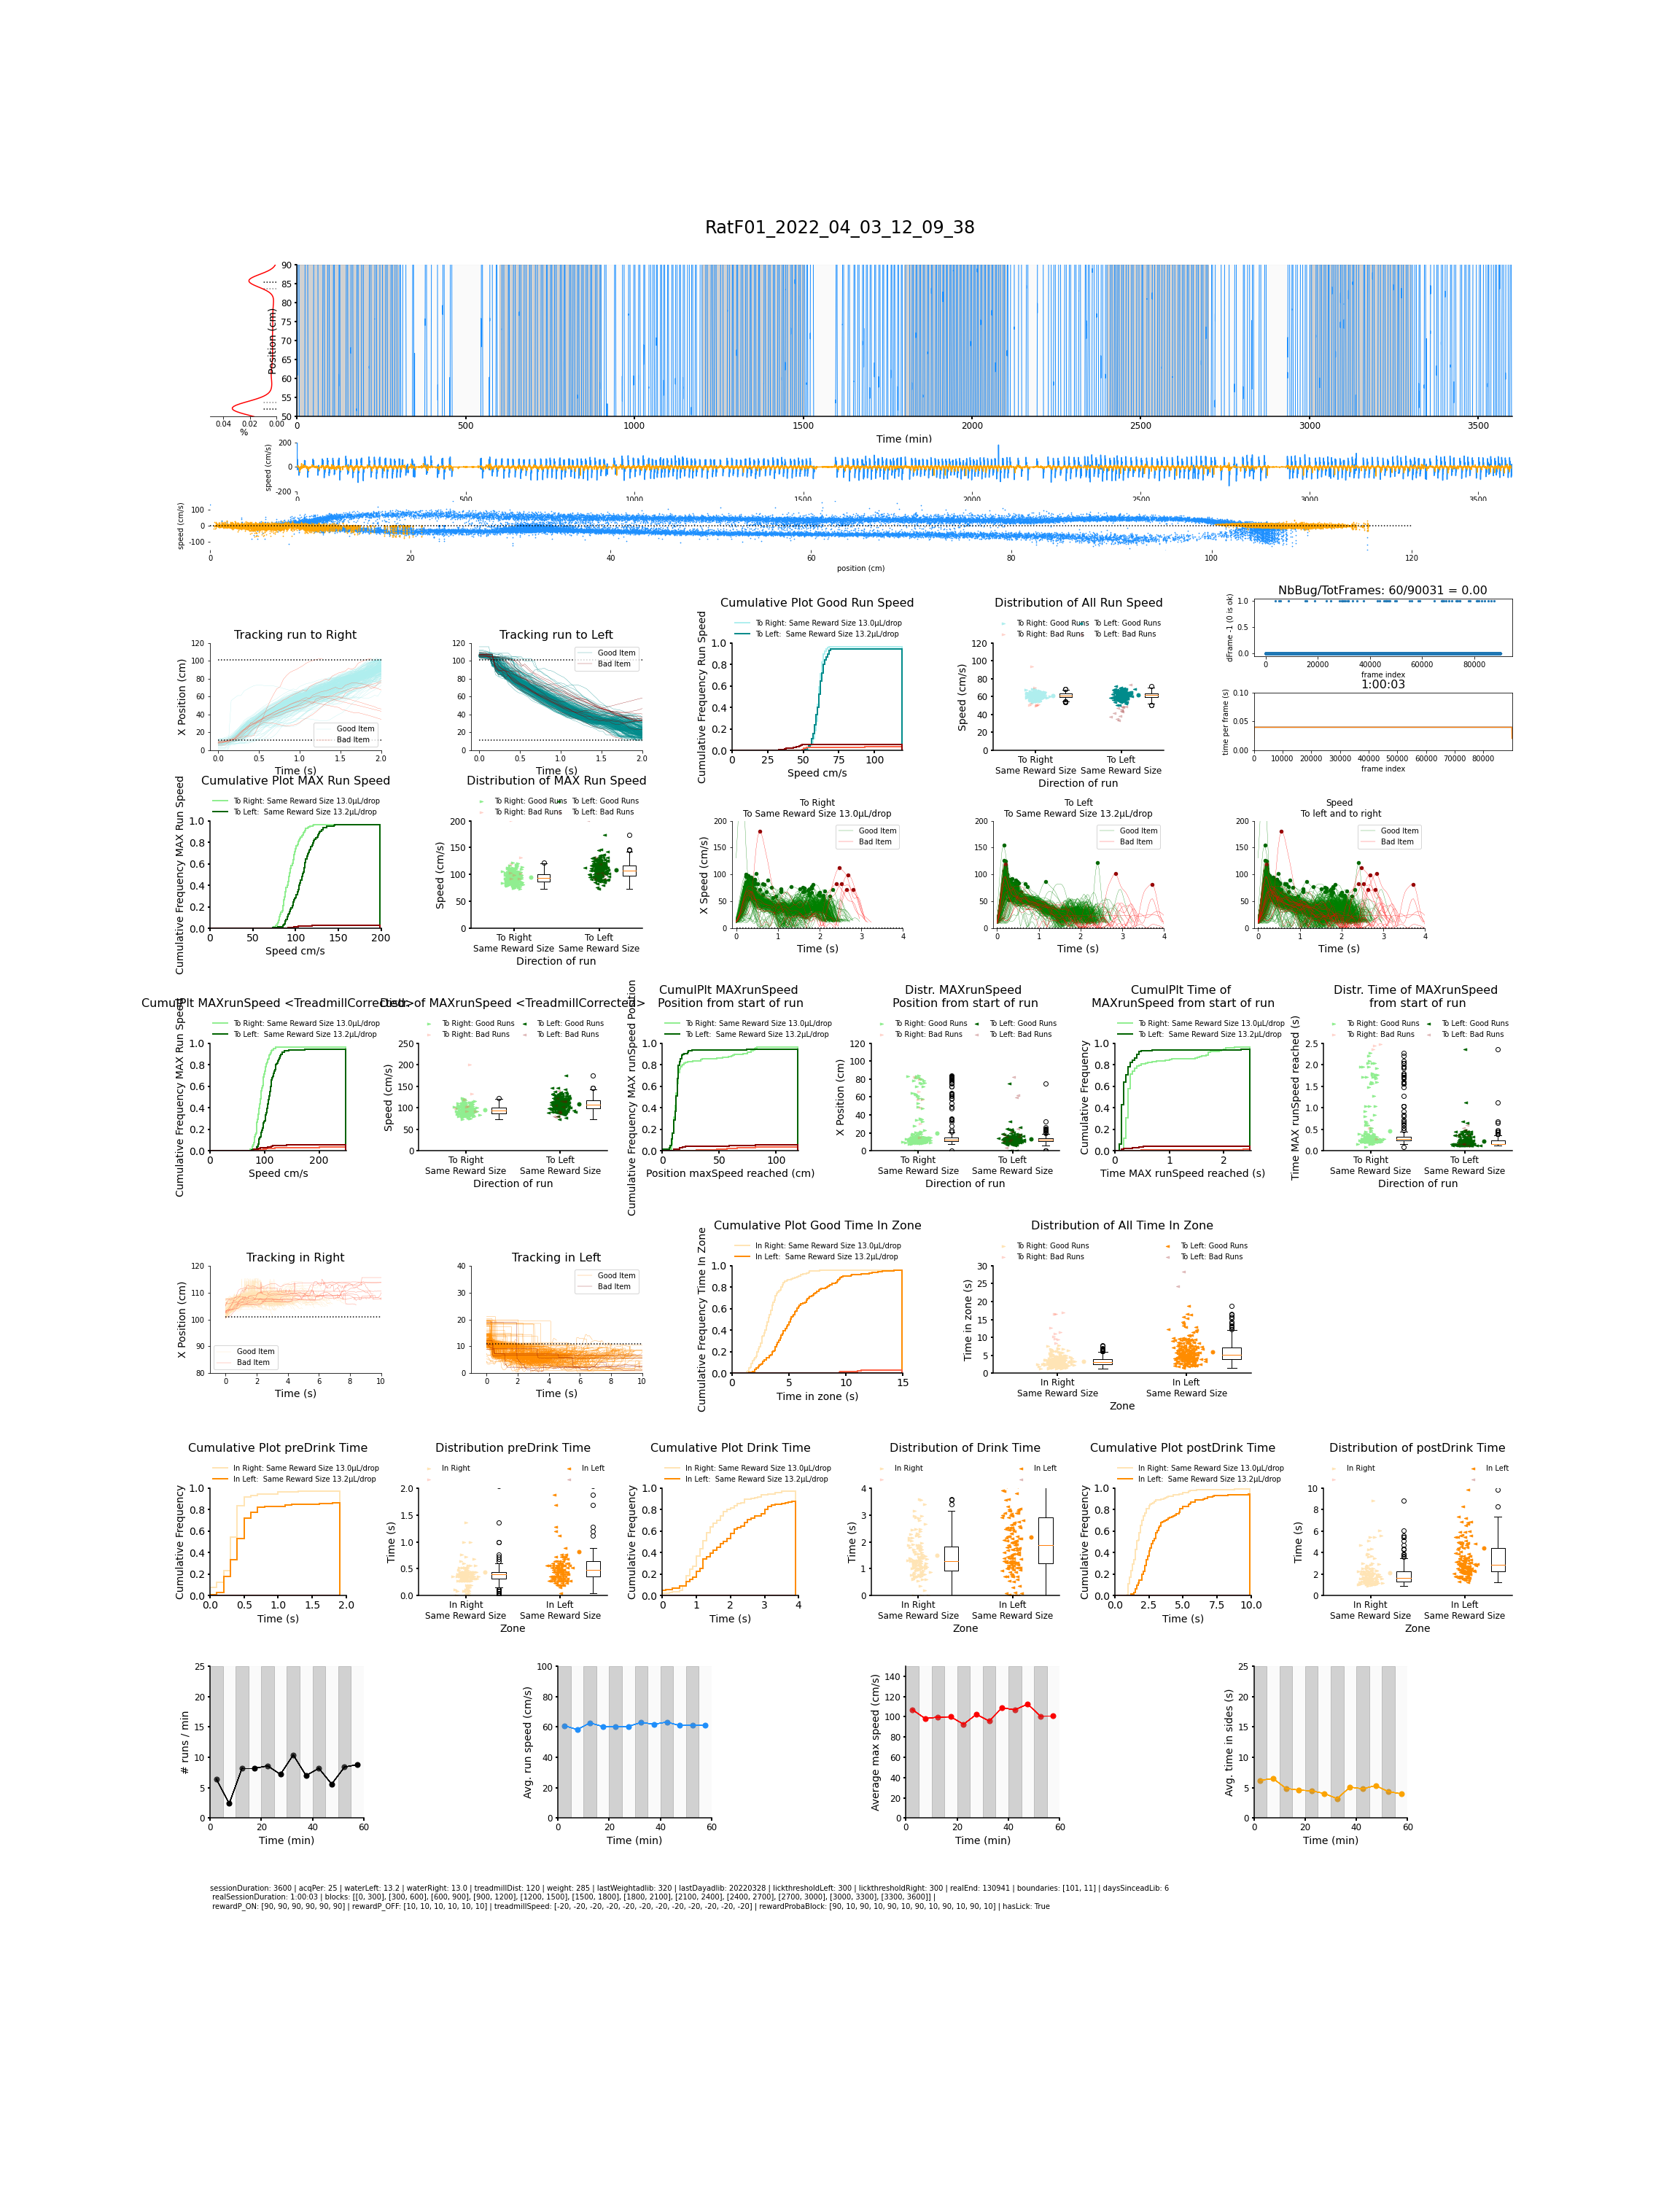

In [98]:


# Plot figure
fig = plt.figure(constrained_layout = False, figsize=(32, 42))
fig.suptitle(session, y=0.9, fontsize = 24)
gs = fig.add_gridspec(75, 75)
ax00 = fig.add_subplot(gs[0:7, 0:4])
ax00 = plot_peak(rawPositionX[animal, session], animal, session, leftBoundaryPeak[animal, session], rightBoundaryPeak[animal, session], kde[animal, session],[0.05, 0, 0],[0,120,0],  marker = [""], xyLabels=["Position (cm)", "%"])
ax01 = fig.add_subplot(gs[0:7, 5:75])
ax01 = plot_BASEtrajectoryV2(animal, session, rawTime[animal, session], goodPos[animal, session], badPos[animal, session], rawLickLeftX[animal, session], rawLickRightX[animal, session], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration'], 50, 90, 0, 22, 10],  xyLabels=["Time (min)","", "Position (cm)", "", "", "", 14, 12], title=[session, "", "", "", 16], linewidth = [1.5])
plt.plot([0, params[animal, session]['sessionDuration']], [params[animal, session]["boundaries"][0], params[animal, session]["boundaries"][0]], ":", color='k', alpha = 0.5)
plt.plot([0, params[animal, session]['sessionDuration']], [params[animal, session]["boundaries"][1], params[animal, session]["boundaries"][1]], ":", color='k', alpha = 0.5)

gs00 = gs[8:13, 0:75].subgridspec(2,75)
ax11 = fig.add_subplot(gs00[0, 5:75])
ax12 = fig.add_subplot(gs00[1, 0:75])
ax11.plot(rawTime[animal,session], goodSpeed[animal,session], color = 'dodgerblue')
ax11.plot(rawTime[animal,session], badSpeed[animal, session], color = 'orange')
ax11.set_xlabel('time (s)')
ax11.set_ylabel('speed (cm/s)')
ax11.set_xlim(0, 3600)
ax11.set_ylim(-200,200)
ax11.spines['top'].set_color("none")
ax11.spines['right'].set_color("none")
ax11.spines['left'].set_color("none")
ax11.spines['bottom'].set_color("none")
ax12.scatter(rawPositionX[animal,session], goodSpeed[animal,session], color = 'dodgerblue', s=0.5)
ax12.scatter(rawPositionX[animal,session], badSpeed[animal,session], color = 'orange', s=0.5)
ax12.set_xlabel('position (cm)')
ax12.set_ylabel('speed (cm/s)')
ax12.set_xlim(0,130)
ax12.set_ylim(-150,150)
ax12.spines['top'].set_color("none")
ax12.spines['right'].set_color("none")
ax12.spines['left'].set_color("none")
ax12.spines['bottom'].set_color("none")
yline = [0, 120]
xline = [0,0]
ax12.plot(yline, xline, ":", color='k')

ax20 = fig.add_subplot(gs[17:22, 0:10])
ax20 = plot_tracks(animal, session, good_XtrackRunToRight[animal, session], good_timeRunToRight[animal, session], bad_XtrackRunToRight[animal, session], bad_timeRunToRight[animal, session], params[animal, session]["boundaries"], xylim = [-0.1, 2, 0, 120], color=['paleturquoise', 'tomato'],  xyLabels=["Time (s)","X Position (cm)", 14], title=["Tracking run to Right",  16], linewidth = [1.5])
ax21 = fig.add_subplot(gs[17:22, 15:25])       
ax21 = plot_tracks(animal, session, good_XtrackRunToLeft[animal, session], good_timeRunToLeft[animal, session], bad_XtrackRunToLeft[animal, session], bad_timeRunToLeft[animal, session], params[animal, session]["boundaries"], xylim = [-0.1, 2, 0, 120], color = ['darkcyan', 'darkred'], xyLabels=["Time (s)","", 14], title=["Tracking run to Left", 16], linewidth = [1.5])
ax20 = fig.add_subplot(gs[17:22, 30:40])
ax20 = cumul_plot(good_speedRunToRight[animal, session], good_speedRunToLeft[animal, session], bad_speedRunToRight[animal, session], bad_speedRunToLeft[animal, session], barplotaxes = [0, 120, 0, 1], maxminstepbin = [0,120,1], scatterplotaxes = [0, 0, 0, 0], color = ['paleturquoise', 'darkcyan', 'tomato', 'darkred'], xyLabels=["Speed cm/s","Cumulative Frequency Run Speed", 14, 12], title=["Cumulative Plot Good Run Speed", 16], linewidth = [1.5], legend = ["To Right: " + water[animal, session][1] + " " + str(params[animal, session]["waterRight"]) + "µL/drop", "To Left:  " + water[animal, session][0] + " " + str(params[animal, session]["waterLeft"]) + "µL/drop", water[animal, session][2], water[animal, session][3]])
ax21 = fig.add_subplot(gs[17:22, 45:55])       
ax21 = distribution_plot(good_speedRunToRight[animal, session], good_speedRunToLeft[animal, session], bad_speedRunToRight[animal, session], bad_speedRunToLeft[animal, session], barplotaxes = [0, 0, 0, 0], maxminstepbin = [0, 120, 1], scatterplotaxes = [0.5, 2.5, 0, 120], color = ['paleturquoise', 'darkcyan', 'tomato', 'darkred'], xyLabels=["Speed (cm/s)", "Direction of run", "To Right" + "\n" + water[animal, session][1], "To Left" + "\n" + water[animal, session][0], 14, 12], title=["Distribution of All Run Speed", 16], linewidth = [1.5], legend = ["To Right: Good Runs ", "To Left: Good Runs", "To Right: Bad Runs", "To Left: Bad Runs"])

gs23 = gs[15:22, 60:75].subgridspec(5,2)
ax231 = fig.add_subplot(gs23[0:2, 0:2])
if len(framebuffer[animal, session]) != 0:
    ax231.set_title("NbBug/TotFrames: %s/%s = %.2f" %(sum(np.diff(framebuffer[animal, session])-1), len(framebuffer[animal, session]), sum(np.diff(framebuffer[animal, session])-1)/len(framebuffer[animal, session])), fontsize = 16)
ax231.scatter(list(range(1, len(framebuffer[animal, session]))), [ x-1 for x in np.diff(framebuffer[animal, session])], s=5)
ax231.set_xlabel("frame index")
ax231.set_ylabel("dFrame -1 (0 is ok)")
ax232 = fig.add_subplot(gs23[3:5, 0:2])
ax232.set_title(params[animal, session]["realSessionDuration"], fontsize = 16)
ax232.plot(np.diff(rawTime[animal, session]), label = "data")
ax232.plot(movinavg(np.diff(rawTime[animal, session]), 100), label="moving average")
ax232.set_xlim(0, len(np.diff(rawTime[animal, session])))
ax232.set_ylim(0, 0.1)
ax232.set_xlabel("frame index")
ax232.set_ylabel("time per frame (s)")

ax30 = fig.add_subplot(gs[25:30, 0:10])
ax30 = cumul_plot(good_maxSpeedRight[animal, session], good_maxSpeedLeft[animal, session], bad_maxSpeedRight[animal, session], bad_maxSpeedRight[animal, session], barplotaxes = [0, 200, 0, 1], maxminstepbin = [0,200,1], scatterplotaxes = [0.5, 2.5, 0, 100], color=['lightgreen', 'darkgreen', 'tomato', 'darkred'], xyLabels=["Speed cm/s","Cumulative Frequency MAX Run Speed", 14, 12], title=["Cumulative Plot MAX Run Speed", 16], linewidth = [1.5], legend = ["To Right: " + water[animal, session][1] + " " + str(params[animal, session]["waterRight"]) + "µL/drop", "To Left:  " + water[animal, session][0] + " " + str(params[animal, session]["waterLeft"]) + "µL/drop", water[animal, session][2], water[animal, session][3]])
ax31 = fig.add_subplot(gs[25:30, 15:25])
ax31 = distribution_plot(good_maxSpeedRight[animal, session], good_maxSpeedLeft[animal, session], bad_maxSpeedRight[animal, session], bad_maxSpeedRight[animal, session], barplotaxes = [0, 100, 0, 1], maxminstepbin = [0, 100, 1], scatterplotaxes = [0.5, 2.5, 0, 200], color=['lightgreen', 'darkgreen', 'tomato', 'darkred'], xyLabels=["Speed (cm/s)", "Direction of run", "To Right" + "\n" + water[animal, session][1], "To Left" + "\n" + water[animal, session][0], 14, 12], title = ["Distribution of MAX Run Speed", 16], linewidth = [1.5], legend = ["To Right: Good Runs", "To Left: Good Runs", "To Right: Bad Runs", "To Left: Bad Runs"])
ax32 = fig.add_subplot(gs[25:30, 30:40])
ax32 = plot_speed(animal, session, good_instantSpeedRight[animal, session], good_timeRunToRight[animal, session], bad_instantSpeedRight[animal, session], bad_timeRunToRight[animal, session], [0,0], xylim = [-0.1, 4, 0, 200], xyLabels=["Time (s)","X Speed (cm/s)", 14], title=["To Right" + "\n" + "To " + water[animal, session][1] + " " + str(params[animal, session]["waterRight"]) + "µL/drop", 12], linewidth = [1.5])
ax33 = fig.add_subplot(gs[25:30, 45:55])
ax33 = plot_speed(animal, session, good_instantSpeedLeft[animal, session], good_timeRunToLeft[animal, session], bad_instantSpeedLeft[animal, session], bad_timeRunToLeft[animal, session], [0,0], xylim = [-0.1, 4, 0, 200], xyLabels=["Time (s)","", 14], title=["To Left" + "\n" + "To " + water[animal, session][0] + " " + str(params[animal, session]["waterLeft"]) + "µL/drop", 12], linewidth = [1.5])
ax34 = fig.add_subplot(gs[25:30, 60:70])
ax34 = plot_speed(animal, session, good_instantSpeedRight[animal, session]+good_instantSpeedLeft[animal, session], good_timeRunToRight[animal, session]+good_timeRunToLeft[animal, session], bad_instantSpeedRight[animal, session]+bad_instantSpeedLeft[animal, session], bad_timeRunToRight[animal, session]+bad_timeRunToLeft[animal, session], [0,0], xylim = [-0.1, 4, 0, 200], xyLabels=["Time (s)","", 14], title=["Speed" + "\n" + " To left and to right", 12], linewidth = [0.5])

ax40 = fig.add_subplot(gs[35:40, 0:8])
ax40 = cumul_plot(good_maxSpeedRight[animal, session], good_maxSpeedLeft[animal, session], bad_maxSpeedRight[animal, session], bad_maxSpeedLeft[animal, session], barplotaxes = [0, 250, 0, 1], maxminstepbin = [0, 250, 1], scatterplotaxes = [0, 0, 0, 0], color=['lightgreen', 'darkgreen', 'tomato', 'darkred'], xyLabels=["Speed cm/s","Cumulative Frequency MAX Run Speed", 14, 12], title=["CumulPlt MAXrunSpeed <TreadmillCorrected>", 16], linewidth = [1.5], legend = ["To Right: " + water[animal, session][1] + " " + str(params[animal, session]["waterRight"]) + "µL/drop", "To Left:  " + water[animal, session][0] + " " + str(params[animal, session]["waterLeft"]) + "µL/drop", water[animal, session][2], water[animal, session][3]])
ax41 = fig.add_subplot(gs[35:40, 12:23])
ax41 = distribution_plot(good_maxSpeedRight[animal, session], good_maxSpeedLeft[animal, session], bad_maxSpeedRight[animal, session], bad_maxSpeedLeft[animal, session], barplotaxes = [0, 0, 0, 0], maxminstepbin = [0, 0, 0], scatterplotaxes = [0.5, 2.5, 0, 250], color=['lightgreen', 'darkgreen', 'tomato', 'darkred'], xyLabels=["Speed (cm/s)", "Direction of run", "To Right" + "\n" + water[animal, session][1], "To Left" + "\n" + water[animal, session][0], 14, 12], title = ["Distr. of MAXrunSpeed <TreadmillCorrected>", 16], linewidth = [1.5], legend = ["To Right: Good Runs", "To Left: Good Runs", "To Right: Bad Runs", "To Left: Bad Runs"])
ax42 = fig.add_subplot(gs[35:40, 26:34]) #where maxspeed
ax42 = cumul_plot(good_wheremaxSpeedRight[animal, session], good_wheremaxSpeedLeft[animal, session], bad_wheremaxSpeedRight[animal, session], bad_wheremaxSpeedLeft[animal, session], barplotaxes = [0, 120, 0, 1], maxminstepbin = [0, 120, 1], scatterplotaxes = [0, 0, 0, 0], color=['lightgreen', 'darkgreen', 'tomato', 'darkred'], xyLabels=["Position maxSpeed reached (cm)", "Cumulative Frequency MAX runSpeed Position", 14, 12], title=["CumulPlt MAXrunSpeed \nPosition from start of run", 16], linewidth = [1.5], legend = ["To Right: " + water[animal, session][1] + " " + str(params[animal, session]["waterRight"]) + "µL/drop", "To Left:  " + water[animal, session][0] + " " + str(params[animal, session]["waterLeft"]) + "µL/drop", water[animal, session][2], water[animal, session][3]])
ax43 = fig.add_subplot(gs[35:40, 38:49])
ax43 = distribution_plot(good_wheremaxSpeedRight[animal, session], good_wheremaxSpeedLeft[animal, session], bad_wheremaxSpeedRight[animal, session], bad_wheremaxSpeedLeft[animal, session], barplotaxes = [0, 0, 0, 0], maxminstepbin = [0, 0, 0], scatterplotaxes = [0.5, 2.5, 0, 120], color=['lightgreen', 'darkgreen', 'tomato', 'darkred'], xyLabels=["X Position (cm)", "Direction of run", "To Right" + "\n" + water[animal, session][1], "To Left" + "\n" + water[animal, session][0], 14, 12], title = ["Distr. MAXrunSpeed \nPosition from start of run", 16], linewidth = [1.5], legend = ["To Right: Good Runs", "To Left: Good Runs", "To Right: Bad Runs", "To Left: Bad Runs"])
ax44 = fig.add_subplot(gs[35:40, 52:60]) #when maxspeed
ax44 = cumul_plot(good_whenmaxSpeedRight[animal, session], good_whenmaxSpeedLeft[animal, session], bad_whenmaxSpeedRight[animal, session], bad_whenmaxSpeedLeft[animal, session], barplotaxes = [0, 2.5, 0, 1], maxminstepbin = [0, 2.5, 0.04], scatterplotaxes = [0, 0, 0, 0], color=['lightgreen', 'darkgreen', 'tomato', 'darkred'], xyLabels=["Time MAX runSpeed reached (s)","Cumulative Frequency", 14, 12], title=["CumulPlt Time of \nMAXrunSpeed from start of run", 16], linewidth = [1.5], legend = ["To Right: " + water[animal, session][1] + " " + str(params[animal, session]["waterRight"]) + "µL/drop", "To Left:  " + water[animal, session][0] + " " + str(params[animal, session]["waterLeft"]) + "µL/drop", water[animal, session][2], water[animal, session][3]])
ax45 = fig.add_subplot(gs[35:40, 64:75])
ax45 = distribution_plot(good_whenmaxSpeedRight[animal, session], good_whenmaxSpeedLeft[animal, session], bad_whenmaxSpeedRight[animal, session], bad_whenmaxSpeedLeft[animal, session], barplotaxes = [0, 0, 0, 0], maxminstepbin = [0, 0, 0], scatterplotaxes = [0.5, 2.5, 0, 2.5], color=['lightgreen', 'darkgreen', 'tomato', 'darkred'], xyLabels=["Time MAX runSpeed reached (s)", "Direction of run", "To Right" + "\n" + water[animal, session][1], "To Left" + "\n" + water[animal, session][0], 14, 12], title = ["Distr. Time of MAXrunSpeed \nfrom start of run", 16], linewidth = [1.5], legend = ["To Right: Good Runs", "To Left: Good Runs", "To Right: Bad Runs", "To Left: Bad Runs"])

ax50 = fig.add_subplot(gs[45:50, 0:10])  
ax50 = plot_tracks(animal, session, good_XtrackStayInRight[animal, session], good_TtrackStayInRight[animal, session], bad_XtrackStayInRight[animal, session], bad_TtrackStayInRight[animal, session], params[animal, session]["boundaries"], xylim = [-1, 10, params[animal, session]['treadmillDist']-40, params[animal, session]['treadmillDist']], color=['moccasin', 'tomato'], xyLabels=["Time (s)","X Position (cm)", 14, 12], title=["Tracking in Right", 16], linewidth = [1.5])
ax51 = fig.add_subplot(gs[45:50, 15:25])
ax51 = plot_tracks(animal, session, good_XtrackStayInLeft[animal, session], good_TtrackStayInLeft[animal, session], bad_XtrackStayInLeft[animal, session], bad_TtrackStayInLeft[animal, session], params[animal, session]["boundaries"], xylim = [-1, 10, 0, 40], color = ['darkorange', 'darkred'], xyLabels=["Time (s)","", 14, 12], title=["Tracking in Left", 16], linewidth = [1.5])
ax52 = fig.add_subplot(gs[45:50, 30:40])  
ax52 = cumul_plot(good_timeStayInRight[animal, session], good_timeStayInLeft[animal, session], bad_timeStayInRight[animal, session], bad_timeStayInLeft[animal, session], barplotaxes = [0, 15, 0, 1], maxminstepbin = [0, 15, 0.1], scatterplotaxes = [0, 0, 0, 0], color = ['moccasin', 'darkorange', 'tomato', 'darkred'], xyLabels=["Time in zone (s)","Cumulative Frequency Time In Zone", 14, 12], title=["Cumulative Plot Good Time In Zone", 16], linewidth = [1.5], legend = ["In Right: " + water[animal, session][1] + " " + str(params[animal, session]["waterRight"]) + "µL/drop", "In Left:  " + water[animal, session][0] + " " + str(params[animal, session]["waterLeft"]) + "µL/drop", water[animal, session][2], water[animal, session][3]])
ax53 = fig.add_subplot(gs[45:50, 45:60])
ax53 = distribution_plot(good_timeStayInRight[animal, session], good_timeStayInLeft[animal, session], bad_timeStayInRight[animal, session], bad_timeStayInLeft[animal, session], barplotaxes = [0, 0, 0, 0], maxminstepbin = [0,30,1], scatterplotaxes = [0.5, 2.5, 0, 30], color = ['moccasin', 'darkorange', 'tomato', 'darkred'], xyLabels=["Time in zone (s)", "Zone", "In Right" + "\n" + water[animal, session][1], "In Left" + "\n" + water[animal, session][0], 14, 12], title=["Distribution of All Time In Zone", 16], linewidth = [1.5], legend = ["To Right: Good Runs", "To Left: Good Runs", "To Right: Bad Runs", "To Left: Bad Runs"]) 

ax60 = fig.add_subplot(gs[55:60, 0:8])
ax60 = cumul_plot(lick_arrivalRight[animal, session], lick_arrivalLeft[animal, session], [], [], barplotaxes = [0, 2, 0, 1], maxminstepbin = [0,2,0.1], scatterplotaxes = [0.5, 2.5, 0, 100], color=['moccasin', 'darkorange', 'tomato', 'darkred'], xyLabels=["Time (s)","Cumulative Frequency", 14, 12], title=["Cumulative Plot preDrink Time", 16], linewidth = [1.5], legend = ["In Right: " + water[animal, session][1] + " " + str(params[animal, session]["waterRight"]) + "µL/drop", "In Left:  " + water[animal, session][0] + " " + str(params[animal, session]["waterLeft"]) + "µL/drop", water[animal, session][2], water[animal, session][3]])
ax61 = fig.add_subplot(gs[55:60, 12:23])
ax61 = distribution_plot(lick_arrivalRight[animal, session], lick_arrivalLeft[animal, session], [], [], barplotaxes = [0, 100, 0, 1], maxminstepbin = [0, 100, 1], scatterplotaxes = [0.5, 2.5, 0, 2], color=['moccasin', 'darkorange', 'tomato', 'darkred'], xyLabels=["Time (s)", "Zone", "In Right" + "\n" + water[animal, session][1], "In Left" + "\n" + water[animal, session][0], 14, 12], title=["Distribution preDrink Time", 16], linewidth = [1.5], legend = ["In Right", "In Left", " ", " "])
ax62 = fig.add_subplot(gs[55:60, 26:34])
ax62 = cumul_plot(lick_drinkingRight[animal, session], lick_drinkingLeft[animal, session], [], [], barplotaxes = [0, 4, 0, 1], maxminstepbin = [0,4,0.1], scatterplotaxes = [0.5, 2.5, 0, 100], color=['moccasin', 'darkorange', 'tomato', 'darkred'], xyLabels=["Time (s)","Cumulative Frequency", 14, 12], title=["Cumulative Plot Drink Time", 16], linewidth = [1.5], legend = ["In Right: " + water[animal, session][1] + " " + str(params[animal, session]["waterRight"]) + "µL/drop", "In Left:  " + water[animal, session][0] + " " + str(params[animal, session]["waterLeft"]) + "µL/drop", water[animal, session][2], water[animal, session][3]])
ax63 = fig.add_subplot(gs[55:60, 38:49])
ax63 = distribution_plot(lick_drinkingRight[animal, session], lick_drinkingLeft[animal, session], [], [], barplotaxes = [0, 100, 0, 1], maxminstepbin = [0, 100, 1], scatterplotaxes = [0.5, 2.5, 0, 4], color=['moccasin', 'darkorange', 'tomato', 'darkred'], xyLabels=["Time (s)", "Zone", "In Right" + "\n" + water[animal, session][1], "In Left" + "\n" + water[animal, session][0], 14, 12], title = ["Distribution of Drink Time", 16], linewidth = [1.5], legend = ["In Right", "In Left", " ", " "])
ax64 = fig.add_subplot(gs[55:60, 52:60])
ax64 = cumul_plot(lick_waitRight[animal, session], lick_waitLeft[animal, session], [], [], barplotaxes = [0, 10, 0, 1], maxminstepbin = [0,10,0.1], scatterplotaxes = [0.5, 2.5, 0, 100], color=['moccasin', 'darkorange', 'tomato', 'darkred'], xyLabels=["Time (s)","Cumulative Frequency", 14, 12], title=["Cumulative Plot postDrink Time", 16], linewidth = [1.5], legend = ["In Right: " + water[animal, session][1] + " " + str(params[animal, session]["waterRight"]) + "µL/drop", "In Left:  " + water[animal, session][0] + " " + str(params[animal, session]["waterLeft"]) + "µL/drop", water[animal, session][2], water[animal, session][3]])
ax65 = fig.add_subplot(gs[55:60, 64:75])
ax65 = distribution_plot(lick_waitRight[animal, session], lick_waitLeft[animal, session], [], [], barplotaxes = [0, 100, 0, 1], maxminstepbin = [0, 100, 1], scatterplotaxes = [0.5, 2.5, 0, 10], color=['moccasin', 'darkorange', 'tomato', 'darkred'], xyLabels=["Time (s)", "Zone", "In Right" + "\n" + water[animal, session][1], "In Left" + "\n" + water[animal, session][0], 14, 12], title = ["Distribution of postDrink Time", 16], linewidth = [1.5], legend = ["In Right", "In Left", " ", " "])

if len(params[animal, session]['blocks']) > 1:
    ax70 = fig.add_subplot(gs[63:70, 0:9])
    ax70 = plot_figBin([nb_runsBin[animal, session][i]/(int((blocks[i][1]-blocks[i][0])/60)) for i in range(0, len(blocks))], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5]);
    ax72 = fig.add_subplot(gs[63:70, 20:29])
    ax72 = plot_figBin([np.mean(good_speedRunToLeftBin[animal, session][i]+good_speedRunToRightBin[animal, session][i]) for i in range(0, len(blocks))], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 100], color = ['dodgerblue'], xyLabels=["Time (min)","Avg. run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5]);
    ax74 = fig.add_subplot(gs[63:70, 40:49])
    ax74 = plot_figBin([np.mean(good_maxSpeedRightBin[animal, session][i] + good_maxSpeedLeftBin[animal, session][i]) for i in range(0, len(blocks))], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 150], color = ['red'], xyLabels=["Time (min)", "Average max speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5]);
    ax76 = fig.add_subplot(gs[63:70, 60:69])
    ax76 = plot_figBin([np.mean(good_timeStayInLeftBin[animal, session][i]+good_timeStayInRightBin[animal, session][i]) for i in range(0, len(blocks))], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['orange'], xyLabels=["Time (min)","Avg. time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5]);

    #ax71 = fig.add_subplot(gs[63:70, 10:15])
    #ax71 = plot_figBinMean(ax71, [i/(int((params[animal, session]['blocks'][block][1]-params[animal, session]['blocks'][block][0])/60)) for block, i in enumerate(poolByReward([nb_runsBin[animal, session]], params[animal, session]["rewardP_OFF"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock']))], [i/(int((params[animal, session]['blocks'][block][1]-params[animal, session]['blocks'][block][0])/60)) for block, i in enumerate(poolByReward([nb_runsBin[animal, session]], params[animal, session]["rewardP_ON"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock']))], color = ['k'], ylim = (0, 25))
    #ax73 = fig.add_subplot(gs[63:70, 30:35])
    #ax73 = plot_figBinMean(ax73, [np.mean(i) for i in poolByReward([good_speedRunToRightBin[animal, session], good_speedRunToLeftBin[animal, session]], params[animal, session]["rewardP_OFF"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])], [np.mean(i) for i in poolByReward([good_speedRunToRightBin[animal, session], good_speedRunToLeftBin[animal, session]], params[animal, session]["rewardP_ON"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])], color = ['dodgerblue'], ylim = (0, 100))
    #ax75 = fig.add_subplot(gs[63:70, 50:55])
    #ax75 = plot_figBinMean(ax75, [np.mean(i) for i in poolByReward([good_maxSpeedRightBin[animal, session], good_maxSpeedLeftBin[animal, session]], params[animal, session]["rewardP_OFF"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])], [np.mean(i) for i in poolByReward([good_maxSpeedRightBin[animal, session], good_maxSpeedLeftBin[animal, session]], params[animal, session]["rewardP_ON"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])], color = ['red'], ylim = (0, 150))
    #ax77 = fig.add_subplot(gs[63:70, 70:75])
    #ax77 = plot_figBinMean(ax77, [np.mean(i) for i in poolByReward([good_timeStayInRightBin[animal, session], good_timeStayInLeftBin[animal, session]], params[animal, session]["rewardP_OFF"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])], [np.mean(i) for i in poolByReward([good_timeStayInRightBin[animal, session], good_timeStayInLeftBin[animal, session]], params[animal, session]["rewardP_ON"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])], color = ['orange'], ylim = (0, 25))
    
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
ax80 = fig.add_subplot(gs[73:74, 0:60])
ax80.spines['top'].set_color("none")
ax80.spines['right'].set_color("none")
ax80.spines['left'].set_color("none")
ax80.spines['bottom'].set_color("none")
ax80.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
ax80.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
text = ("sessionDuration: {0} | acqPer: {1} | waterLeft: {2} | waterRight: {3} | treadmillDist: {4} | weight: {5} | lastWeightadlib: {6} | lastDayadlib: {7} | lickthresholdLeft: {8} | lickthresholdRight: {9} | realEnd: {10} | boundaries: {11} | daysSinceadLib: {12} \n realSessionDuration: {13} | blocks: {14} | \n rewardP_ON: {15} | rewardP_OFF: {16} | treadmillSpeed: {17} | rewardProbaBlock: {18} | hasLick: {19}").format(params[animal,session]['sessionDuration'], params[animal,session]['acqPer'], params[animal,session]['waterLeft'], params[animal,session]['waterRight'], params[animal,session]['treadmillDist'], params[animal,session]['weight'], params[animal,session]['lastWeightadlib'], params[animal,session]['lastDayadlib'], params[animal,session]['lickthresholdLeft'], params[animal,session]['lickthresholdRight'], params[animal,session]['realEnd'], params[animal,session]['boundaries'], params[animal,session]['daysSinceadLib'],params[animal,session]['realSessionDuration'], params[animal,session]['blocks'], params[animal,session]['rewardP_ON'], params[animal,session]['rewardP_OFF'], params[animal,session]['treadmillSpeed'], params[animal,session]['rewardProbaBlock'], params[animal,session]['hasLick'])
ax80 = plt.text(0,0, str(text), wrap = True)



(-150.0, 150.0)

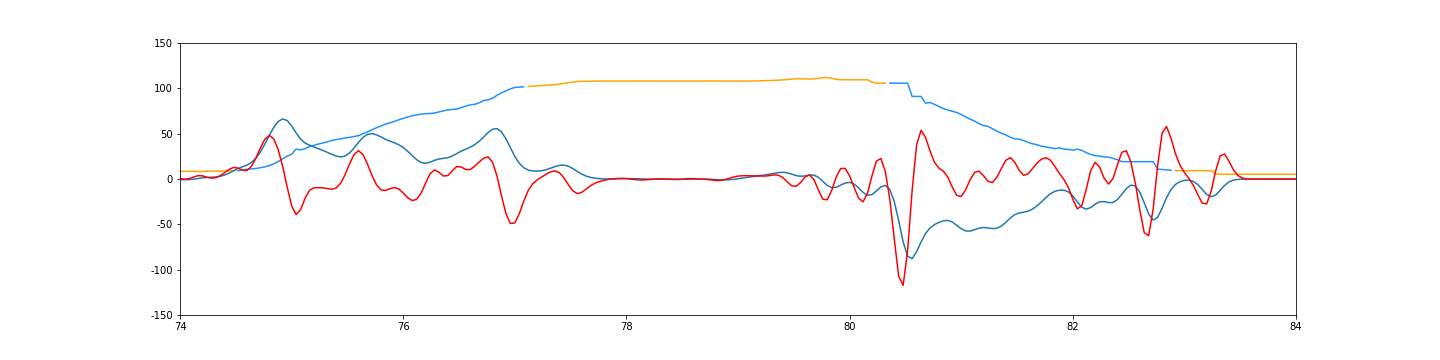

In [132]:
fig = plt.figure(constrained_layout = False, figsize=(20, 5))
plt.plot(rawTime[animal, session], goodPos[animal, session],color = 'dodgerblue')
plt.plot(rawTime[animal, session], badPos[animal, session], color = 'orange')
plt.plot(rawTime[animal, session], rawSpeed[animal, session])
plt.plot(rawTime[animal, session][1:], np.diff(rawSpeed[animal, session])*5, color = 'red')
plt.xlim(74, 84)
plt.ylim(-150, 150)

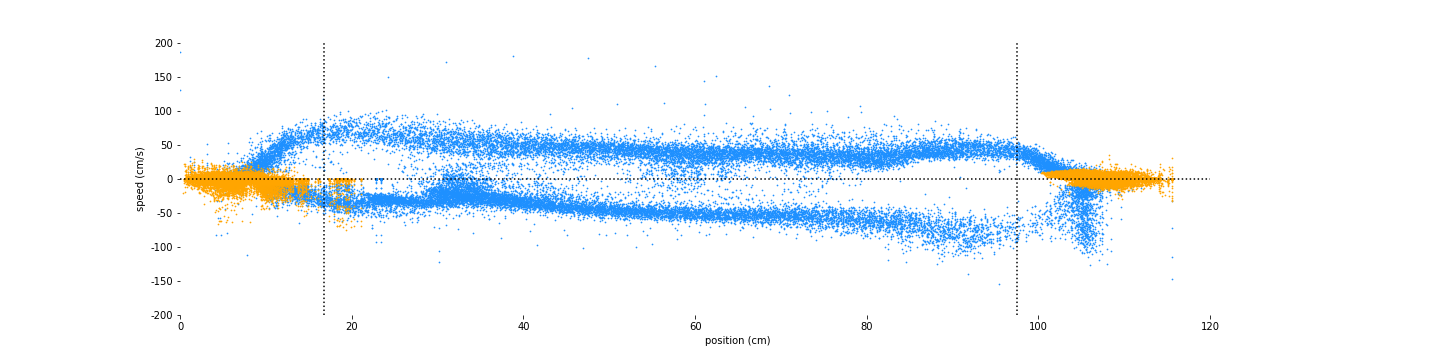

In [100]:
fig = plt.figure(constrained_layout = False, figsize=(20, 5))

gs = fig.add_gridspec(10, 10)
ax12 = fig.add_subplot(gs[:,:])
ax12.scatter(rawPositionX[animal,session], goodSpeed[animal,session], color = 'dodgerblue', s=0.5)

ax12.scatter(rawPositionX[animal,session], badSpeed[animal,session], color = 'orange', s=0.5)
ax12.set_xlabel('position (cm)')
ax12.set_ylabel('speed (cm/s)')
ax12.set_xlim(0,130)
ax12.set_ylim(-200,200)
ax12.spines['top'].set_color("none")
ax12.spines['right'].set_color("none")
ax12.spines['left'].set_color("none")
ax12.spines['bottom'].set_color("none")
yline = [0, 120]
xline = [0,0]
ax12.plot(yline, xline, ":", color='k')
ax12.plot([16.8, 16.8], [-200, 200], ":", color='k')
ax12.plot([97.5, 97.5], [-200, 200], ":", color='k')

In [101]:
print(185/11, 1072/11, 1280/11)

16.818181818181817 97.45454545454545 116.36363636363636


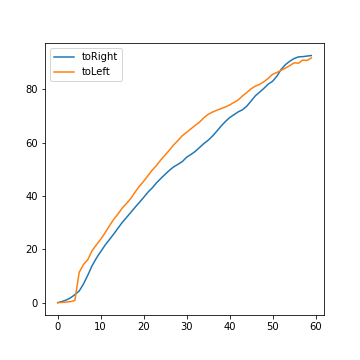

In [102]:
def plot_median_trajectory(good_PosdataRight, good_TimedataRight):
    median_plot = plt.gca()
    maxL = np.nanmax([len(j) for j in good_TimedataRight])
    avgPos = np.ones((len(good_TimedataRight), maxL))*np.nan
    for i, p in enumerate(good_PosdataRight): avgPos[i, 0:len(p)] = p
    nanSum = np.sum(np.isnan(avgPos), axis = 0)
    try: end_medTraj = np.where(nanSum > .7 * avgPos.shape[0])[0][0]
    except IndexError: end_medTraj = avgPos.shape[1]
    ci = (np.nanstd(avgPos, axis = 0)[:end_medTraj])/(np.sqrt(np.count_nonzero(~np.isnan(avgPos), axis = 0)[:end_medTraj]))
    plt.plot(np.linspace(0, end_medTraj*0.04, end_medTraj), np.nanmedian(avgPos, axis = 0)[:end_medTraj])
    plt.fill_between(np.linspace(0, end_medTraj*0.04, end_medTraj), np.nanmedian(avgPos, axis = 0)[:end_medTraj]-ci, np.nanmedian(avgPos, axis = 0)[:end_medTraj]+ci, color='b', alpha=0.5, zorder = 3)
    return median_plot

def compute_median_trajectory(posdataRight, timedataRight):
    try : maxL = np.nanmax([len(j) for j in timedataRight])
    except TypeError: maxL = 1
    except ValueError: maxL = 1
    avgPos = np.ones((len(timedataRight), maxL))*np.nan
    for i, p in enumerate(posdataRight): avgPos[i, 0:len(p)] = p
    nanSum = np.sum(np.isnan(avgPos), axis = 0)
    try: end_medTraj = np.where(nanSum > .7 * avgPos.shape[0])[0][0]
    except IndexError: end_medTraj = avgPos.shape[1]
    return np.nanmedian(avgPos, axis = 0)[:end_medTraj]


fig = plt.figure(constrained_layout = False, figsize=(5, 5))
#ax = plot_tracks2(animal, session, good_XtrackRunToRight[animal, session], good_timeRunToRight[animal, session], bad_XtrackRunToRight[animal, session], bad_timeRunToRight[animal, session],                               xylim = [-0.1, 2, 0, 120], color=['turquoise', 'tomato'], xyLabels=["Time (s)","X Position (cm)", 14], title=["Tracking run to Right",  16], linewidth = [1.5])
# ax = plot_median_trajectory(good_XtrackRunToRight[animal, session], good_timeRunToRight[animal, session])   
# ax = plot_median_trajectory(good_XtrackRunToLeft[animal, session], good_timeRunToLeft[animal, session])   
a= compute_median_trajectory(good_XtrackRunToRight[animal, session], good_timeRunToRight[animal, session])   
b= compute_median_trajectory(good_XtrackRunToLeft[animal, session], good_timeRunToLeft[animal, session])   
plt.plot( a - a[0], label = "toRight")
plt.plot(-b + b[0], label = "toLeft")
plt.legend()

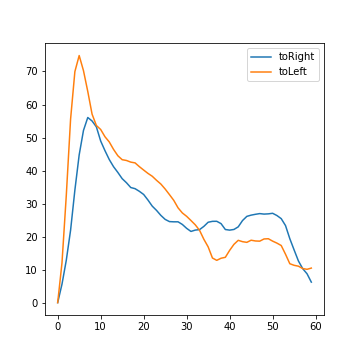

In [103]:

fig = plt.figure(constrained_layout = False, figsize=(5, 5))
#ax = plot_tracks2(animal, session, good_XtrackRunToRight[animal, session], good_timeRunToRight[animal, session], bad_XtrackRunToRight[animal, session], bad_timeRunToRight[animal, session],                               xylim = [-0.1, 2, 0, 120], color=['turquoise', 'tomato'], xyLabels=["Time (s)","X Position (cm)", 14], title=["Tracking run to Right",  16], linewidth = [1.5])
# ax = plot_median_trajectory(good_XtrackRunToRight[animal, session], good_timeRunToRight[animal, session])   
# ax = plot_median_trajectory(good_XtrackRunToLeft[animal, session], good_timeRunToLeft[animal, session])   
a= compute_median_trajectory(good_instantSpeedRight[animal, session], good_timeRunToRight[animal, session])   
b= compute_median_trajectory(good_instantSpeedLeft[animal, session], good_timeRunToLeft[animal, session])   
plt.plot( a - a[0], label = "toRight")
plt.plot(b - b[0], label = "toLeft")
plt.legend()

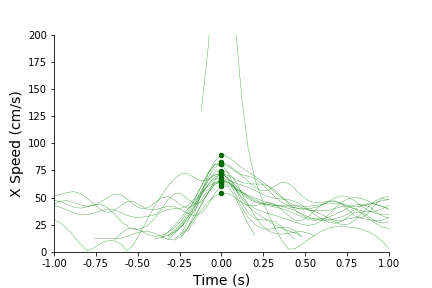

In [104]:
#plot rat speed along run
def plot_speedcenter(animal, session, posdataRight, timedataRight, bounds, xylim, xyLabels=["Speed cm/s","Quantity", "Direction", "Speed(cm/s)"], title=[None], linewidth = 1 ): 
    ax = plt.gca()
    for i, j in zip(posdataRight, timedataRight):
        time = np.subtract(j, j[0])
        iabs =  [abs(ele) for ele in i]
        #plt.plot(np.subtract(j, j[0]), iabs, color='g' , linewidth=0.3, label="Good Item" if i == posdataRight[0] else "")
        if len(np.where(i == max(i))[0]) == 1:
            maxspeed = max(iabs)
            maxspeedtime = np.where(iabs == maxspeed)[0]
            plt.scatter(time[maxspeedtime]-time[maxspeedtime], maxspeed, color ='darkgreen', s=20)
        else: print(max(i))
        plt.plot([_-j[0]-time[maxspeedtime] for _ in j], iabs, color='g' , linewidth=0.3, label="Good Item" if i == posdataRight[0] else "")
    ax.set_title(title[0], fontsize = title[1])
    ax.set_xlabel(xyLabels[0], fontsize = xyLabels[2])
    ax.set_ylabel(xyLabels[1], fontsize = xyLabels[2])
    ax.set_xlim([xylim[0], xylim[1]])
    ax.set_ylim([xylim[2], xylim[3]])
    ax.spines['top'].set_color("none")
    ax.spines['right'].set_color("none")
 
    return ax
ax = plot_speedcenter(animal, session, good_instantSpeedRightBin[animal, session][0], good_timeRunToRightBin[animal, session][0], [0,0], xylim = [-1, 1, 0, 200], xyLabels=["Time (s)","X Speed (cm/s)", 14], title=["", 12], linewidth = [1.5])



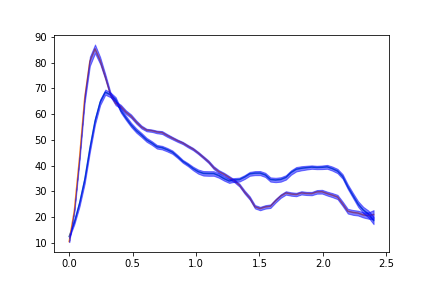

In [105]:
ax = plot_median_trajectory(good_instantSpeedRight[animal, session], good_timeRunToRight[animal, session])   
ax = plot_median_trajectory(good_instantSpeedLeft[animal, session], good_timeRunToLeft[animal, session])   

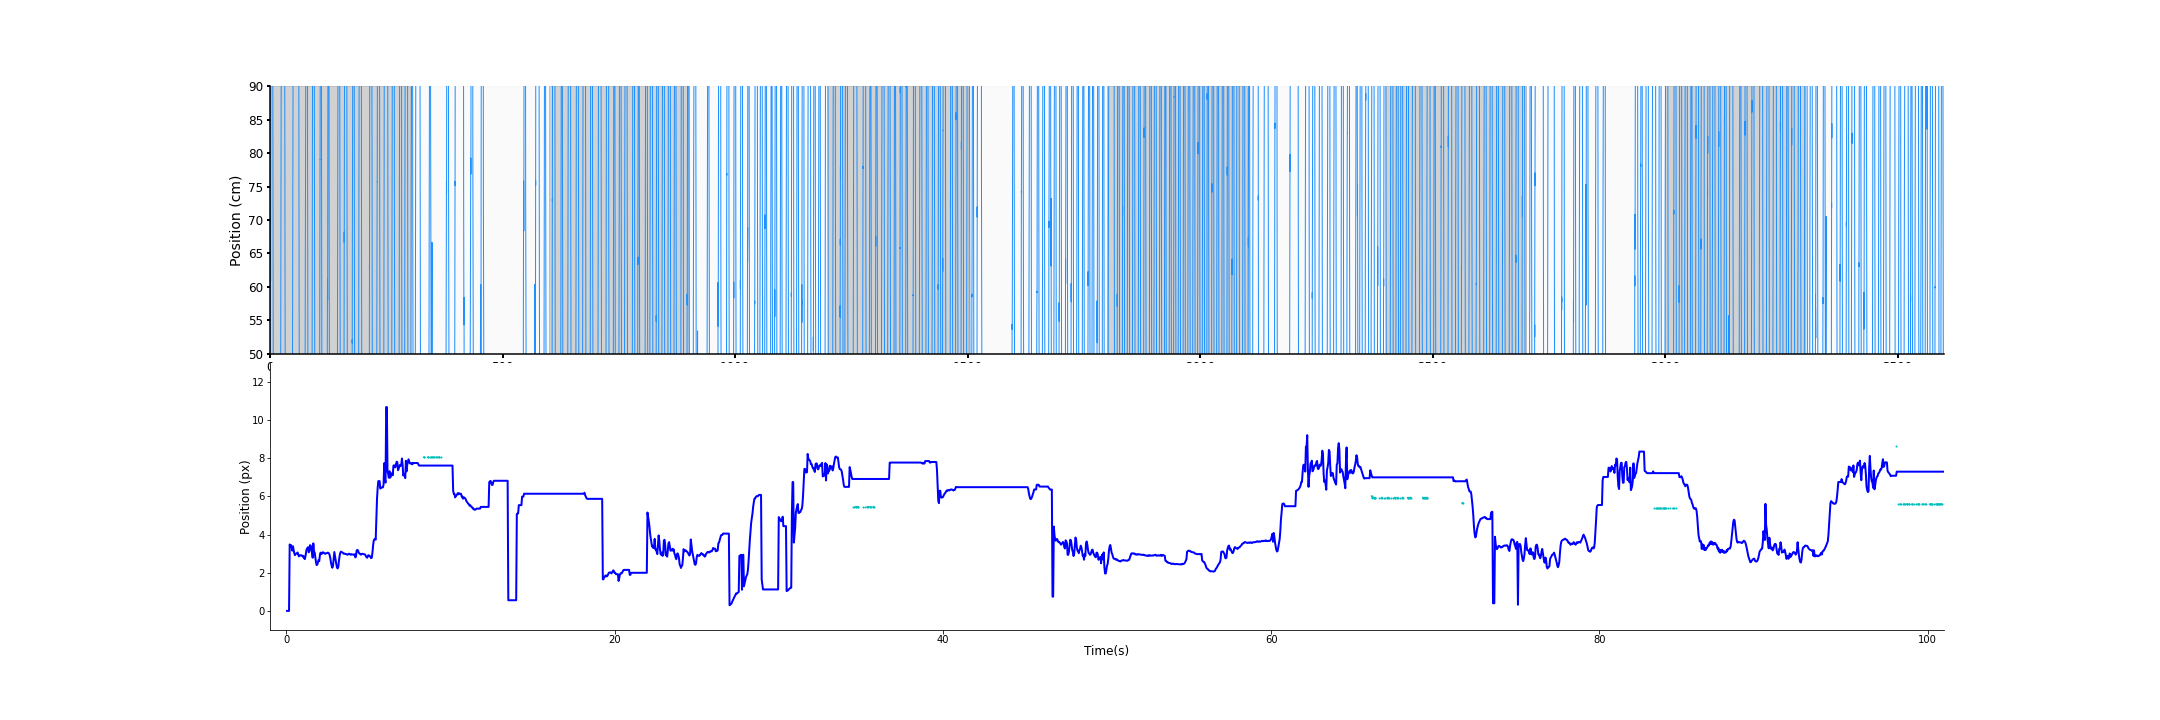

In [106]:
fig = plt.figure(constrained_layout = False, figsize=(30, 10))
fig.suptitle("", y=0.9, fontsize = 12)
gs = fig.add_gridspec(10, 12)

row1 = slice(0, 5)
row2 = slice(5, 10)


col1 = slice(0, 12)


ax00 = fig.add_subplot(gs[row1, col1])
ax00 = plot_BASEtrajectoryV2(animal, session, rawTime[animal, session], goodPos[animal, session], badPos[animal, session], rawLickLeftX[animal, session], rawLickRightX[animal, session], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration'], 50, 90, 0, 22, 10],  xyLabels=["Time (min)","", "Position (cm)", "", "", "", 14, 12], title=[session, "", "", "", 16], linewidth = [1.5])
                
ax01 = fig.add_subplot(gs[row2, col1])
ax01 = plot_BASEtrajectory(rawTime[animal, session], rawPositionY[animal, session], rawLickLeftX[animal, session], rawLickRightX[animal, session], [0, 100, 1],[0,12,1],  color = ["b", "c"], marker = ["", "o", 1], linewidth = [2], xyLabels=["Position (px)", "Time(s)"])


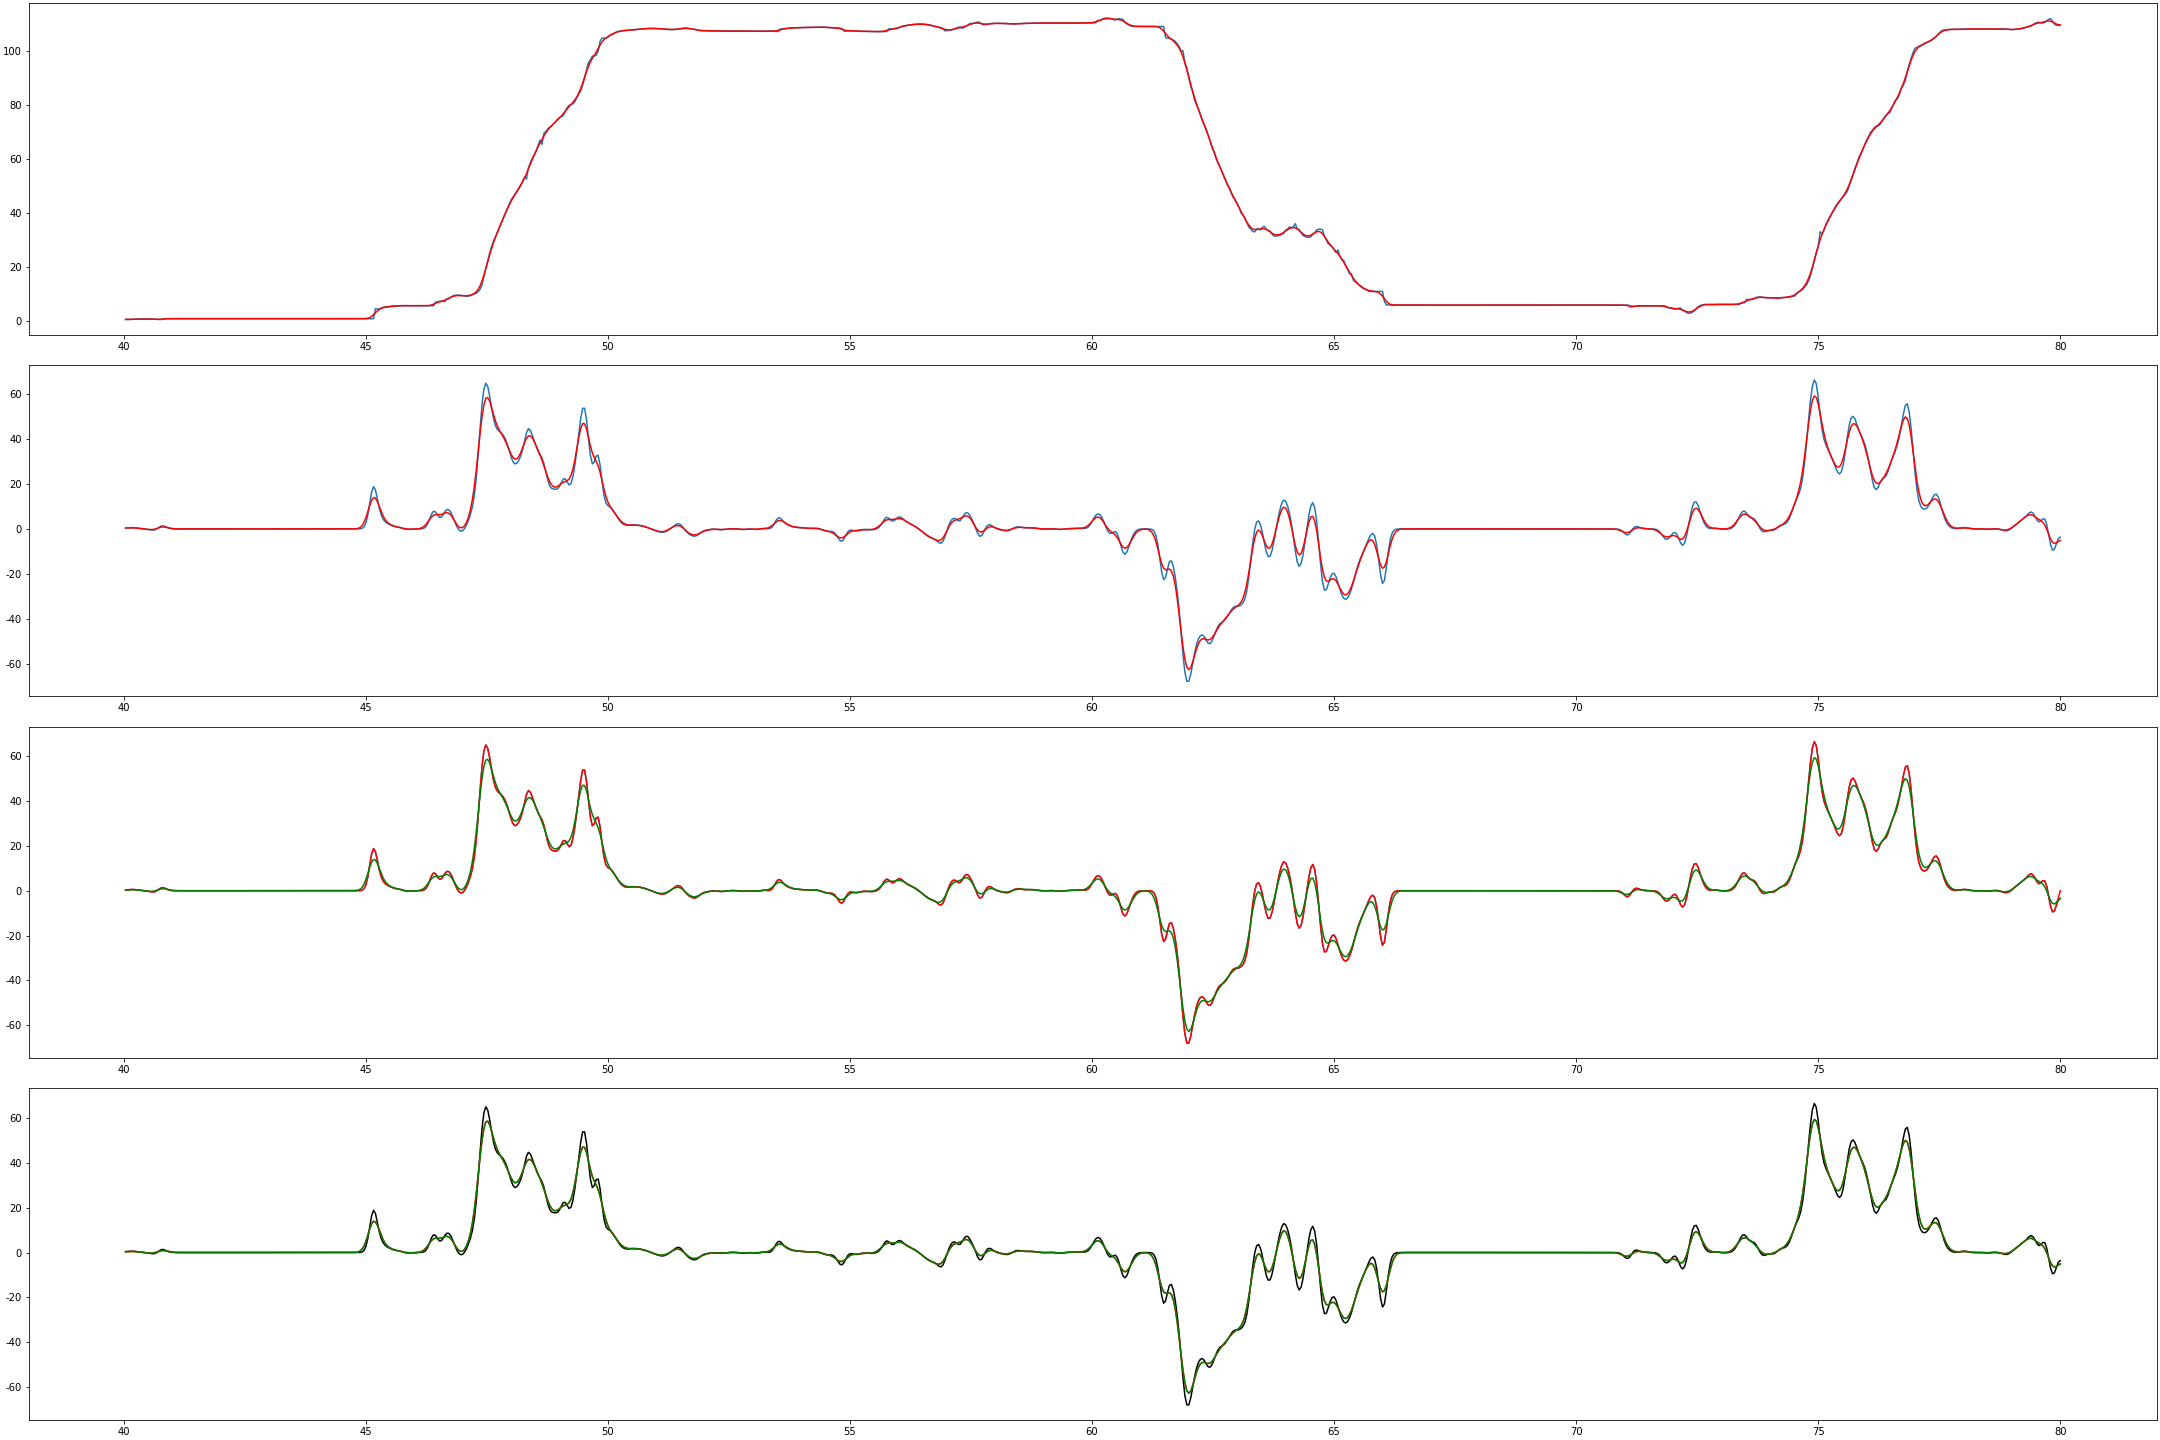

In [107]:
fig = plt.figure(constrained_layout = True, figsize=(30, 20))
slc = slice(1000, 2000)
gs = fig.add_gridspec(4, 2)

#smooth Pos
ax1 = fig.add_subplot(gs[0,:])
ax1 = plt.plot(rawTime[animal, session][slc], rawPositionX[animal, session][slc])
ax1 = plt.plot(rawTime[animal, session][slc], smooth(rawPositionX[animal, session][slc], 2), 'r')

#smooth on speed
ax2 = fig.add_subplot(gs[1,:])
ax2 = plt.plot(rawTime[animal, session][slc], rawSpeed[animal, session][slc])
ax2 = plt.plot(rawTime[animal, session][slc], smooth(rawSpeed[animal, session][slc], 2), 'r')


#smooth on position, compute speed with smooth position(r), then smooth this speed(g).
ax3 = fig.add_subplot(gs[2,:])
ax3 = plt.plot(rawTime[animal, session][slc], rawSpeed[animal, session][slc])
ax3 = plt.plot(rawTime[animal, session][slc], compute_speed(smooth(rawPositionX[animal, session][slc], 2), rawTime[animal, session][slc]), 'r')
ax3 = plt.plot(rawTime[animal, session][slc], smooth(compute_speed(smooth(rawPositionX[animal, session][slc], 2), rawTime[animal, session][slc]), 2), 'g')


test = copy.copy(rawSpeed[animal, session][slc])
ic = 50
win = 1
for i, (p, s) in enumerate(zip(rawSpeed[animal, session][slc], smooth(rawSpeed[animal, session][slc], 2))):
    if s - ic > p or p > s + ic: 
        if p > 0: test[i] = np.mean([rawSpeed[animal, session][i-win:i], rawSpeed[animal, session][i+1:i+1+win]])
        elif p < 0: test[i] = -np.mean([rawSpeed[animal, session][i-win:i], rawSpeed[animal, session][i+1:i+1+win]])
        elif p == 0: test[i] = np.mean([rawSpeed[animal, session][i-win:i], rawSpeed[animal, session][i+1:i+1+win]])
    else: test[i] = p

ax4 = fig.add_subplot(gs[3,:])
ax4 = plt.plot(rawTime[animal, session][slc], rawSpeed[animal, session][slc], 'k')
#ax4 = plt.plot(rawTime[animal, session][slc], test, 'g')
ax4 = plt.plot(rawTime[animal, session][slc], smooth(rawSpeed[animal, session][slc], 2), 'r')
ax4 = plt.plot(rawTime[animal, session][slc], smooth(test, 2), 'g')


In [108]:
#function that ?
runrightstart, runrightend, runleftstart, runleftend, speedrightstart, speedrightend, speedleftstart, speedleftend = ({} for i in range(8))
# for animal in animalList:
#     for session in [os.path.basename(expPath) for expPath in glob.glob(root+os.sep+animal+os.sep+"Experiments"+os.sep+"Rat*")]:
runrightstart[animal, session], runrightend[animal, session], runleftstart[animal, session], runleftend[animal, session], speedrightstart[animal, session], speedrightend[animal, session], speedleftstart[animal, session], speedleftend[animal, session] = ([] for i in range(8))
for i, j, k, l in zip(good_XtrackRunToRight[animal, session], good_XtrackRunToLeft[animal, session], good_instantSpeedRight[animal, session], good_instantSpeedLeft[animal, session]):
    runrightstart[animal, session].append(i[0])
    runrightend[animal, session].append(i[-1])
    runleftstart[animal, session].append(j[0])
    runleftend[animal, session].append(j[-1])
    speedrightstart[animal, session].append(k[0])
    speedrightend[animal, session].append(k[-1])
    speedleftstart[animal, session].append(l[0])
    speedleftend[animal, session].append(l[-1])
print(session)
print(np.mean(runrightstart[animal, session]), stats.sem(runrightstart[animal, session]))
print(np.mean(runrightend[animal, session]), stats.sem(runrightend[animal, session]))
print(np.mean(runleftstart[animal, session]), stats.sem(runleftstart[animal, session]))
print(np.mean(runleftend[animal, session]), stats.sem(runleftend[animal, session]))
print()
print(np.mean(speedrightstart[animal, session]), stats.sem(speedrightstart[animal, session]))
print(np.mean(speedrightend[animal, session]), stats.sem(speedrightend[animal, session]))
print(np.mean(speedleftstart[animal, session]), stats.sem(speedleftstart[animal, session]))
print(np.mean(speedleftend[animal, session]), stats.sem(speedleftend[animal, session]))

print()
print()


RatF01_2022_04_03_12_09_38
8.235890580008226 0.10232205064520569
102.45989222542164 0.0959971740460361
105.74230810366105 0.09180402277208695
12.595196215549159 0.18406038347346612

13.41876032125896 0.5489626343938091
13.825695150038776 0.12456308446408774
11.56665106812214 0.22387919499463202
11.097239306609556 0.16149877634635035




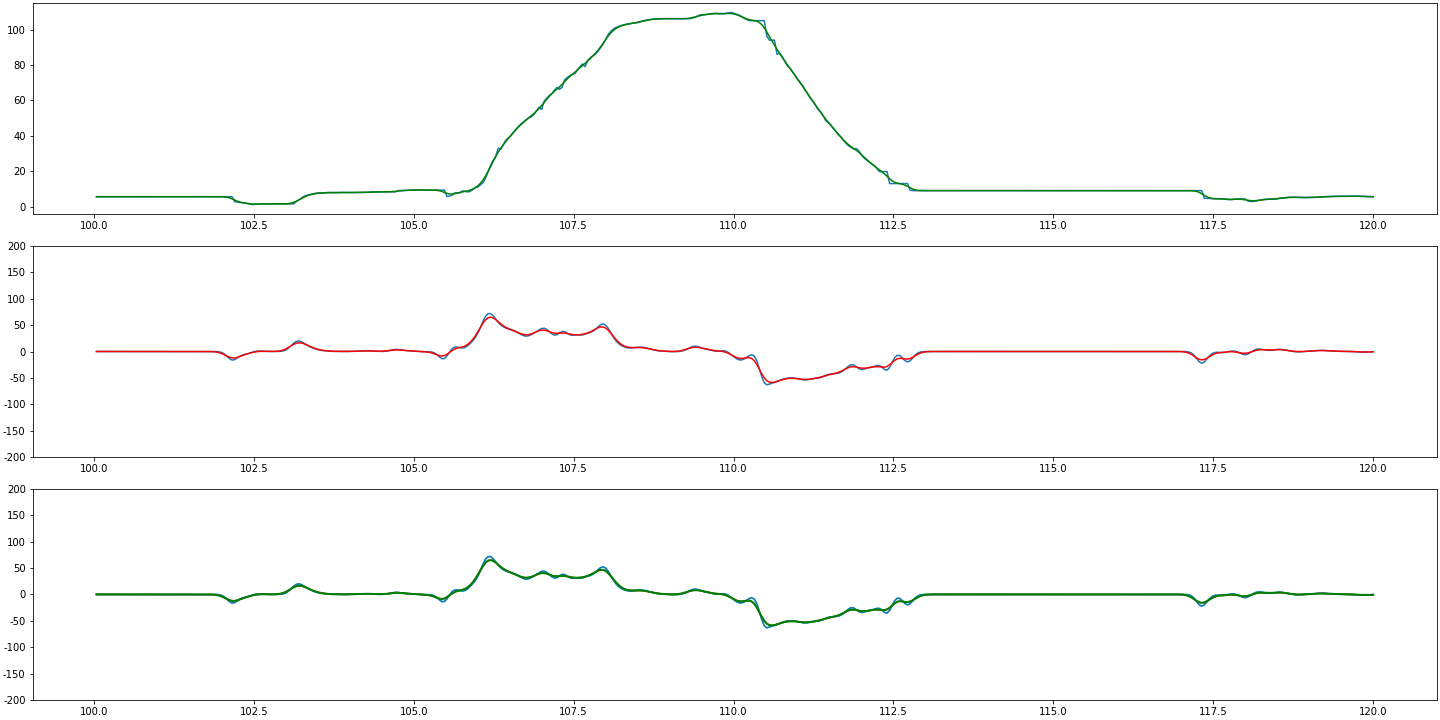

In [109]:
fig = plt.figure(constrained_layout = True, figsize=(20, 10))
slc = slice(2500, 3000)
gs = fig.add_gridspec(3, 2)

#smooth Pos
ax1 = fig.add_subplot(gs[0,:])
ax1 = plt.plot(rawTime[animal, session][slc], rawPositionX[animal, session][slc])
ax1 = plt.plot(rawTime[animal, session][slc], smooth(rawPositionX[animal, session][slc], 2), 'g')

#smooth on speed
ax2 = fig.add_subplot(gs[1,:])
ax2.set_ylim(-200, 200)
ax2 = plt.plot(rawTime[animal, session][slc], rawSpeed[animal, session][slc])
ax2 = plt.plot(rawTime[animal, session][slc], smooth(rawSpeed[animal, session][slc], 2), 'r')
#ax2 = plt.scatter(rawTime[animal, session][slc], [0 if i == 1 else None for i in cameraEdit[animal, session][slc]])


#smooth on position, compute speed with smooth position(r), then smooth this speed(g).
# ax3 = fig.add_subplot(gs[2,:])
# ax3 = plt.plot(rawTime[animal, session][slc], rawSpeed[animal, session][slc])
# ax3 = plt.plot(rawTime[animal, session][slc], compute_speed(smooth(rawPositionX[animal, session][slc], 2), rawTime[animal, session][slc]), 'r')
# ax3 = plt.plot(rawTime[animal, session][slc], smooth(compute_speed(smooth(rawPositionX[animal, session][slc], 2), rawTime[animal, session][slc]), 2), 'g')

def fix_camGlitch(data):
    res = copy.copy(data)
    ic = 50
    for i, (p, s) in enumerate(zip(data, smooth(data, 2))): res[i] = None if s - ic > p or p > s + ic else p
    inds = np.arange(res.shape[0])
    good = np.where(np.isfinite(res))
    f = interpolate.interp1d(inds[good], res[good],bounds_error=False)
    return np.where(np.isfinite(res),res,f(inds))


test = copy.copy(rawSpeed[animal, session][slc])
ic = 50
win = 1
for i, (p, s) in enumerate(zip(rawSpeed[animal, session][slc], smooth(rawSpeed[animal, session][slc], 2))):
    if s - ic > p or p > s + ic: test[i] = None
    else: test[i] = p

from scipy import interpolate
def fill_nan(A):
    inds = np.arange(A.shape[0])
    good = np.where(np.isfinite(A))
    f = interpolate.interp1d(inds[good], A[good],bounds_error=False)
    B = np.where(np.isfinite(A),A,f(inds))
    return B

ax4 = fig.add_subplot(gs[2,:])
ax4.set_ylim(-200, 200)
#ax4 = plt.plot(rawTime[animal, session][slc], rawSpeed[animal, session][slc], 'k')
ax4 = plt.plot(rawTime[animal, session][slc], test, zorder=3)
ax4 = plt.plot(rawTime[animal, session][slc], fill_nan(test), 'c')
ax4 = plt.plot(rawTime[animal, session][slc], smooth(fill_nan(test), 2), 'g', zorder=3, lw=2)
ax4 = plt.plot(rawTime[animal, session][slc], smooth(rawSpeed[animal, session][slc], 2), 'r')

#ax4 = plt.plot(rawTime[animal, session][slc], smooth(test, 2), 'g')


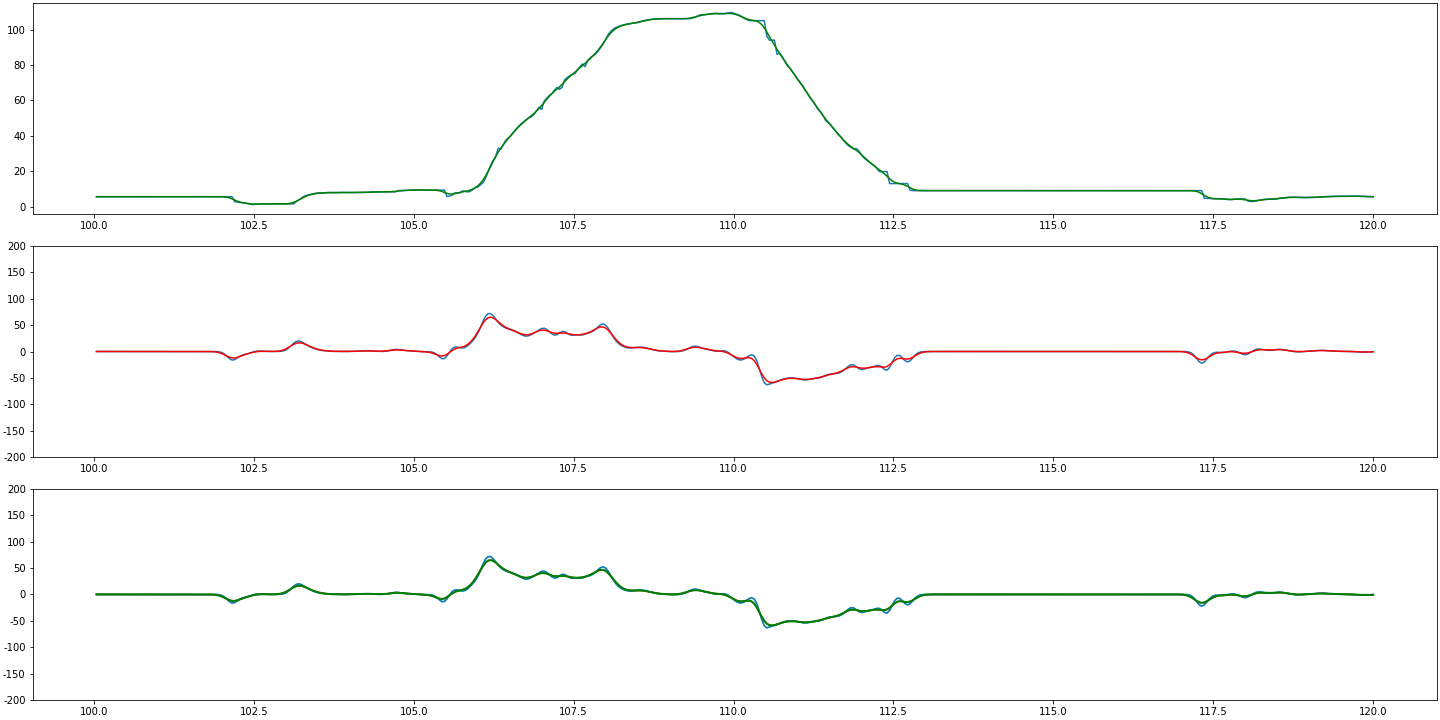

In [110]:
fig = plt.figure(constrained_layout = True, figsize=(20, 10))
slc = slice(2500, 3000)
gs = fig.add_gridspec(3, 2)

#smooth Pos
ax1 = fig.add_subplot(gs[0,:])
ax1 = plt.plot(rawTime[animal, session][slc], rawPositionX[animal, session][slc])
ax1 = plt.plot(rawTime[animal, session][slc], smooth(rawPositionX[animal, session][slc], 2), 'g')

#smooth on speed
ax2 = fig.add_subplot(gs[1,:])
ax2.set_ylim(-200, 200)
ax2 = plt.plot(rawTime[animal, session][slc], rawSpeed[animal, session][slc])
ax2 = plt.plot(rawTime[animal, session][slc], smooth(rawSpeed[animal, session][slc], 2), 'r')
#ax2 = plt.scatter(rawTime[animal, session][slc], [0 if i == 1 else None for i in cameraEdit[animal, session][slc]])


#smooth on position, compute speed with smooth position(r), then smooth this speed(g).
# ax3 = fig.add_subplot(gs[2,:])
# ax3 = plt.plot(rawTime[animal, session][slc], rawSpeed[animal, session][slc])
# ax3 = plt.plot(rawTime[animal, session][slc], compute_speed(smooth(rawPositionX[animal, session][slc], 2), rawTime[animal, session][slc]), 'r')
# ax3 = plt.plot(rawTime[animal, session][slc], smooth(compute_speed(smooth(rawPositionX[animal, session][slc], 2), rawTime[animal, session][slc]), 2), 'g')






def fixSpeed_camGlitch(data):
    res = copy.copy(data)
    ic = 50
    # replace speed value with None if value is too big or too small 
    # then interpolate the missing value 
    for i, (p, s) in enumerate(zip(data, smooth(data, 2))): res[i] = None if s - ic > p or p > s + ic else p
    inds = np.arange(res.shape[0])
    good = np.where(np.isfinite(res))
    f = scipy.interpolate.interp1d(inds[good], res[good],bounds_error=False)
    return np.where(np.isfinite(res),res,f(inds))





ax4 = fig.add_subplot(gs[2,:])
ax4.set_ylim(-200, 200)
#ax4 = plt.plot(rawTime[animal, session][slc], rawSpeed[animal, session][slc], 'k')
ax4 = plt.plot(rawTime[animal, session][slc], test, zorder=3)
ax4 = plt.plot(rawTime[animal, session][slc], fixSpeed_camGlitch(rawSpeed[animal, session][slc]), 'c')
ax4 = plt.plot(rawTime[animal, session][slc], smooth(fixSpeed_camGlitch(rawSpeed[animal, session][slc]), 2), 'g', zorder=3, lw=2)
ax4 = plt.plot(rawTime[animal, session][slc], smooth(rawSpeed[animal, session][slc], 2), 'r')

#ax4 = plt.plot(rawTime[animal, session][slc], smooth(test, 2), 'g')


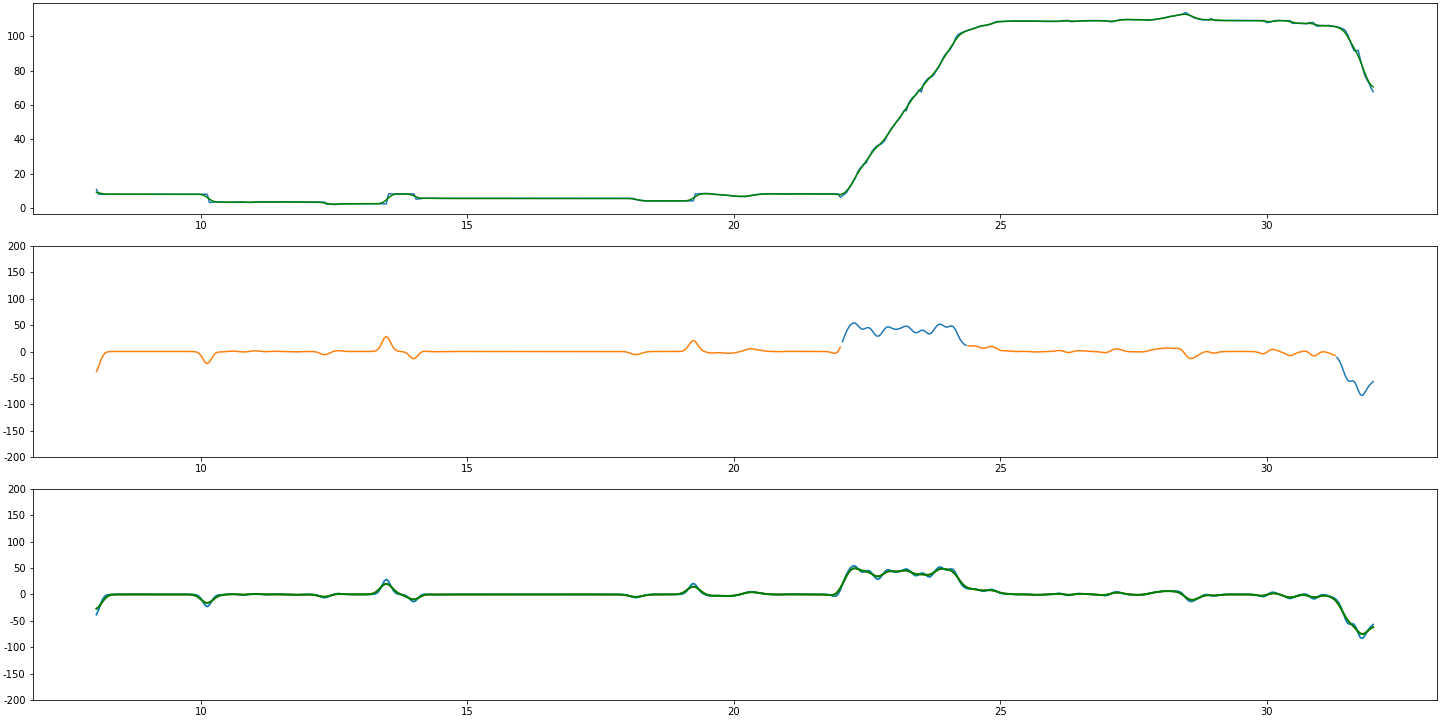

In [111]:
fig = plt.figure(constrained_layout = True, figsize=(20, 10))
slc = slice(200, 800)
gs = fig.add_gridspec(3, 2)

#smooth Pos
ax1 = fig.add_subplot(gs[0,:])
ax1 = plt.plot(rawTime[animal, session][slc], rawPositionX[animal, session][slc])
ax1 = plt.plot(rawTime[animal, session][slc], smooth(rawPositionX[animal, session][slc], 2), 'g')

#smooth on speed
ax2 = fig.add_subplot(gs[1,:])
ax2.set_ylim(-200, 200)
ax2 = plt.plot(rawTime[animal, session][slc], goodSpeed[animal, session][slc])
ax2 = plt.plot(rawTime[animal, session][slc], badSpeed[animal, session][slc])
#ax2 = plt.plot(rawTime[animal, session][slc], smooth(goodSpeed[animal, session][slc], 2), 'r')

test = copy.copy(rawSpeed[animal, session][slc])
ic = 50
win = 1
for i, (p, s) in enumerate(zip(rawSpeed[animal, session][slc], smooth(rawSpeed[animal, session][slc], 2))):
    #if s - ic > p or p > s + ic: test[i] = None
    #else: test[i] = p
    test[i] = None if s - ic > p or p > s + ic else p

from scipy import interpolate
def fill_nan(A):
    inds = np.arange(A.shape[0])
    good = np.where(np.isfinite(A))
    f = interpolate.interp1d(inds[good], A[good], bounds_error = False)
    B = np.where(np.isfinite(A), A ,f(inds))
    return B

ax4 = fig.add_subplot(gs[2,:])
ax4.set_ylim(-200, 200)
#ax4 = plt.plot(rawTime[animal, session][slc], rawSpeed[animal, session][slc], 'k')
ax4 = plt.plot(rawTime[animal, session][slc], test, zorder=3)
ax4 = plt.plot(rawTime[animal, session][slc], fill_nan(test), 'c')
ax4 = plt.plot(rawTime[animal, session][slc], smooth(fill_nan(test), 2), 'g', zorder=3, lw=2)
ax4 = plt.plot(rawTime[animal, session][slc], smooth(rawSpeed[animal, session][slc], 2), 'r')

#ax4 = plt.plot(rawTime[animal, session][slc], smooth(test, 2), 'g')


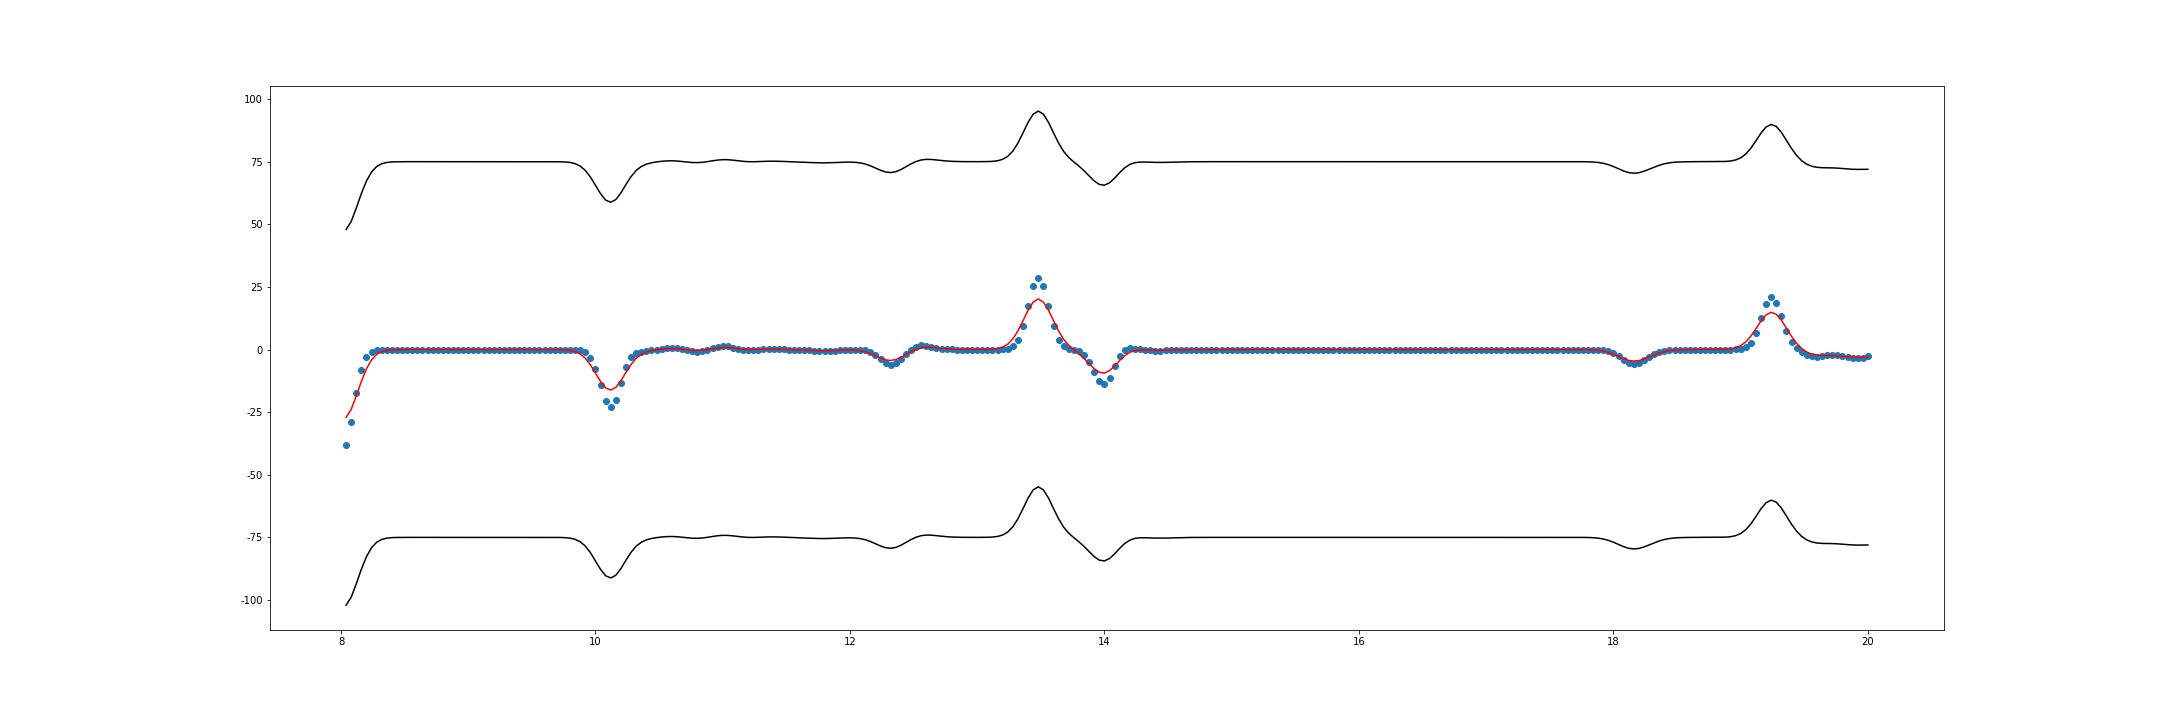

In [112]:
fig = plt.figure(constrained_layout = False, figsize=(30, 10))
slc = slice(200, 500)
a = smooth(rawSpeed[animal, session][slc], 2)
plt.scatter(rawTime[animal, session][slc], rawSpeed[animal, session][slc])
#plt.scatter(rawTime[animal, session][slc], a)
plt.plot(rawTime[animal, session][slc], smooth(rawSpeed[animal, session][slc], 2), 'r')

plt.plot(rawTime[animal, session][slc], smooth(rawSpeed[animal, session][slc], 2)+75, 'k')
plt.plot(rawTime[animal, session][slc], smooth(rawSpeed[animal, session][slc], 2)-75, 'k')


In [113]:
a = [[np.sum(np.diff(j)) for j in good_timeRunToLeftBin[animal, session][i] ]for i in range(0, len(params[animal, session]['blocks']))] 
b = [[np.sum(np.diff(j)) for j in good_timeRunToRightBin[animal, session][i] ]for i in range(0, len(params[animal, session]['blocks']))]
def flatten(t):    return [item for sublist in t for item in sublist]       

<AxesSubplot:title={'center':'Distribution of MAX Run Speed'}, xlabel='Direction of run', ylabel='Speed (cm/s)'>

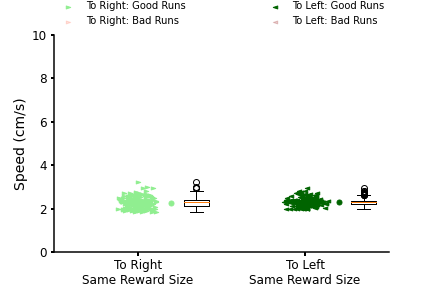

In [114]:
#function to plot the scatter data of run times and stay times
def distribution_plot(gooddataRight, gooddataLeft, baddataRight, baddataLeft, barplotaxes, maxminstepbin, scatterplotaxes, legend, color, xyLabels=["","","",""], title=[None], linewidth = 1):
    distr = plt.gca()
    plt.scatter(np.random.normal(1, 0.05, len(gooddataRight)), gooddataRight, s=20, color = color[0], marker = "$\u25ba$", label=legend[0])
    plt.scatter(np.random.normal(2, 0.05, len(gooddataLeft)), gooddataLeft, s=20, color = color[1], marker = "$\u25c4$", label=legend[1])
    plt.scatter(np.random.normal(1, 0.05, len(baddataRight)), baddataRight, s=20, color = color[2], alpha = 0.2, marker = "$\u25ba$", label=legend[2])
    plt.scatter(np.random.normal(2, 0.05, len(baddataLeft)), baddataLeft, s=20, color = color[3], alpha = 0.2, marker = "$\u25c4$", label=legend[3])
    plt.scatter(1.2, np.mean(gooddataRight), s=25, color = color[0])
    plt.scatter(2.2, np.mean(gooddataLeft), s=25, color = color[1])
    plt.boxplot(gooddataRight, positions = [1.35])
    plt.boxplot(gooddataLeft, positions = [2.35])
    distr.set_xlabel(xyLabels[1], fontsize = xyLabels[4])
    distr.set_ylabel(xyLabels[0], fontsize = xyLabels[4])
    distr.set_title(title[0], fontsize = title[1], pad=50)
    distr.set_xlim([scatterplotaxes[0], scatterplotaxes[1]])
    distr.set_ylim([scatterplotaxes[2], scatterplotaxes[3]])
    distr.set_xticks([1,2])
    distr.set_xticklabels([xyLabels[2],xyLabels[3]], fontsize = xyLabels[5])
    distr.spines['bottom'].set_linewidth(linewidth[0])
    distr.spines['left'].set_linewidth(linewidth[0])
    distr.spines['top'].set_color("none")
    distr.spines['right'].set_color("none")
    distr.tick_params(width=2, labelsize = xyLabels[5])
    handles, labels = distr.get_legend_handles_labels()
    distr.legend([handles[0], handles[2], handles[1], handles[3]], [legend[0], legend[2], legend[1], legend[3]], bbox_to_anchor = (0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0., frameon = False)
    return distr
distribution_plot(flatten(a), flatten(b), [], [], barplotaxes = [0, 100, 0, 1], maxminstepbin = [0, 100, 1], scatterplotaxes = [0.5, 2.5, 0, 10], color=['lightgreen', 'darkgreen', 'tomato', 'darkred'], xyLabels=["Speed (cm/s)", "Direction of run", "To Right" + "\n" + water[animal, session][1], "To Left" + "\n" + water[animal, session][0], 14, 12], title = ["Distribution of MAX Run Speed", 16], linewidth = [1.5], legend = ["To Right: Good Runs", "To Left: Good Runs", "To Right: Bad Runs", "To Left: Bad Runs"])
    

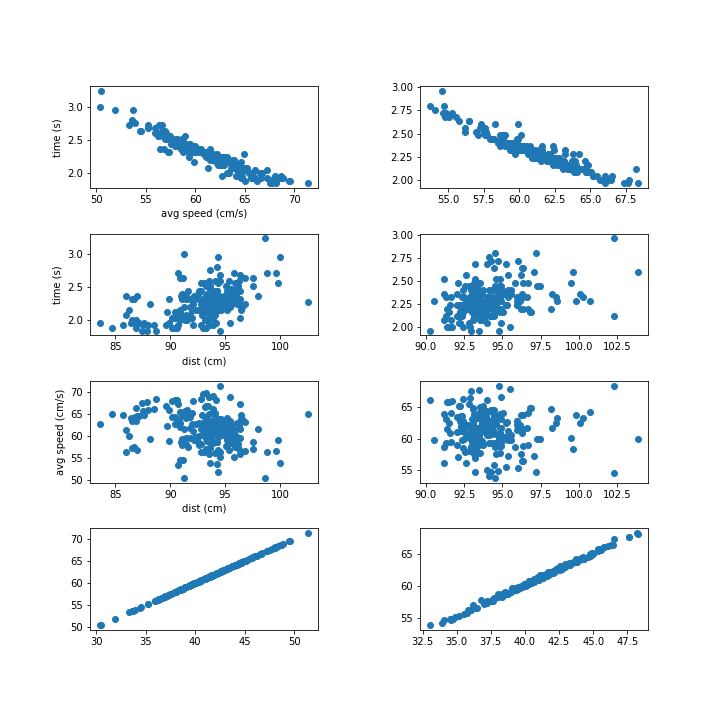

In [115]:
fig = plt.figure(constrained_layout = False, figsize=(10, 10))
fig.suptitle("", y=0.9, fontsize = 12)
gs = fig.add_gridspec(26, 12)

row1 = slice(0, 5)
row2 = slice(7, 12)
row3 = slice(14, 19)
row4 = slice(21, 26)

col1 = slice(0, 5)
col2 = slice(7, 12)


ax00 = fig.add_subplot(gs[row1, col1])
ax00 = plt.scatter(good_speedRunToLeft[animal, session], flatten(a))
plt.xlabel("avg speed (cm/s)")
plt.ylabel("time (s)")
ax01 = fig.add_subplot(gs[row1, col2])
ax01 = plt.scatter(good_speedRunToRight[animal, session], flatten(b))

ax02 = fig.add_subplot(gs[row2, col1])
ax02 = plt.scatter([abs(t[0] - t[-1]) for t in good_XtrackRunToLeft[animal, session]], flatten(a))
plt.xlabel("dist (cm)")
plt.ylabel("time (s)")
ax03 = fig.add_subplot(gs[row2, col2])
ax03 = plt.scatter([abs(t[0] - t[-1]) for t in good_XtrackRunToRight[animal, session]], flatten(b))

ax04 = fig.add_subplot(gs[row3, col1])
ax04 = plt.scatter([abs(t[0] - t[-1]) for t in good_XtrackRunToLeft[animal, session]], good_speedRunToLeft[animal, session])
plt.xlabel("dist (cm)")
plt.ylabel("avg speed (cm/s)")
ax05 = fig.add_subplot(gs[row3, col2])
ax05 = plt.scatter([abs(t[0] - t[-1]) for t in good_XtrackRunToRight[animal, session]], good_speedRunToRight[animal, session])

ax06 = fig.add_subplot(gs[row4, col1])
ax06 = plt.scatter([abs(t[0] - t[-1])/tt for t, tt in zip(good_XtrackRunToLeft[animal, session],flatten(a))], good_speedRunToLeft[animal, session])
ax07 = fig.add_subplot(gs[row4, col2])
ax07 = plt.scatter([abs(t[1] - t[-1])/tt for t, tt in zip(good_XtrackRunToRight[animal, session],flatten(b))], good_speedRunToRight[animal, session])

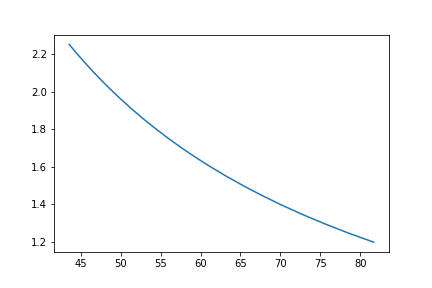

In [116]:
t = np.arange(1.2,2.3,0.05)
v = 98 / t

plt.plot(v,t)

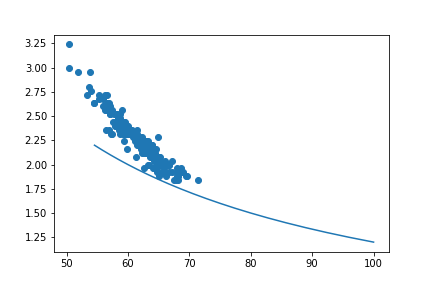

In [117]:
ax00 = fig.add_subplot(gs[row1, col1])
ax00 = plt.scatter(good_speedRunToLeft[animal, session], flatten(a))
t = np.arange(1.2,2.2,0.05)
v = 120 / t

ax00 = plt.plot(v,t)

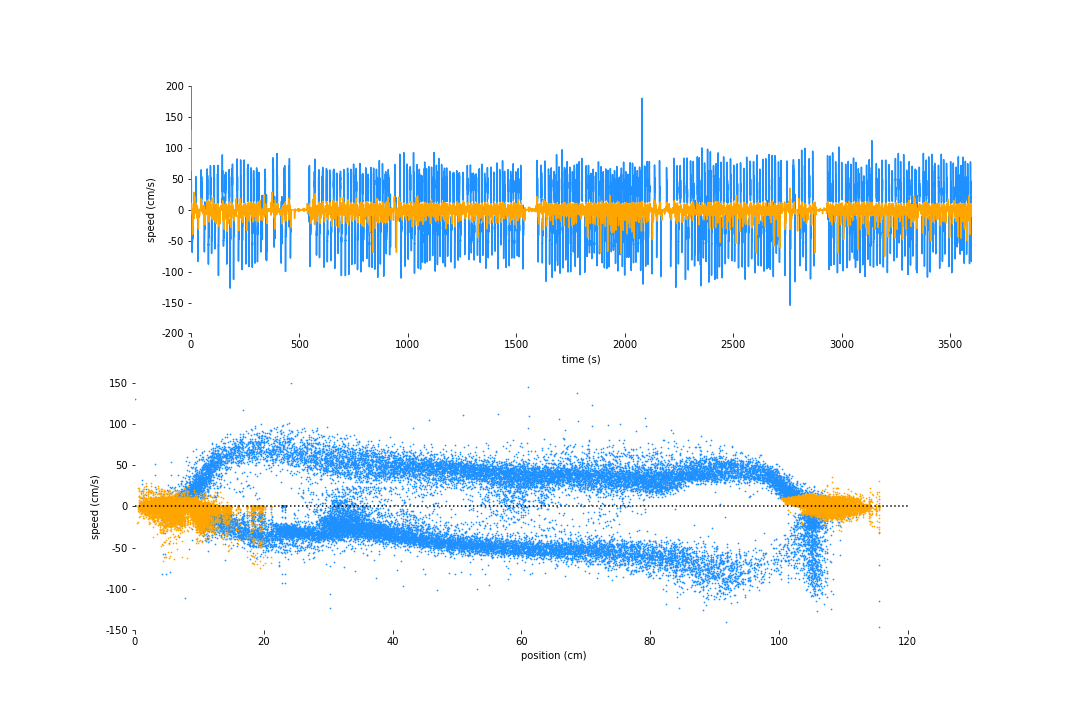

In [118]:
# Plot figure
fig = plt.figure(constrained_layout = False, figsize=(15, 10))
gs = fig.add_gridspec(10, 75)

gs00 = gs[0:10, 0:75].subgridspec(2,75)
ax11 = fig.add_subplot(gs00[0, 5:75])
ax12 = fig.add_subplot(gs00[1, 0:75])
ax11.plot(rawTime[animal,session], goodSpeed[animal,session], color = 'dodgerblue')
ax11.plot(rawTime[animal,session], badSpeed[animal, session], color = 'orange')
ax11.set_xlabel('time (s)')
ax11.set_ylabel('speed (cm/s)')
ax11.set_xlim(0, 3600)
ax11.set_ylim(-200,200)
ax11.spines['top'].set_color("none")
ax11.spines['right'].set_color("none")
ax11.spines['left'].set_color("none")
ax11.spines['bottom'].set_color("none")
ax12.scatter(rawPositionX[animal,session], goodSpeed[animal,session], color = 'dodgerblue', s=0.5)
ax12.scatter(rawPositionX[animal,session], badSpeed[animal,session], color = 'orange', s=0.5)
ax12.set_xlabel('position (cm)')
ax12.set_ylabel('speed (cm/s)')
ax12.set_xlim(0,130)
ax12.set_ylim(-150,150)
ax12.spines['top'].set_color("none")
ax12.spines['right'].set_color("none")
ax12.spines['left'].set_color("none")
ax12.spines['bottom'].set_color("none")
yline = [0, 120]
xline = [0,0]
ax12.plot(yline, xline, ":", color='k')

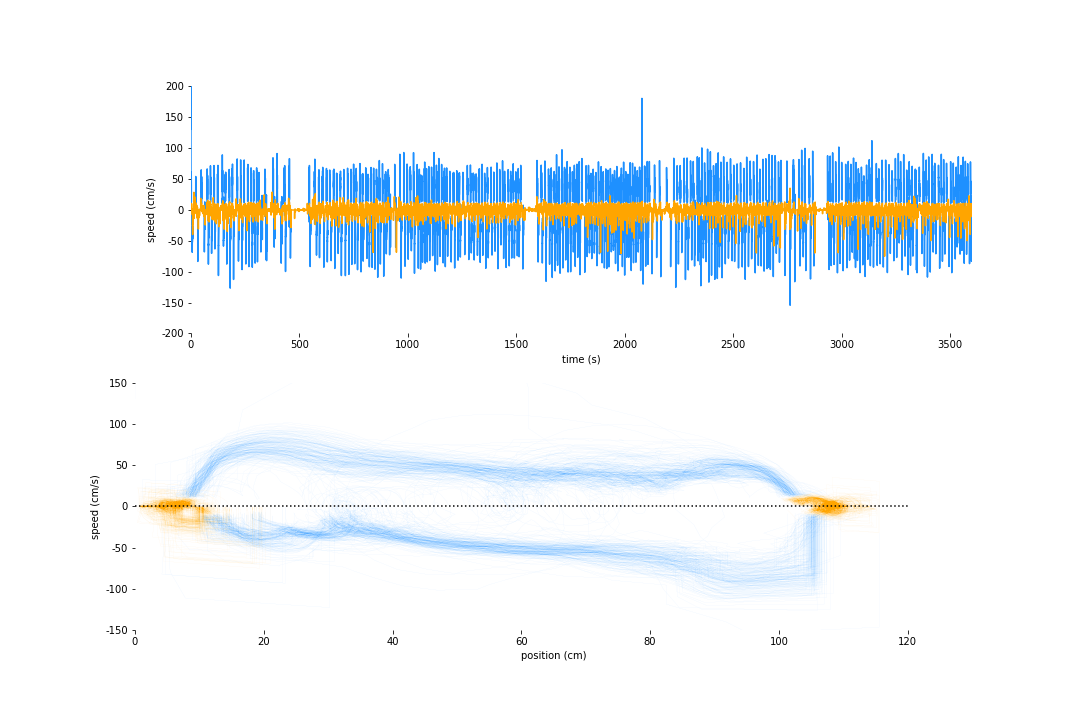

In [119]:
fig = plt.figure(constrained_layout = False, figsize=(15, 10))
gs = fig.add_gridspec(10, 75)

gs00 = gs[0:10, 0:75].subgridspec(2,75)
ax11 = fig.add_subplot(gs00[0, 5:75])
ax12 = fig.add_subplot(gs00[1, 0:75])
ax11.plot(rawTime[animal,session], goodSpeed[animal,session], color = 'dodgerblue')
ax11.plot(rawTime[animal,session], badSpeed[animal, session], color = 'orange')
ax11.set_xlabel('time (s)')
ax11.set_ylabel('speed (cm/s)')
ax11.set_xlim(0, 3600)
ax11.set_ylim(-200,200)
ax11.spines['top'].set_color("none")
ax11.spines['right'].set_color("none")
ax11.spines['left'].set_color("none")
ax11.spines['bottom'].set_color("none")
ax12.plot(rawPositionX[animal,session], goodSpeed[animal,session], color = 'dodgerblue', lw=0.02)
ax12.plot(rawPositionX[animal,session], badSpeed[animal,session], color = 'orange', lw=0.02)
ax12.set_xlabel('position (cm)')
ax12.set_ylabel('speed (cm/s)')
ax12.set_xlim(0,130)
ax12.set_ylim(-150,150)
ax12.spines['top'].set_color("none")
ax12.spines['right'].set_color("none")
ax12.spines['left'].set_color("none")
ax12.spines['bottom'].set_color("none")
yline = [0, 120]
xline = [0,0]
ax12.plot(yline, xline, ":", color='k')

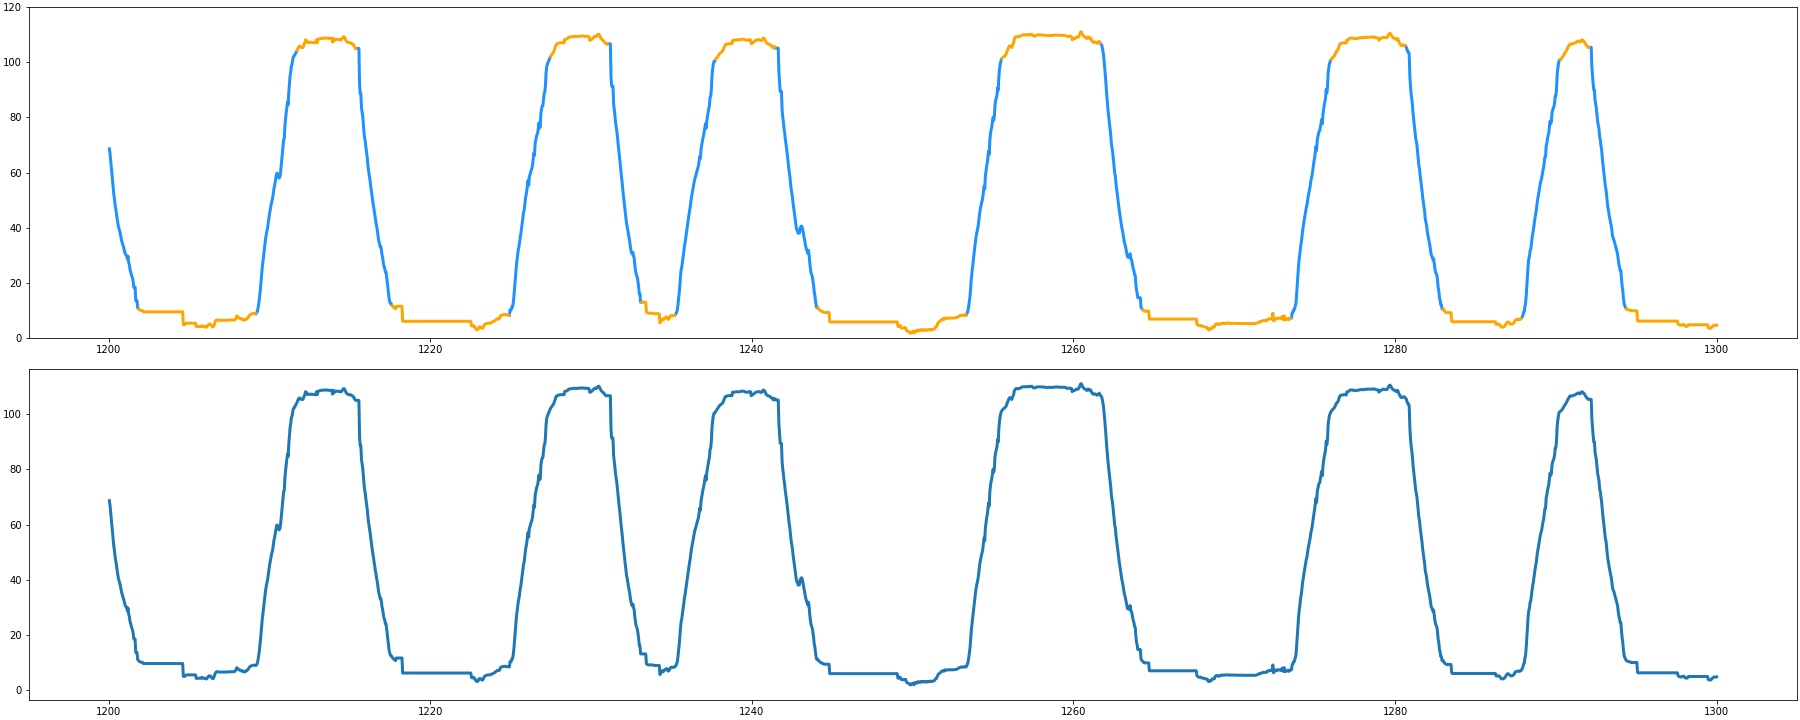

In [120]:
fig = plt.figure(constrained_layout = True, figsize=(25, 10))
slc = slice(1200*25, 1300*25)
gs = fig.add_gridspec(2, 2)



ax2 = fig.add_subplot(gs[0,:])
ax2.set_ylim(0, 120)
#ax2.set_xlim(62, 65)
ax2 = plt.plot(rawTime[animal, session][slc], goodPos[animal, session][slc], lw=3, color= 'dodgerblue')
ax2 = plt.plot(rawTime[animal, session][slc], badPos[animal, session][slc], lw=3, color= 'orange')


ax2 = fig.add_subplot(gs[1,:])
#ax2.set_xlim(62, 65)
ax2=plt.plot(rawTime[animal, session][slc], rawPositionX[animal, session][slc], lw=3)
#ax2 = plt.axvspan(60, 65, color='grey', alpha=90/250)
# ax2.set_ylim(-150, 150)
# ax2 = plt.plot(rawTime[animal, session][slc], goodSpeed[animal, session][slc])
# ax2 = plt.plot(rawTime[animal, session][slc], badSpeed[animal, session][slc])
#save_plot_as_png('example', dpi = 300, transparent = True, background = 'auto')

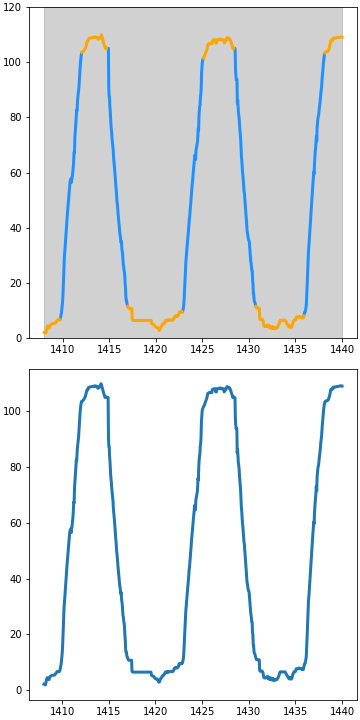

In [121]:
fig = plt.figure(constrained_layout = True, figsize=(5, 10))
slc = slice(1408*25, 1440*25)
gs = fig.add_gridspec(2, 2)



ax2 = fig.add_subplot(gs[0,:])
ax2.set_ylim(0, 120)
#ax2.set_xlim(62, 65)
ax2 = plt.plot(rawTime[animal, session][slc], goodPos[animal, session][slc], lw=3, color= 'dodgerblue')
ax2 = plt.plot(rawTime[animal, session][slc], badPos[animal, session][slc], lw=3, color= 'orange')
ax2 = plt.axvspan(1408, 1440, color='grey', alpha=90/250)


ax2 = fig.add_subplot(gs[1,:])
#ax2.set_xlim(62, 65)
ax2=plt.plot(rawTime[animal, session][slc], rawPositionX[animal, session][slc], lw=3)
#ax2 = plt.axvspan(60, 65, color='grey', alpha=90/250)
# ax2.set_ylim(-150, 150)
# ax2 = plt.plot(rawTime[animal, session][slc], goodSpeed[animal, session][slc])
# ax2 = plt.plot(rawTime[animal, session][slc], badSpeed[animal, session][slc])
save_plot_as_png('example', dpi = 300, transparent = True, background = 'auto')

<AxesSubplot:xlabel='Time (min)', ylabel='Position (cm)'>

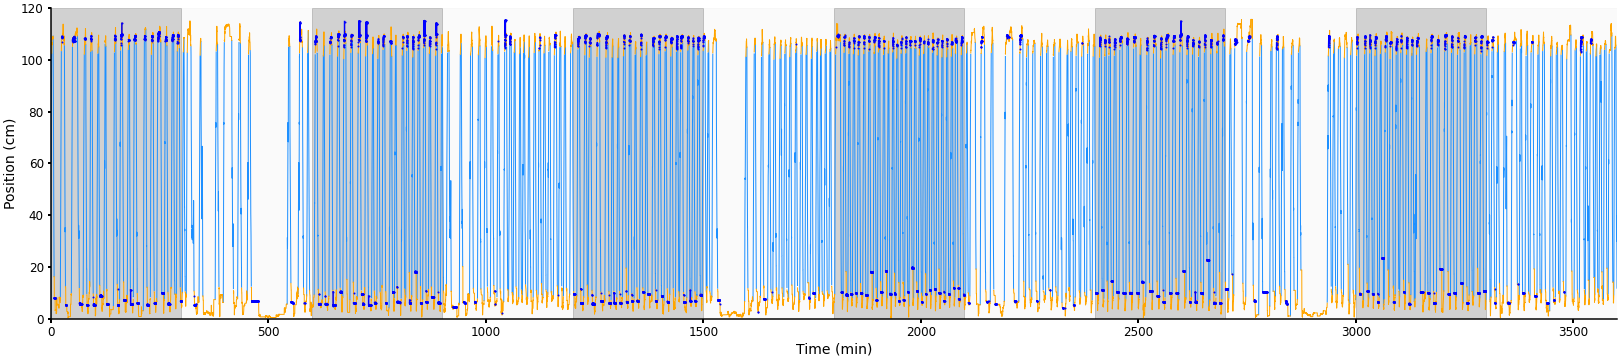

In [122]:
fig = plt.figure(constrained_layout = True, figsize=(22.5, 5))
plot_BASEtrajectoryV2(animal, session, rawTime[animal, session], goodPos[animal, session], badPos[animal, session], rawLickLeftX[animal, session], rawLickRightX[animal, session], 
                        params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], 
                        barplotaxes = [0, params[animal, session]['sessionDuration'], 0, 120, 0, 22, 10],  
                        xyLabels=["Time (min)","", "Position (cm)", "", "", "", 14, 12], title=[session, "", "", "", 16], linewidth = [1.5])

RatF01_2022_04_03_12_09_38


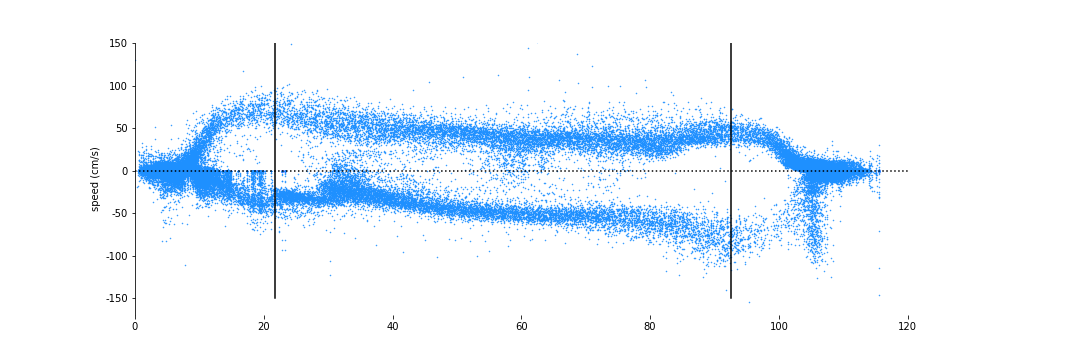

In [123]:
fig = plt.figure(constrained_layout = False, figsize=(15, 5))


ax12 = plt.gca()


ax12.scatter(rawPositionX[animal,session], goodSpeed[animal,session], color = 'dodgerblue', s=0.25)
ax12.scatter(rawPositionX[animal,session], badSpeed[animal,session], color = 'dodgerblue', s=0.25)
#ax12.set_xlabel('position (cm)')
ax12.set_ylabel('speed (cm/s)')

ax12.set_xlim(0,130)
ax12.set_ylim(-170,150)
ax12.spines['top'].set_color("none")
ax12.spines['right'].set_color("none")
#ax12.spines['left'].set_color("none")
ax12.spines['bottom'].set_color("none")

ax12.plot([0, 120], [0,0], ":", color='k')

ax12.plot([21.8, 21.8], [150,-150], color='k')
ax12.plot([92.5, 92.5], [150,-150], color='k')
print(session)

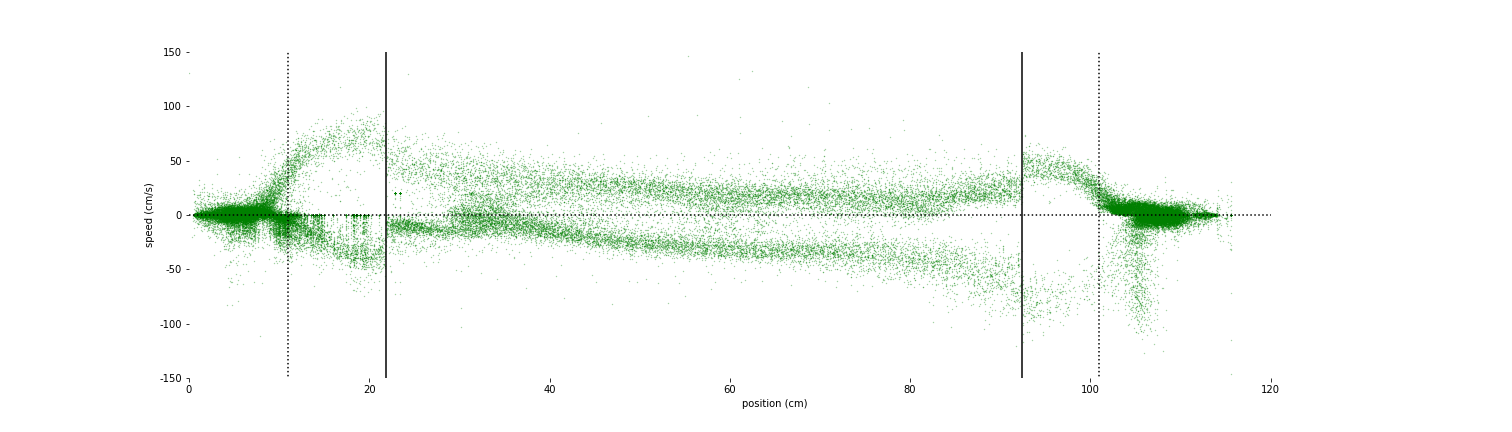

In [124]:
def px2cm(value): return value/11

treadmillCorrectedSpeed = {} 
treadmillCorrectedSpeedBin = {} 
animalList = [animal]
treadmillCorrectedSpeed[animal, session] = [] 
treadmillCorrectedSpeedBin[animal, session] = {} 
if all(v == params[animal, session]['treadmillSpeed'][0] for v in params[animal, session]['treadmillSpeed']): 
    treadmillCorrectedSpeed[animal, session] = [(speed + params[animal, session]['treadmillSpeed'][0] if speed > 0 else speed - params[animal, session]['treadmillSpeed'][0]) 
    if np.logical_and(mask==True, pos >=21.81 and pos<= 92.45) else speed for speed, pos, mask in zip(rawSpeed[animal, session], rawPositionX[animal,session], smoothMask[animal,session])] 


fig = plt.figure(constrained_layout = False, figsize=(21, 6)) 
plt.scatter(rawPositionX[animal, session], treadmillCorrectedSpeed[animal, session], s=0.1, alpha=0.5, color = 'g') 

axx = plt.gca()
plt.xlim(0,120)
plt.ylim(-250, 250) 
xline1 = [px2cm(240), px2cm(240)] 
xline2 = [px2cm(1017),px2cm(1017)] 
xline3 = [params[animal, session]["boundaries"][0], params[animal, session]["boundaries"][0]] 
xline4 = [params[animal, session]["boundaries"][1], params[animal, session]["boundaries"][1]] 
xline = [-200,200] 
plt.plot(xline1, xline, "-", color='k') 
plt.plot(xline2, xline, "-", color='k') 
plt.plot(xline3, xline, ":", color='k') 
plt.plot(xline4, xline, ":", color='k')
#axx.scatter(rawPositionX[animal,session], goodSpeed[animal,session], color = 'dodgerblue', s=0.5)
#axx.scatter(rawPositionX[animal,session], badSpeed[animal,session], color = 'orange', s=0.5)
axx.set_xlabel('position (cm)')
axx.set_ylabel('speed (cm/s)')
axx.set_xlim(0,130)
axx.set_ylim(-150,150)
axx.spines['top'].set_color("none")
axx.spines['right'].set_color("none")
axx.spines['left'].set_color("none")
axx.spines['bottom'].set_color("none")
yline = [0, 120]
xline = [0,0]
axx.plot(yline, xline, ":", color='k')


In [125]:
treadmillCorrectedSpeed[animal, session]

[130.61394,
 186.9154,
 261.61627,
 302.2817,
 261.0682678222656,
 195.1674041748047,
 124.56643676757812,
 74.98258972167969,
 46.86970520019531,
 29.54024887084961,
 15.247406005859375,
 2.060394287109375,
 -9.103333473205566,
 -17.291135549545288,
 17.123103857040405,
 12.795427799224854,
 8.531844139099121,
 4.180419921875,
 0.42467308044433594,
 -2.0569534301757812,
 -3.162525177001953,
 -3.285337448120117,
 -2.8822193145751953,
 -2.1044178009033203,
 -0.7393379211425781,
 1.553579330444336,
 4.987485885620117,
 9.79871654510498,
 16.869848489761353,
 -12.148295402526855,
 3.5264053344726562,
 21.34652328491211,
 35.59345245361328,
 41.33339309692383,
 38.25279235839844,
 30.358936309814453,
 22.808578491210938,
 19.353816986083984,
 21.194900512695312,
 26.364730834960938,
 30.464065551757812,
 29.82122802734375,
 24.588348388671875,
 18.19012451171875,
 14.080318450927734,
 13.725860595703125,
 16.78445053100586,
 21.535507202148438,
 45.080257,
 44.533276,
 38.970192,
 30.10835

TypeError: plot_speed() got multiple values for argument 'xylim'

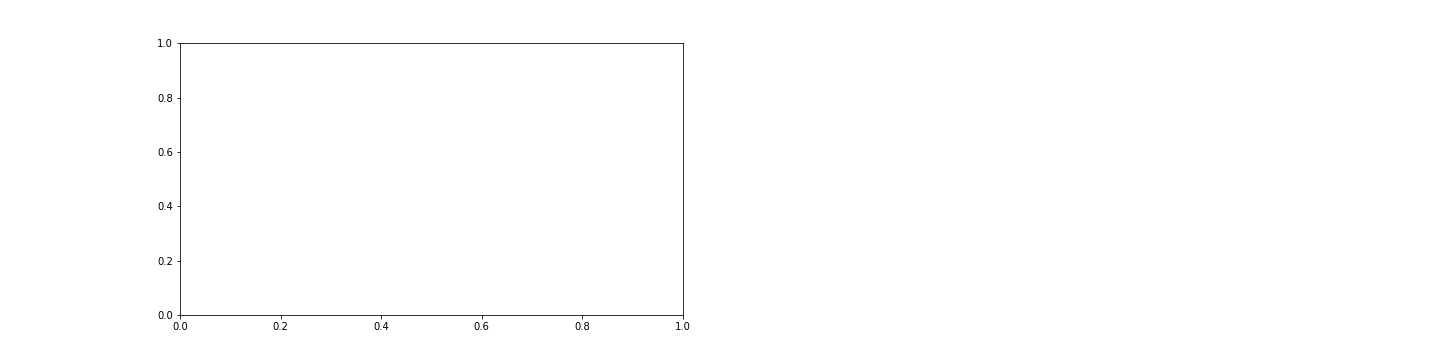

In [126]:

# Plot figure
fig = plt.figure(constrained_layout = False, figsize=(20, 5))
gs = fig.add_gridspec(5, 22)

ax32 = fig.add_subplot(gs[0:5, 0:10])
ax32 = plot_speed(animal, session, good_instantSpeedRight[animal, session], good_timeRunToRight[animal, session], bad_instantSpeedRight[animal, session], bad_timeRunToRight[animal, session],0,  [0,0], xylim = [-0.1, 4, 0, 200], xyLabels=["Time (s)","X Speed (cm/s)", 14], title=["To Right" + "\n" + "To " + water[animal, session][1] + " " + str(params[animal, session]["waterRight"]) + "µL/drop", 12], linewidth = [1.5])
ax33 = fig.add_subplot(gs[0:5, 12:22])
ax33 = plot_speed(animal, session, good_instantSpeedLeft[animal, session], good_timeRunToLeft[animal, session], bad_instantSpeedLeft[animal, session], bad_timeRunToLeft[animal, session], 0, [0,0], xylim = [-0.1, 4, 0, 200], xyLabels=["Time (s)","", 14], title=["To Left" + "\n" + "To " + water[animal, session][0] + " " + str(params[animal, session]["waterLeft"]) + "µL/drop", 12], linewidth = [1.5])


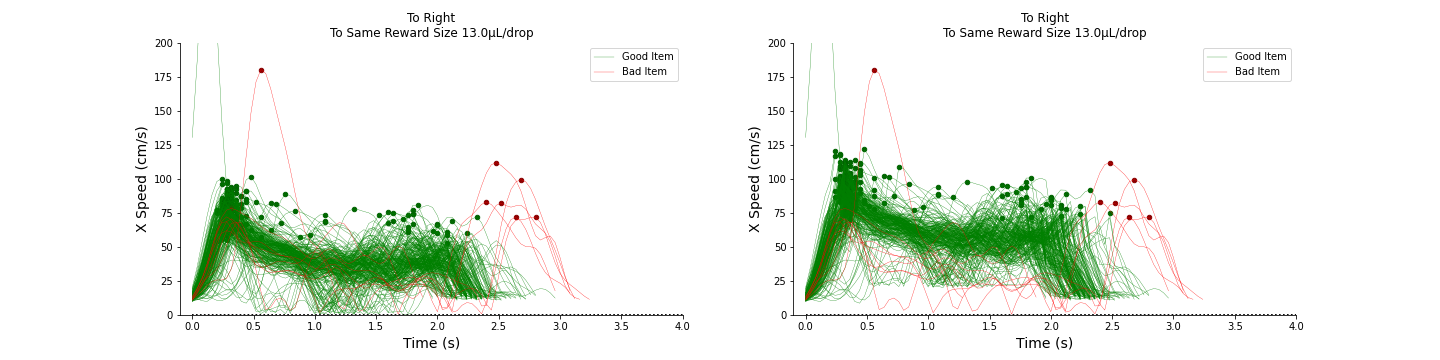

In [ ]:
def plot_speed(animal, session, good_PosdataRight, good_TimedataRight, bad_PosdataRight, bad_TimedataRight, bounds, xylim, xyLabels=["Speed cm/s","Quantity", "Direction", "Speed(cm/s)"], title=[None], linewidth = 1 ): 
    ax = plt.gca()
    for i, j in zip(good_PosdataRight, good_TimedataRight):
        time = np.subtract(j, j[0])
        iabs =  [abs(ele) for ele in i]
        plt.plot(np.subtract(j, j[0]), iabs, color='g' , linewidth=0.3, label="Good Item" if i == good_PosdataRight[0] else "")
        if len(np.where(i == max(i))[0]) == 1:
            maxspeed = max(iabs)
            maxspeedtime = np.where(iabs == maxspeed)[0]
            plt.scatter(time[maxspeedtime], maxspeed, color ='darkgreen', s=20)
        else: print(max(i))
    for k, l in zip(bad_PosdataRight, bad_TimedataRight):
        time = np.subtract(l, l[0])
        kabs =  [abs(ele) for ele in k]
        plt.plot(np.subtract(l, l[0]), kabs, color='r', linewidth=0.3,  label="Bad Item" if k == bad_PosdataRight[0] else "")
        if len(np.where(k == max(k))[0]) == 1:
            maxspeed = max(kabs)
            maxspeedtime = np.where(kabs == maxspeed)[0]
            plt.scatter(time[maxspeedtime], maxspeed, color ='darkred', s=20)
        else: print(max(k))
    ax.set_title(title[0], fontsize = title[1])
    ax.set_xlabel(xyLabels[0], fontsize = xyLabels[2])
    ax.set_ylabel(xyLabels[1], fontsize = xyLabels[2])
    ax.set_xlim([xylim[0], xylim[1]])
    ax.set_ylim([xylim[2], xylim[3]])
    ax.spines['top'].set_color("none")
    ax.spines['right'].set_color("none")
    xline1 = [bounds[0], bounds[0]]
    xline2 = [bounds[1], bounds[1]]
    yline = [0,20]
    plt.plot(yline, xline1, ":", color='k')
    plt.plot(yline, xline2, ":", color='k')
    ax.legend()
    return ax



# Plot figure
fig = plt.figure(constrained_layout = False, figsize=(20, 5))
gs = fig.add_gridspec(5, 22)
ax31 = fig.add_subplot(gs[0:5, 0:10])
ax31 = plot_speed(animal, session, good_instantSpeedRight[animal, session], good_timeRunToRight[animal, session], bad_instantSpeedRight[animal, session], bad_timeRunToRight[animal, session], [0,0], xylim = [-0.1, 4, 0, 200], xyLabels=["Time (s)","X Speed (cm/s)", 14], title=["To Right" + "\n" + "To " + water[animal, session][1] + " " + str(params[animal, session]["waterRight"]) + "µL/drop", 12], linewidth = [1.5])


for index, (i, j) in enumerate(zip(good_instantSpeedRight[animal, session], good_XtrackRunToRight[animal, session])):
    for iindex, (ele, pos) in enumerate(zip(i,j)):
        #print(index, ele)
        if pos >=21.81 and pos<= 92.45: good_instantSpeedRight[animal, session][index][iindex] +=20
        #else: ele = ele


ax32 = fig.add_subplot(gs[0:5, 12:22])
ax32 = plot_speed(animal, session, good_instantSpeedRight[animal, session], good_timeRunToRight[animal, session], bad_instantSpeedRight[animal, session], bad_timeRunToRight[animal, session], [0,0], xylim = [-0.1, 4, 0, 200], xyLabels=["Time (s)","X Speed (cm/s)", 14], title=["To Right" + "\n" + "To " + water[animal, session][1] + " " + str(params[animal, session]["waterRight"]) + "µL/drop", 12], linewidth = [1.5])


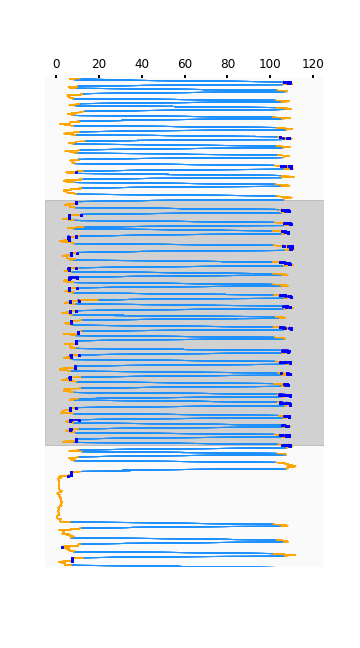

In [ ]:
def save_plot_as_png(filename, dpi = 'figure', transparent = True, background = 'auto'):
    folderPath = os.path.join(os.getcwd(), "Figures")
    if not os.path.exists(folderPath):
        os.mkdir(folderPath)
    filePath = os.path.join(folderPath, filename)
    plt.savefig(filePath, dpi=dpi, transparent=transparent, facecolor = background, edgecolor = background)

def plot_fig(gooddataRight, gooddataLeft, baddataRight, baddataLeft, trials, rewardProbaBlock, blocks, barplotaxes, xyLabels=["Speed cm/s","Quantity", "Direction", "Speed(cm/s)"], title=[None], linewidth = 1):
    fig = plt.figure(figsize = [5, 9], constrained_layout=False)
    for i in range(0, len(blocks)):
        ax1 = plt.gca()
        plt.axhspan(blocks[i][0], blocks[i][1], color='grey', alpha=rewardProbaBlock[i]/250, label = "%reward: " + str(rewardProbaBlock[i]) if animal == animalList[0] and (i == 0 or i == 1) else "")
        plt.plot(goodPos[animal, session], rawTime[animal, session], label = "run", color="dodgerblue", linewidth = 1)
        plt.plot(badPos[animal, session], rawTime[animal, session], label = "wait", color="orange", linewidth = 1)
        plt.plot([None if x == 0 else x for x in baddataLeft], trials, color= "b", marker="o", markersize = 2)#lick data, plot position in which the animal licked, NoLick = we don't care so None
        plt.plot([None if x == 0 else x for x in baddataRight], trials, color= "b", marker="o", markersize = 2)
        #ax1.set_title(title[0], fontsize = title[4])
        #ax1.set_xlabel("X Position cm", fontsize = xyLabels[6])
        #ax1.set_ylabel("Time (s)", fontsize = xyLabels[6])
        ax1.set_xlim([-5, 125])
        ax1.set_ylim([1650, 1050])
        #ax1.spines['top'].set_linewidth(linewidth[0])
        #ax1.spines['left'].set_linewidth(linewidth[0])
        ax1.spines['bottom'].set_color("none")
        ax1.spines['right'].set_color("none")
        ax1.spines['left'].set_color("none")
        ax1.spines['top'].set_color("none")
        ax1.tick_params(width=2, labelsize = xyLabels[7])
        ax1.xaxis.tick_top()
        ax1.xaxis.set_label_position('top') 
        plt.tick_params(
        left = False, 
        #right = False , 
        labelleft = False ,
        #labelbottom = False, 
        #bottom = False
        )
        x_ticks = (1200, 1500)
        #ax1.set_yticks(x_ticks)
        #ax1.set_yticklabels([int(val / 60) for val in ax1.get_xticks().tolist()])
        save_plot_as_png('track15min', dpi = 300, transparent = True, background = 'auto')

plot_fig(good_speedRunToRightBin[animal, session], good_speedRunToLeftBin[animal, session], 
rawLickLeftX[animal, session], rawLickRightX[animal, session], 
rawTime[animal, session], params[animal, session]['rewardProbaBlock'] , 
            params[animal, session]['blocks'], 
            barplotaxes = [0, params[animal, session]['sessionDuration']/60, 50, 90, 0, 22, 10], 
            xyLabels=["Time (min)","Avg. run speed (cm/s)", "Position (cm)", "Avg. wait time (s)", "\u0023 runs / min", "", 16, 12], 
            title=[session, "", "", "", 16],
             linewidth = [1.5]) #"Position", "Number of runs", "Speed of runs", "Waiting time",


In [ ]:

def plot_fig(gooddataRight, gooddataLeft, baddataRight, baddataLeft, trials, rewardProbaBlock, blocks, barplotaxes, xyLabels=["Speed cm/s","Quantity", "Direction", "Speed(cm/s)"], title=[None], linewidth = 1):
    fig = plt.figure(figsize = [5, 9], constrained_layout=False)
    for i in range(0, len(blocks)):
        ax1 = plt.gca()
        plt.axhspan(blocks[i][0], blocks[i][1], color='grey', alpha=rewardProbaBlock[i]/250, label = "%reward: " + str(rewardProbaBlock[i]) if animal == animalList[0] and (i == 0 or i == 1) else "")
        plt.plot(goodPos[animal, session], rawTime[animal, session], label = "run", color="dodgerblue", linewidth = 1)
        plt.plot(badPos[animal, session], rawTime[animal, session], label = "wait", color="orange", linewidth = 1)
        plt.plot([None if x == 0 else x for x in baddataLeft], trials, color= "b", marker="o", markersize = 2)#lick data, plot position in which the animal licked, NoLick = we don't care so None
        plt.plot([None if x == 0 else x for x in baddataRight], trials, color= "b", marker="o", markersize = 2)
        #ax1.set_title(title[0], fontsize = title[4])
        #ax1.set_xlabel("X Position cm", fontsize = xyLabels[6])
        #ax1.set_ylabel("Time (s)", fontsize = xyLabels[6])
        ax1.set_xlim([-5, 125])
        ax1.set_ylim([3600, 0])

        ax1.tick_params(width=2, labelsize = xyLabels[7])
        ax1.xaxis.tick_top()
        ax1.xaxis.set_label_position('top') 

        x_ticks = (1200, 1500)
        #ax1.set_yticks(x_ticks)
        #ax1.set_yticklabels([int(val / 60) for val in ax1.get_xticks().tolist()])
        save_plot_as_png('track15min', dpi = 300, transparent = True, background = 'auto')

plot_fig(good_speedRunToRightBin[animal, session], good_speedRunToLeftBin[animal, session], 
rawLickLeftX[animal, session], rawLickRightX[animal, session], 
rawTime[animal, session], params[animal, session]['rewardProbaBlock'] , 
            params[animal, session]['blocks'], 
            barplotaxes = [0, params[animal, session]['sessionDuration']/60, 50, 90, 0, 22, 10], 
            xyLabels=["Time (min)","Avg. run speed (cm/s)", "Position (cm)", "Avg. wait time (s)", "\u0023 runs / min", "", 16, 12], 
            title=[session, "", "", "", 16],
             linewidth = [1.5]) #"Position", "Number of runs", "Speed of runs", "Waiting time",

KeyError: ('RatF02', 'RatF02_2021_07_22_18_14_16')

In [ ]:
def save_plot_as_png(filename, dpi = 'figure', transparent = True, background = 'auto'):
    folderPath = os.path.join(os.getcwd(), "Figures")
    if not os.path.exists(folderPath):
        os.mkdir(folderPath)
    filePath = os.path.join(folderPath, filename)
    plt.savefig(filePath, dpi=dpi, transparent=transparent, facecolor = background, edgecolor = background)

def plot_fig(gooddataRight, gooddataLeft, baddataRight, baddataLeft, trials, rewardProbaBlock, blocks, barplotaxes, xyLabels=["Speed cm/s","Quantity", "Direction", "Speed(cm/s)"], title=[None], linewidth = 1):
    fig = plt.figure(figsize = [5, 3], constrained_layout=False)

    for i in range(0, len(blocks)):
        ax1 = plt.gca()
        plt.axhspan(blocks[i][0], blocks[i][1], color='grey', alpha=rewardProbaBlock[i]/250, label = "%reward: " + str(rewardProbaBlock[i]) if animal == animalList[0] and (i == 0 or i == 1) else "")
        plt.plot(goodPos[animal, session], rawTime[animal, session], label = "run", color="dodgerblue", linewidth = 3)
        plt.plot(badPos[animal, session], rawTime[animal, session], label = "wait", color="orange", linewidth = 3)
        plt.plot([None if x == 0 else x+1 for x in baddataLeft], trials, color= "b", marker="o", markersize = 3)#lick data, plot position in which the animal licked, NoLick = we don't care so None
        plt.plot([None if x == 0 else x-1 for x in baddataRight], trials, color= "b", marker="o", markersize = 3)
        #ax1.set_title(title[0], fontsize = title[4])
        ax1.set_xlabel("X Position (cm)", fontsize = xyLabels[6])
        ax1.set_ylabel("Time (s)", fontsize = xyLabels[6])
        ax1.set_xlim([0, 120])
        ax1.set_ylim([1238, 1222])
        ax1.spines['top'].set_color("none")
        ax1.spines['left'].set_linewidth(linewidth[0])
        ax1.spines['bottom'].set_color("none")
        ax1.spines['right'].set_color("none")
        ax1.tick_params(width=2, labelsize = xyLabels[7])

        x_ticks = np.arange(1800, 3300, 300)
        #ax1.set_xticks(x_ticks)
        #ax1.set_xticklabels([int(val / 60) for val in ax1.get_xticks().tolist()])
        save_plot_as_png('test5', dpi = 300, transparent = True, background = 'auto')

plot_fig(good_speedRunToRightBin[animal, session], good_speedRunToLeftBin[animal, session], rawLickLeftX[animal, session], rawLickRightX[animal, session], rawTime[animal, session], params[animal, session]['rewardProbaBlock'] , 
            params[animal, session]['blocks'], 
            barplotaxes = [0, params[animal, session]['sessionDuration']/60, 50, 90, 0, 22, 10], 
            xyLabels=["Time (min)","Avg. run speed (cm/s)", "Position (cm)", "Avg. wait time (s)", "\u0023 runs / min", "", 16, 12], 
            title=[session, "", "", "", 16], linewidth = [1.5]) #"Position", "Number of runs", "Speed of runs", "Waiting time",


KeyError: ('RatF02', 'RatF02_2021_07_22_18_14_16')

In [ ]:
a, b = {}, {}
a[animal, session] = [[np.sum(np.diff(j)) for j in good_timeRunToLeftBin[animal, session][i] ]for i in range(0, len(params[animal, session]['blocks']))] 
b[animal, session] = [[np.sum(np.diff(j)) for j in good_timeRunToRightBin[animal, session][i] ]for i in range(0, len(params[animal, session]['blocks']))]


fig = plt.figure(constrained_layout = False, figsize=(23, 5))
gs = fig.add_gridspec(5, 23)
ax70 = fig.add_subplot(gs[0:5, 0:5])
ax70 = plot_figBin([nb_runsBin[animal, session][i]/(int((blocks[i][1]-blocks[i][0])/60)) for i in range(0, len(blocks))], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5]);
ax72 = fig.add_subplot(gs[0:5, 6:11])
ax72 = plot_figBin([np.mean(good_timeStayInLeftBin[animal, session][i]+good_timeStayInRightBin[animal, session][i]) for i in range(0, len(blocks))], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 15], color = ['orange'], xyLabels=["Time (min)","Avg. time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5]);
ax74 = fig.add_subplot(gs[0:5, 12:17])
ax74 = plot_figBin([np.mean(good_speedRunToLeftBin[animal, session][i]+good_speedRunToRightBin[animal, session][i]) for i in range(0, len(blocks))], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 100], color = ['dodgerblue'], xyLabels=["Time (min)","Avg. run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5]);
ax76 = fig.add_subplot(gs[0:5, 18:23])
ax76 = plot_figBin([np.mean(a[animal, session][i] + b[animal, session][i]) for i in range(0, len(blocks))], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 5], color = ['red'], xyLabels=["Time (min)", "Avg. run time (s)", 14, 12], title=["", 16], linewidth = [1.5]);

save_plot_as_png('blockplots', dpi = 300, transparent = True, background = 'auto')

KeyError: ('RatF02', 'RatF02_2021_07_22_18_14_16')

In [135]:

animal = 'RatF01' 
#sessionIN = ['RatF02_2021_07_21_17_22_58'] #60cm
#sessionIN = ['RatF02_2021_08_07_12_48_58'] #TM-20
# sessionIN = ['RatF02_2021_07_22_18_14_16'] #120cm

sessionIN = ['RatF01_2022_04_03_12_09_38'] #-20cm


animal, sessionIN = 'Rat000', ['Rat000_2022_09_14_14_43_50'] #test

redoMask = True

# initialise all Var dicts
params, rat_markers, water = {}, {}, {}
extractTime, extractPositionX, extractPositionY, extractLickLeft, extractLickRight, framebuffer, solenoid_ON_Left, solenoid_ON_Right, cameraEdit = ({} for i in range(9)) 
rawTime, rawPositionX, rawPositionY, rawLickLeftX, rawLickRightX, rawLickLeftY, rawLickRightY, smoothMask, rawSpeed = ({} for i in range(9)) 
binPositionX, binPositionY, binTime, binLickLeftX, binLickRightX, binSolenoid_ON_Left, binSolenoid_ON_Right = ({} for i in range(7))
leftBoundaryPeak, rightBoundaryPeak, kde = {}, {}, {}
smoothMask, rawMask, binSpeed, binMask = {}, {}, {}, {}
goodPos, badPos, goodSpeed, badSpeed = {}, {}, {}, {}
goodPosY, badPosY, goodSpeedY, badSpeedY = {}, {}, {}, {}
all_whenmaxSpeedRightBin, all_whenmaxSpeedLeftBin, good_whenmaxSpeedRightBin, good_whenmaxSpeedLeftBin, bad_whenmaxSpeedRightBin, bad_whenmaxSpeedLeftBin = {}, {}, {}, {}, {}, {}
all_wheremaxSpeedRightBin, all_wheremaxSpeedLeftBin, good_wheremaxSpeedRightBin, good_wheremaxSpeedLeftBin, bad_wheremaxSpeedRightBin, bad_wheremaxSpeedLeftBin = {}, {}, {}, {}, {}, {}
all_whenmaxSpeedRight, all_whenmaxSpeedLeft, good_whenmaxSpeedRight, good_whenmaxSpeedLeft, bad_whenmaxSpeedRight, bad_whenmaxSpeedLeft = {}, {}, {}, {}, {}, {}
all_wheremaxSpeedRight, all_wheremaxSpeedLeft, good_wheremaxSpeedRight, good_wheremaxSpeedLeft, bad_wheremaxSpeedRight, bad_wheremaxSpeedLeft = {}, {}, {}, {}, {}, {}
limspeedRunToRight, limspeedRunToLeft, limstayRight, limstayLeft, all_speedRunToRight, all_speedRunToLeft, all_timeRunToRight, all_timeRunToLeft, all_timeStayInRight, all_timeStayInLeft, all_TtrackStayInRight, all_TtrackStayInLeft, all_instantSpeedRight, all_instantSpeedLeft, all_maxSpeedRight, all_maxSpeedLeft, good_speedRunToRight, good_speedRunToLeft, good_XtrackRunToRight, good_XtrackRunToLeft, good_timeRunToRight, good_timeRunToLeft, bad_speedRunToRight, bad_speedRunToLeft, bad_XtrackRunToRight,bad_XtrackRunToLeft, bad_timeRunToRight, bad_timeRunToLeft, good_instantSpeedRight, good_instantSpeedLeft, good_maxSpeedRight, good_maxSpeedLeft, bad_instantSpeedRight, bad_instantSpeedLeft, bad_maxSpeedRight, bad_maxSpeedLeft, good_timeStayInRight, good_timeStayInLeft, good_XtrackStayInRight, good_XtrackStayInLeft, good_TtrackStayInRight, good_TtrackStayInLeft, bad_timeStayInRight, bad_timeStayInLeft, bad_XtrackStayInRight, bad_XtrackStayInLeft, bad_TtrackStayInRight, bad_TtrackStayInLeft, lick_arrivalRight, lick_drinkingRight, lick_waitRight, lick_arrivalLeft, lick_drinkingLeft, lick_waitLeft = ({} for i in range(54))
limspeedRunToRightBin, limspeedRunToLeftBin, limstayRightBin, limstayLeftBin, all_speedRunToRightBin, all_speedRunToLeftBin, all_timeRunToRightBin, all_timeRunToLeftBin, all_timeStayInRightBin, all_timeStayInLeftBin, all_TtrackStayInRightBin, all_TtrackStayInLeftBin, all_instantSpeedRightBin, all_instantSpeedLeftBin, all_maxSpeedRightBin, all_maxSpeedLeftBin, good_speedRunToRightBin, good_speedRunToLeftBin, good_XtrackRunToRightBin, good_XtrackRunToLeftBin, good_timeRunToRightBin, good_timeRunToLeftBin, bad_speedRunToRightBin, bad_speedRunToLeftBin, bad_XtrackRunToRightBin, bad_XtrackRunToLeftBin, bad_timeRunToRightBin, bad_timeRunToLeftBin, good_instantSpeedRightBin, good_instantSpeedLeftBin, good_maxSpeedRightBin, good_maxSpeedLeftBin, bad_instantSpeedRightBin, bad_instantSpeedLeftBin, bad_maxSpeedRightBin, bad_maxSpeedLeftBin, good_timeStayInRightBin, good_timeStayInLeftBin, good_XtrackStayInRightBin, good_XtrackStayInLeftBin, good_TtrackStayInRightBin, good_TtrackStayInLeftBin, bad_timeStayInRightBin, bad_timeStayInLeftBin, bad_XtrackStayInRightBin, bad_XtrackStayInLeftBin, bad_TtrackStayInRightBin, bad_TtrackStayInLeftBin, lick_arrivalRightBin, lick_drinkingRightBin, lick_waitRightBin, lick_arrivalLeftBin, lick_drinkingLeftBin, lick_waitLeftBin = ({} for i in range(54))
nb_runs_to_rightBin, nb_runs_to_leftBin, nb_runsBin, total_trials = {}, {}, {}, {}
nb_rewardBlockLeft, nb_rewardBlockRight,nbWaterLeft, nbWaterRight, totalWater, totalDistance =({} for i in range(6))

palette = [(0.55, 0.0, 0.0),  (0.8, 0.36, 0.36),   (1.0, 0.27, 0.0),   (0.0, 0.39, 0.0),    (0.13, 0.55, 0.13),   (0.2, 0.8, 0.2)]### we use RGB [0-1] not [0-255]. See www.colorhexa.com for conversion #old#palette = ['darkred', 'indianred', 'orangered', 'darkgreen', 'forestgreen', 'limegreen']
if fnmatch.fnmatch(animal, 'RatF*'): rat_markers[animal]=[palette[0], "$\u2640$"]
elif fnmatch.fnmatch(animal, 'RatM*'): rat_markers[animal]=[palette[0], "$\u2642$"]
elif fnmatch.fnmatch(animal, 'Rat00*'): rat_markers[animal]=[palette[0], "$\u2426$"]
else: print("error, this is not a rat you got here")

if sessionIN != []: sessionList = sessionIN
else: sessionList = sorted([os.path.basename(expPath) for expPath in glob.glob(root+os.sep+animal+os.sep+"Experiments"+os.sep+"Rat*")])
for sessionindex, session in enumerate(sessionList):
#
    #extract/compute parameters from behav_params and create a parameter dictionnary for each rat and each session
    #change of behav_param format 07/2020 -> labview ok 27/07/2020 before nOk #format behavparam ? #catchup manual up to 27/07
    params[animal, session] = { "sessionDuration" : read_params(animal, session, "sessionDuration"),
                                "acqPer" : read_params(animal, session, "acqPer"),
                                "waterLeft" : round((read_params(animal, session, "waterLeft", valueType = float) - read_params(animal, session, "cupWeight", valueType = float))/10*1000, 2),
                                "waterRight" : round((read_params(animal, session, "waterRight", valueType = float) - read_params(animal, session, "cupWeight", valueType = float))/10*1000, 2), 
                                "treadmillDist" : read_params(animal, session, "treadmillSize"),      
                                "weight" : read_params(animal, session, "ratWeight"), 
                                "lastWeightadlib" : read_params(animal, session, "ratWeightadlib"),
                                "lastDayadlib" : read_params(animal, session, "lastDayadlib"),
                                "lickthresholdLeft" : read_params(animal, session, "lickthresholdLeft"), #added in Labview 2021/07/06. Now uses the custom lickthreshold for each side. Useful when lickdata baseline drifts and value is directly changed in LV. Only one session might be bugged, so this parameter is session specific. Before, the default value (300) was used and modified manually during the analysis. 
                                "lickthresholdRight" : read_params(animal, session, "lickthresholdRight"),
                                "realEnd" : str(read_params(animal, session, "ClockStop"))} 

    #initialize boundaries to be computed later using the KDE function
    params[animal, session]["boundaries"] = []

    #compute number of days elapsed between experiment day and removal of the water bottle
    lastDayadlib   = str(datetime.datetime.strptime(str(read_params(animal, session, "lastDayadlib")), "%Y%m%d").date())
    stringmatch    = re.search(r'\d{4}_\d{2}_\d{2}_\d{2}_\d{2}_\d{2}', session)
    experimentDay  = str(datetime.datetime.strptime(stringmatch.group(), '%Y_%m_%d_%H_%M_%S'))
    daysSinceadlib = datetime.date(int(experimentDay[0:4]), int(experimentDay[5:7]), int(experimentDay[8:10])) - datetime.date(int(lastDayadlib[0:4]), int(lastDayadlib[5:7]), int(lastDayadlib[8:10]))
    params[animal, session]["daysSinceadLib"] = daysSinceadlib.days

    #compute IRL elapsed session time
    if params[animal, session]['realEnd'] != 'None':
        startExpe = datetime.time(int(experimentDay[11:13]), int(experimentDay[14:16]), int(experimentDay[17:19]))
        endExpe   = datetime.time(hour = int(params[animal, session]['realEnd'][0:2]), minute = int(params[animal, session]['realEnd'][2:4]), second = int(params[animal, session]['realEnd'][4:6]))
        params[animal, session]["realSessionDuration"] = datetime.datetime.combine(datetime.date(1, 1, 1), endExpe) - datetime.datetime.combine(datetime.date(1, 1, 1), startExpe)
    else: params[animal, session]["realSessionDuration"] = None

    #determine block duration set based on the block timing defined in labview. 1 block in labview is comprised of a ON period and a OFF period. Max 12 blocks in LabView (12 On + 12 Off)*repeat.
    blocklist = []# raw blocks from LabView -> 1 block (ON+OFF) + etc
    for blockN in range(1,7): #13? or more ? Max 12 blocks, coded in LabView...
        #add block if  block >0 seconds then get data from file. 
        #Data from behav_params as follows: Block N°: // ON block Duration // OFF block duration // Repeat block // % reward ON // % reward OFF // Treadmill speed.
        if read_params(animal, session, "Block "+ str(blockN), dataindex =  -6, valueType = str) != 0:
            blocklist.append([read_params(animal, session, "Block "+ str(blockN), dataindex =  -6, valueType = str), read_params(animal, session, "Block "+ str(blockN), dataindex =  -5, valueType = str), 
                                read_params(animal, session, "Block "+ str(blockN), dataindex =  -4, valueType = str), read_params(animal, session, "Block "+ str(blockN), dataindex =  -3, valueType = str), 
                                read_params(animal, session, "Block "+ str(blockN), dataindex =  -2, valueType = str), read_params(animal, session, "Block "+ str(blockN), dataindex =  -1, valueType = str), blockN])
    
    #create an array [start_block, end_block] for each block using the values we have just read -> 1 block ON + 1 bloc OFF + etc.
    timecount, blockON_start, blockON_end, blockOFF_start, blockOFF_end = 0, 0, 0, 0, 0
    blocks = [] #blocks that we are going to use in the data processing. 1 block ON + 1 bloc OFF + etc.
    rewardP_ON = [] #probability of getting the reward in each ON phase 
    rewardP_OFF = [] #same for OFF
    treadmillSpeed = [] #treadmill speed for each block (ON + OFF blocks not differenciated for now)
    rewardProbaBlock = []
    for block in blocklist:
        for repeat in range(0, block[2]): #in essence blocks = [a, b], [b, c], [c, d], ...
            blockON_start = timecount
            timecount += block[0]
            blockON_end = timecount
            blockOFF_start = timecount
            timecount += block[1]
            blockOFF_end = timecount
            blocks.append([blockON_start, blockON_end])
            if blockOFF_start - blockOFF_end != 0:
                blocks.append([blockOFF_start, blockOFF_end])
            rewardP_ON.append(block[3])
            rewardP_OFF.append(block[4])
            rewardProbaBlock.extend(block[3:5])
            treadmillSpeed.append(block[5])
            treadmillSpeed.append(block[5])
    params[animal, session]["blocks"], params[animal, session]["rewardP_ON"], params[animal, session]["rewardP_OFF"], params[animal, session]["treadmillSpeed"], params[animal, session]['rewardProbaBlock'] = blocks, rewardP_ON, rewardP_OFF, treadmillSpeed, rewardProbaBlock

    #Extract data for each .position file generated from LabView
    #Data loaded : time array, position of the animal X and Y axis, Licks to the left and to the right, and frame number
    extractTime[animal, session]      = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[3])#old format = 5
    extractPositionX[animal, session] = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[4])#old format = 6
    extractPositionY[animal, session] = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[5])
    extractLickLeft[animal, session]  = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[6])
    extractLickRight[animal, session] = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[7])
    solenoid_ON_Left[animal, session] = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[8])
    solenoid_ON_Right[animal, session]= read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[9])
    framebuffer[animal, session]      = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[10])
    cameraEdit[animal, session]       = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"),Col=[11])

    #Cut leftover data at the end of the session (e.g. session is 1800s long, data goes up to 1820s because session has not been stopped properly/stopped manually, so we remove the extra 20s)
    rawTime[animal, session]          = extractTime[animal, session][extractTime[animal, session]      <= params[animal, session]["sessionDuration"]]
    rawPositionX[animal, session]     = extractPositionX[animal, session][extractTime[animal, session] <= params[animal, session]["sessionDuration"]]
    rawPositionY[animal, session]     = extractPositionY[animal, session][extractTime[animal, session] <= params[animal, session]["sessionDuration"]]
    rawLickLeftX[animal, session]     = extractLickLeft[animal, session][extractTime[animal, session]  <= params[animal, session]["sessionDuration"]]
    rawLickLeftY[animal, session]     = extractLickLeft[animal, session][extractTime[animal, session]  <= params[animal, session]["sessionDuration"]]# not needed, check
    rawLickRightX[animal, session]    = extractLickRight[animal, session][extractTime[animal, session] <= params[animal, session]["sessionDuration"]]
    rawLickRightY[animal, session]    = extractLickRight[animal, session][extractTime[animal, session] <= params[animal, session]["sessionDuration"]]# not needed, check
    solenoid_ON_Left[animal, session] = solenoid_ON_Left[animal, session][extractTime[animal, session] <= params[animal, session]["sessionDuration"]]
    solenoid_ON_Right[animal, session]= solenoid_ON_Right[animal, session][extractTime[animal, session]<= params[animal, session]["sessionDuration"]]# not needed, check
    
    #convert data from px to cm
    rawPositionX[animal, session], rawPositionY[animal, session] = datapx2cm(rawPositionX[animal, session]), datapx2cm(rawPositionY[animal, session])
    rawSpeed[animal, session]  = compute_speed(rawPositionX[animal, session], rawTime[animal, session])
    smoothMask[animal,session] = np.array([True])
    
    rawSpeed[animal, session] = fixSpeed_camGlitch(rawSpeed[animal, session])
    #smoothing
    smoothPos, smoothSpeed = True, True
    sigmaPos, sigmaSpeed = 2, 2 #seems to work, less: not smoothed enough, more: too smoothed, not sure how to objectively compute an optimal value.
    if smoothSpeed == True: rawSpeed[animal, session]      = smooth(compute_speed(rawPositionX[animal, session], rawTime[animal, session]), sigmaSpeed)
    #if smoothPos == True:   rawPositionX[animal, session]  = smooth(rawPositionX[animal, session], sigmaPos)

    
    

    # Load lick data -- Licks == measure of conductance at the reward port. Conductance is ____ and when lick, increase of conductance so ___|_|___, we define it as a lick if it is above a threshold. But baseline value can randomly increase like this ___----, so baseline can be above threshold, so false detections. -> compute moving median to get the moving baseline (median, this way we eliminate the peaks in the calculation of the baseline) and then compare with threshold. __|_|__---|---|----
    window = 200
    if params[animal, session]["lickthresholdLeft"] == None: params[animal, session]["lickthresholdLeft"] = 300
    if params[animal, session]["lickthresholdRight"]== None: params[animal, session]["lickthresholdRight"] = 300
    rawLickLeftX[animal, session]  = [k if i-j >= params[animal, session]["lickthresholdLeft"]  else 0 for i, j, k in zip(rawLickLeftX[animal, session],  movinmedian(rawLickLeftX[animal, session],  window), rawPositionX[animal, session])]
    rawLickRightX[animal, session] = [k if i-j >= params[animal, session]["lickthresholdRight"] else 0 for i, j, k in zip(rawLickRightX[animal, session], movinmedian(rawLickRightX[animal, session], window), rawPositionX[animal, session])]
    
    # Specify if a session has lick data problems, so we don't discard the whole session (keep the run behavior, remove lick data)     
    if   all(v == 0 for v in rawLickLeftX[animal, session]):  params[animal, session]["hasLick"] = False
    elif all(v == 0 for v in rawLickRightX[animal, session]): params[animal, session]["hasLick"] = False       
    elif animal + " " + session in lickBug: params[animal, session]["hasLick"] = False
    else: params[animal, session]["hasLick"] = True

    # Water data. Drop size and volume rewarded. Compute drop size for each reward port. Determine if drops are equal, or which one is bigger. Assign properties (e.g. line width for plots) accordingly.
    limitWater_diff = 5
    watL = round(params[animal, session]["waterLeft"], 1) #print(round(params[animal, session]["waterLeft"], 1), "µL/drop")
    watR = round(params[animal, session]["waterRight"], 1) #print(round(params[animal, session]["waterRight"], 1), "µL/drop")
    if watL-(watL*limitWater_diff/100) <= watR <= watL+(watL*limitWater_diff/100): water[animal, session] = ["Same Reward Size", "Same Reward Size", 2, 2] #print(session, "::", watL, watR, "     same L-R") #print(watL-(watL*limitWater_diff/100)) #print(watL+(watL*limitWater_diff/100))
    elif watL < watR: water[animal, session] = ["Small Reward", "Big Reward", 1, 5]#print(session, "::", watL, watR, "     bigR")
    elif watL > watR: water[animal, session] = ["Big Reward", "Small Reward", 5, 1] #print(session, "::", watL, watR, "     bigL")
    else: print(session, "error, bypass? Y/N")
#
    # Compute boundaries
    border = 5 #define arbitrary border
    leftBoundaryPeak[animal, session], rightBoundaryPeak[animal, session], kde[animal, session] = extract_boundaries(rawPositionX[animal, session], animal, session, params[animal, session]['treadmillDist'], height = 0.001)
    for s in boundariesBug: 
        if animal + " " + session == s[0]: 
            params[animal, session]["boundaries"] = s[1]
            break
        else: 
            params[animal, session]["boundaries"] = [rightBoundaryPeak[animal, session] - border, leftBoundaryPeak[animal, session] + border]

   
    septhreshold = 0.0002
    rawMask[animal,session]     = filterspeed(animal, session, rawPositionX[animal, session], rawSpeed[animal, session], rawTime[animal, session], septhreshold, params[animal, session]["treadmillDist"])#threshold 0.0004 seems to work ok for all TM distances. lower the thresh the bigger the wait blob zone taken, which caused problems in 60cm configuration.
    smoothMask[animal, session] = removeSplits_Mask(rawMask, rawPositionX, animal, session, params[animal, session]["treadmillDist"])
    binMask[animal,session]     = fixSplittedRunsMask(animal, session, bin_session(animal, session, smoothMask, rawTime, blocks), blocks)
    smoothMask[animal, session] = stitch([binMask[animal, session]])[0]
    goodPos[animal,session]     = [val[0] if val[1] == True  else None for val in [[i, j] for i, j in zip(rawPositionX[animal,session], smoothMask[animal,session])]]
    badPos[animal,session]      = [val[0] if val[1] == False else None for val in [[i, j] for i, j in zip(rawPositionX[animal,session], smoothMask[animal,session])]]
    goodPosY[animal,session]     = [val[0] if val[1] == True  else None for val in [[i, j] for i, j in zip(rawPositionY[animal,session], smoothMask[animal,session])]]
    badPosY[animal,session]      = [val[0] if val[1] == False else None for val in [[i, j] for i, j in zip(rawPositionY[animal,session], smoothMask[animal,session])]]
    goodSpeed[animal,session]   = [val[0] if val[1] == True  else None for val in [[i, j] for i, j in zip(rawSpeed[animal,session], smoothMask[animal,session])]]
    badSpeed[animal,session]    = [val[0] if val[1] == False else None for val in [[i, j] for i, j in zip(rawSpeed[animal,session], smoothMask[animal,session])]]
    #goodSpeedY[animal,session]   = [val[0] if val[1] == True  else None for val in [[i, j] for i, j in zip(rawSpeedY[animal,session], smoothMask[animal,session])]]
    #badSpeedY[animal,session]    = [val[0] if val[1] == False else None for val in [[i, j] for i, j in zip(rawSpeedY[animal,session], smoothMask[animal,session])]]
    binSpeed[animal, session]             = reCutBins(rawSpeed[animal, session], binMask[animal, session]) 
    binTime[animal, session]              = reCutBins(rawTime[animal, session], binMask[animal, session]) 
    binPositionX[animal, session]         = reCutBins(rawPositionX[animal, session], binMask[animal, session])
    binPositionY[animal, session]         = reCutBins(rawPositionY[animal, session], binMask[animal, session])
    binLickLeftX[animal, session]         = reCutBins(rawLickLeftX[animal, session], binMask[animal, session])
    binLickRightX[animal, session]        = reCutBins(rawLickRightX[animal, session], binMask[animal, session])
    binSolenoid_ON_Left[animal, session]  = reCutBins(solenoid_ON_Left[animal, session], binMask[animal, session])
    binSolenoid_ON_Right[animal, session] = reCutBins(solenoid_ON_Right[animal, session], binMask[animal, session]) 

    # Extract all variables.
    all_speedRunToRightBin[animal, session], all_speedRunToLeftBin[animal, session], all_timeRunToRightBin[animal, session], all_timeRunToLeftBin[animal, session], all_timeStayInRightBin[animal, session], all_timeStayInLeftBin[animal, session], all_TtrackStayInRightBin[animal, session], all_TtrackStayInLeftBin[animal, session], all_instantSpeedRightBin[animal, session], all_instantSpeedLeftBin[animal, session], all_maxSpeedRightBin[animal, session], all_maxSpeedLeftBin[animal, session], all_whenmaxSpeedRightBin[animal, session], all_whenmaxSpeedLeftBin[animal, session], all_wheremaxSpeedRightBin[animal, session], all_wheremaxSpeedLeftBin[animal, session] = extract_runSpeedBin(binPositionX, binSpeed, binTime, binLickRightX, binLickLeftX, binMask, animal, session, params[animal, session]['blocks'], params[animal, session]["boundaries"],  params[animal, session]["treadmillSpeed"], [None, None], False)[0:16]
    
    all_speedRunToRight[animal, session],    all_speedRunToLeft[animal, session],    all_timeRunToRight[animal, session],    all_timeRunToLeft[animal, session],    all_timeStayInRight[animal, session],    all_timeStayInLeft[animal, session],    all_TtrackStayInRight[animal, session],    all_TtrackStayInLeft[animal, session],    all_instantSpeedRight[animal, session],    all_instantSpeedLeft[animal, session],    all_maxSpeedRight[animal, session],    all_maxSpeedLeft[animal, session]    = stitch([all_speedRunToRightBin[animal, session], all_speedRunToLeftBin[animal, session], all_timeRunToRightBin[animal, session], all_timeRunToLeftBin[animal, session], all_timeStayInRightBin[animal, session], all_timeStayInLeftBin[animal, session], all_TtrackStayInRightBin[animal, session], all_TtrackStayInLeftBin[animal, session], all_instantSpeedRightBin[animal, session], all_instantSpeedLeftBin[animal, session], all_maxSpeedRightBin[animal, session], all_maxSpeedLeftBin[animal, session]])
    # limspeedRunToRight[animal, session] = [np.mean(all_speedRunToRight[animal, session]) - 2*statistics.stdev(all_speedRunToRight[animal, session]), np.mean(all_speedRunToRight[animal, session]) + 2*statistics.stdev(all_speedRunToRight[animal, session])]
    # limspeedRunToLeft[animal, session]  = [np.mean(all_speedRunToLeft[animal, session]) - 2*statistics.stdev(all_speedRunToLeft[animal, session]), np.mean(all_speedRunToLeft[animal, session]) + 2*statistics.stdev(all_speedRunToLeft[animal, session])]
    # limstayRight[animal, session]       = [np.mean(all_timeStayInRight[animal, session]) - 2*statistics.stdev(all_timeStayInRight[animal, session]), np.mean(all_timeStayInRight[animal, session]) + 2*statistics.stdev(all_timeStayInRight[animal, session])]
    # limstayLeft[animal, session]        = [np.mean(all_timeStayInLeft[animal, session]) - 2*statistics.stdev(all_timeStayInLeft[animal, session]), np.mean(all_timeStayInLeft[animal, session]) + 2*statistics.stdev(all_timeStayInLeft[animal, session])]
    
    # good_speedRunToRightBin[animal, session], good_speedRunToLeftBin[animal, session], good_XtrackRunToRightBin[animal, session], good_XtrackRunToLeftBin[animal, session], good_timeRunToRightBin[animal, session], good_timeRunToLeftBin[animal, session], bad_speedRunToRightBin[animal, session], bad_speedRunToLeftBin[animal, session], bad_XtrackRunToRightBin[animal, session], bad_XtrackRunToLeftBin[animal, session], bad_timeRunToRightBin[animal, session], bad_timeRunToLeftBin[animal, session], good_instantSpeedRightBin[animal, session], good_instantSpeedLeftBin[animal, session], good_maxSpeedRightBin[animal, session], good_maxSpeedLeftBin[animal, session], good_whenmaxSpeedRightBin[animal, session], good_whenmaxSpeedLeftBin[animal, session], good_wheremaxSpeedRightBin[animal, session], good_wheremaxSpeedLeftBin[animal, session], bad_instantSpeedRightBin[animal, session], bad_instantSpeedLeftBin[animal, session], bad_maxSpeedRightBin[animal, session], bad_maxSpeedLeftBin[animal, session], bad_whenmaxSpeedRightBin[animal, session], bad_whenmaxSpeedLeftBin[animal, session], bad_wheremaxSpeedRightBin[animal, session], bad_wheremaxSpeedLeftBin[animal, session] = extract_runSpeedBin(binPositionX, binSpeed, binTime, binLickRightX, binLickLeftX, binMask, animal, session, params[animal, session]['blocks'], boundary = params[animal, session]["boundaries"], treadmillspeed = params[animal, session]["treadmillSpeed"], limspeed = [limspeedRunToRight[animal, session], limspeedRunToLeft[animal, session]], hasLick = params[animal, session]["hasLick"])[16:44]
    # good_speedRunToRight[animal, session],    good_speedRunToLeft[animal, session],    good_XtrackRunToRight[animal, session],    good_XtrackRunToLeft[animal, session],    good_timeRunToRight[animal, session],    good_timeRunToLeft[animal, session],    bad_speedRunToRight[animal, session],    bad_speedRunToLeft[animal, session],    bad_XtrackRunToRight[animal, session],    bad_XtrackRunToLeft[animal, session],    bad_timeRunToRight[animal, session],    bad_timeRunToLeft[animal, session],    good_instantSpeedRight[animal, session],    good_instantSpeedLeft[animal, session],    good_maxSpeedRight[animal, session],    good_maxSpeedLeft[animal, session],    good_whenmaxSpeedRight[animal, session]   , good_whenmaxSpeedLeft[animal, session],    good_wheremaxSpeedRight[animal, session]   , good_wheremaxSpeedLeft[animal, session],    bad_instantSpeedRight[animal, session],    bad_instantSpeedLeft[animal, session],    bad_maxSpeedRight[animal, session],    bad_maxSpeedLeft[animal, session]   , bad_whenmaxSpeedRight[animal, session],    bad_whenmaxSpeedLeft[animal, session],    bad_wheremaxSpeedRight[animal, session],    bad_wheremaxSpeedLeft[animal, session]    = stitch([good_speedRunToRightBin[animal, session], good_speedRunToLeftBin[animal, session], good_XtrackRunToRightBin[animal, session], good_XtrackRunToLeftBin[animal, session], good_timeRunToRightBin[animal, session], good_timeRunToLeftBin[animal, session], bad_speedRunToRightBin[animal, session], bad_speedRunToLeftBin[animal, session], bad_XtrackRunToRightBin[animal, session], bad_XtrackRunToLeftBin[animal, session], bad_timeRunToRightBin[animal, session], bad_timeRunToLeftBin[animal, session], good_instantSpeedRightBin[animal, session], good_instantSpeedLeftBin[animal, session], good_maxSpeedRightBin[animal, session], good_maxSpeedLeftBin[animal, session], good_whenmaxSpeedRightBin[animal, session], good_whenmaxSpeedLeftBin[animal, session], good_wheremaxSpeedRightBin[animal, session], good_wheremaxSpeedLeftBin[animal, session], bad_instantSpeedRightBin[animal, session], bad_instantSpeedLeftBin[animal, session], bad_maxSpeedRightBin[animal, session], bad_maxSpeedLeftBin[animal, session], bad_whenmaxSpeedRightBin[animal, session], bad_whenmaxSpeedLeftBin[animal, session], bad_wheremaxSpeedRightBin[animal, session], bad_wheremaxSpeedLeftBin[animal, session]])     
    
    # if params[animal, session]["hasLick"] == True:
    #     good_timeStayInRightBin[animal, session], good_timeStayInLeftBin[animal, session], good_XtrackStayInRightBin[animal, session], good_XtrackStayInLeftBin[animal, session], good_TtrackStayInRightBin[animal, session], good_TtrackStayInLeftBin[animal, session], bad_timeStayInRightBin[animal, session], bad_timeStayInLeftBin[animal, session], bad_XtrackStayInRightBin[animal, session], bad_XtrackStayInLeftBin[animal, session], bad_TtrackStayInRightBin[animal, session], bad_TtrackStayInLeftBin[animal, session], lick_arrivalRightBin[animal, session], lick_drinkingRightBin[animal, session], lick_waitRightBin[animal, session], lick_arrivalLeftBin[animal, session], lick_drinkingLeftBin[animal, session], lick_waitLeftBin[animal, session] = extract_runSpeedBin(binPositionX, binSpeed, binTime, binLickRightX, binLickLeftX, binMask, animal, session, params[animal, session]['blocks'], boundary = params[animal, session]["boundaries"], treadmillspeed = params[animal, session]["treadmillSpeed"], limspeed = [limstayRight[animal, session], limstayLeft[animal, session]], hasLick = params[animal, session]["hasLick"])[44:62]
    #     good_timeStayInRight[animal, session],    good_timeStayInLeft[animal, session],    good_XtrackStayInRight[animal, session],    good_XtrackStayInLeft[animal, session],    good_TtrackStayInRight[animal, session],    good_TtrackStayInLeft[animal, session],    bad_timeStayInRight[animal, session],    bad_timeStayInLeft[animal, session],    bad_XtrackStayInRight[animal, session],    bad_XtrackStayInLeft[animal, session],    bad_TtrackStayInRight[animal, session],    bad_TtrackStayInLeft[animal, session],    lick_arrivalRight[animal, session],    lick_drinkingRight[animal, session],    lick_waitRight[animal, session],    lick_arrivalLeft[animal, session],    lick_drinkingLeft[animal, session],    lick_waitLeft[animal, session]    = stitch([good_timeStayInRightBin[animal, session], good_timeStayInLeftBin[animal, session], good_XtrackStayInRightBin[animal, session], good_XtrackStayInLeftBin[animal, session], good_TtrackStayInRightBin[animal, session], good_TtrackStayInLeftBin[animal, session], bad_timeStayInRightBin[animal, session], bad_timeStayInLeftBin[animal, session], bad_XtrackStayInRightBin[animal, session], bad_XtrackStayInLeftBin[animal, session], bad_TtrackStayInRightBin[animal, session], bad_TtrackStayInLeftBin[animal, session], lick_arrivalRightBin[animal, session], lick_drinkingRightBin[animal, session], lick_waitRightBin[animal, session], lick_arrivalLeftBin[animal, session], lick_drinkingLeftBin[animal, session], lick_waitLeftBin[animal, session]])
    # if params[animal, session]["hasLick"] == False:
    #     good_timeStayInRightBin[animal, session], good_timeStayInLeftBin[animal, session], good_XtrackStayInRightBin[animal, session], good_XtrackStayInLeftBin[animal, session], good_TtrackStayInRightBin[animal, session], good_TtrackStayInLeftBin[animal, session], bad_timeStayInRightBin[animal, session], bad_timeStayInLeftBin[animal, session], bad_XtrackStayInRightBin[animal, session], bad_XtrackStayInLeftBin[animal, session], bad_TtrackStayInRightBin[animal, session], bad_TtrackStayInLeftBin[animal, session] = extract_runSpeedBin(binPositionX, binSpeed, binTime, binLickRightX, binLickLeftX, binMask, animal, session, params[animal, session]['blocks'], boundary = params[animal, session]["boundaries"], treadmillspeed = params[animal, session]["treadmillSpeed"], limspeed = [limstayRight[animal, session], limstayLeft[animal, session]], hasLick = params[animal, session]["hasLick"])[44:56]
    #     good_timeStayInRight[animal, session],    good_timeStayInLeft[animal, session],    good_XtrackStayInRight[animal, session],    good_XtrackStayInLeft[animal, session],    good_TtrackStayInRight[animal, session],    good_TtrackStayInLeft[animal, session],    bad_timeStayInRight[animal, session],    bad_timeStayInLeft[animal, session],    bad_XtrackStayInRight[animal, session],    bad_XtrackStayInLeft[animal, session],    bad_TtrackStayInRight[animal, session],    bad_TtrackStayInLeft[animal, session]    = stitch([good_timeStayInRightBin[animal, session], good_timeStayInLeftBin[animal, session], good_XtrackStayInRightBin[animal, session], good_XtrackStayInLeftBin[animal, session], good_TtrackStayInRightBin[animal, session], good_TtrackStayInLeftBin[animal, session], bad_timeStayInRightBin[animal, session], bad_timeStayInLeftBin[animal, session], bad_XtrackStayInRightBin[animal, session], bad_XtrackStayInLeftBin[animal, session], bad_TtrackStayInRightBin[animal, session], bad_TtrackStayInLeftBin[animal, session]])
    #     lick_arrivalRightBin[animal, session], lick_drinkingRightBin[animal, session], lick_waitRightBin[animal, session], lick_arrivalLeftBin[animal, session], lick_drinkingLeftBin[animal, session], lick_waitLeftBin[animal, session] = [], [], [], [], [], []
    #     lick_arrivalRight[animal, session],    lick_drinkingRight[animal, session],    lick_waitRight[animal, session],    lick_arrivalLeft[animal, session],    lick_drinkingLeft[animal, session],    lick_waitLeft[animal, session]    = [], [], [], [], [], []

    nb_runs_to_rightBin[animal, session], nb_runs_to_leftBin[animal, session], nb_runsBin[animal, session], total_trials[animal, session] = {}, {}, {}, 0
    for i in range (0, len(params[animal, session]['blocks'])):
        nb_runs_to_rightBin[animal, session][i] = len(good_speedRunToRightBin[animal, session][i])
        nb_runs_to_leftBin[animal, session][i] = len(good_speedRunToLeftBin[animal, session][i])
        nb_runsBin[animal, session][i] = len(good_speedRunToRightBin[animal, session][i]) + len(good_speedRunToLeftBin[animal, session][i])
        total_trials[animal, session] = total_trials[animal, session] + nb_runsBin[animal, session][i] 

    nb_rewardBlockLeft[animal, session], nb_rewardBlockRight[animal, session],nbWaterLeft[animal, session], nbWaterRight[animal, session] = {}, {}, 0, 0
    for i in range(0, len(params[animal, session]['blocks'])):
        nb_rewardBlockLeft[animal, session][i] = sum([1 if t[0] <= params[animal, session]['rewardProbaBlock'][i] else 0 for t in split_a_list_at_zeros(binSolenoid_ON_Left[animal, session][i])]) #split a list because in data file we have %open written along valve opening time duration (same value multiple time), so we only take the first one, verify >threshold, ...
        nb_rewardBlockRight[animal, session][i] = sum([1 if t[0] <= params[animal, session]['rewardProbaBlock'][i] else 0 for t in split_a_list_at_zeros(binSolenoid_ON_Right[animal, session][i])]) #print(i+1, nb_rewardBlockLeft[animal, session][i], nb_rewardBlockRight[animal, session][i])
    nbWaterLeft[animal, session] = sum(nb_rewardBlockLeft[animal, session].values())
    nbWaterRight[animal, session] = sum(nb_rewardBlockRight[animal, session].values())
    totalWater[animal, session] = round((nbWaterLeft[animal, session] * params[animal, session]["waterLeft"] + nbWaterRight[animal, session] * params[animal, session]["waterRight"])/1000, 2), 'mL'             #totalWater[animal, session] = nbWaterLeft[animal, session] * params[animal, session]["waterLeft"], "+", nbWaterRight[animal, session] * params[animal, session]["waterRight"]
    
    # compute total X distance moved during the session for each rat. maybe compute XY. 
    totalDistance[animal, session] = sum(abs(np.diff(rawPositionX[animal, session])))/100



KeyError: ('Rat000', 'Rat000_2022_09_14_14_43_50')

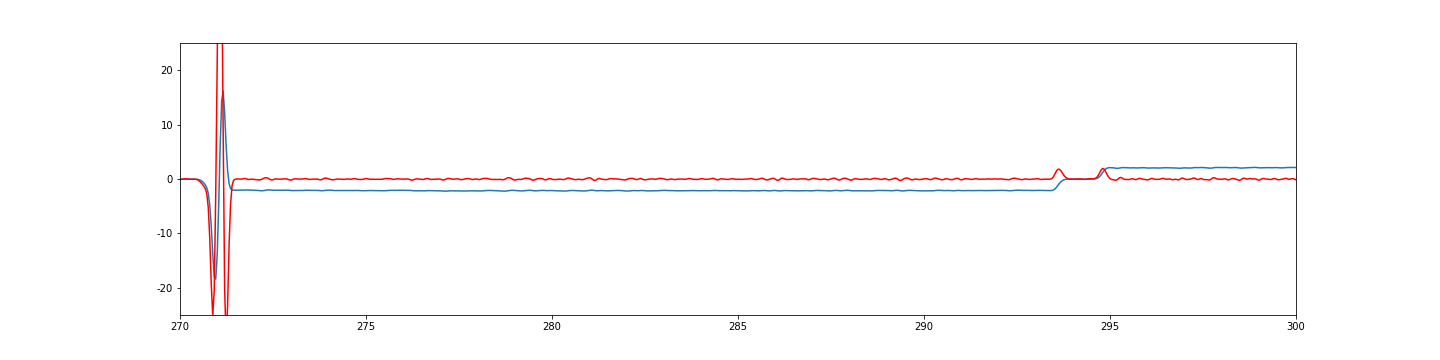

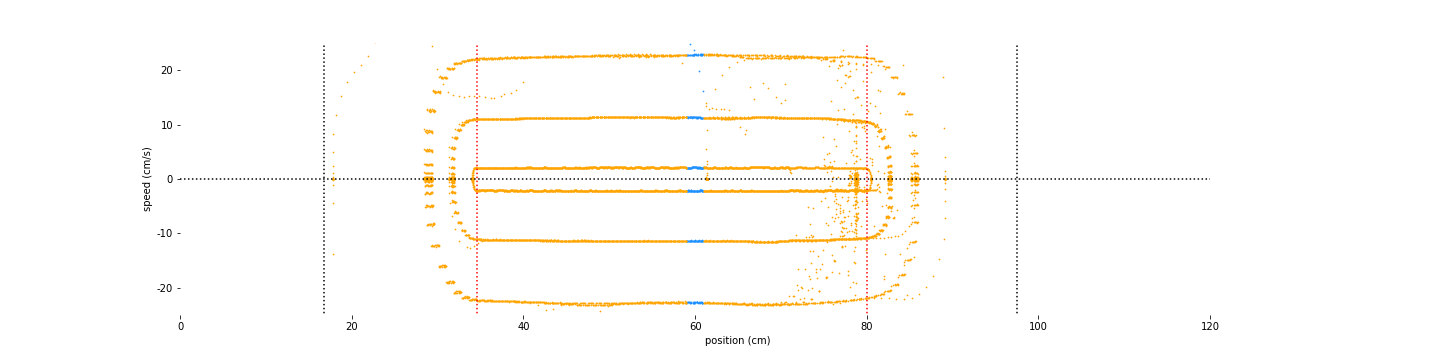

In [159]:
fig = plt.figure(constrained_layout = False, figsize=(20, 5))
plt.plot(rawTime[animal, session], goodPos[animal, session],color = 'dodgerblue')
plt.plot(rawTime[animal, session], badPos[animal, session], color = 'orange')
plt.plot(rawTime[animal, session], rawSpeed[animal, session])
plt.plot(rawTime[animal, session][1:], np.diff(rawSpeed[animal, session])*5, color = 'red')
plt.xlim(270, 300)
plt.ylim(-25, 25)
fig = plt.figure(constrained_layout = False, figsize=(20, 5))

gs = fig.add_gridspec(10, 10)
ax12 = fig.add_subplot(gs[:,:])
ax12.scatter(rawPositionX[animal,session], goodSpeed[animal,session], color = 'dodgerblue', s=0.5)

ax12.scatter(rawPositionX[animal,session], badSpeed[animal,session], color = 'orange', s=0.5)
ax12.set_xlabel('position (cm)')
ax12.set_ylabel('speed (cm/s)')
ax12.set_xlim(0,130)
ax12.set_ylim(-25,25)
ax12.spines['top'].set_color("none")
ax12.spines['right'].set_color("none")
ax12.spines['left'].set_color("none")
ax12.spines['bottom'].set_color("none")
yline = [0, 120]
xline = [0,0]
ax12.plot(yline, xline, ":", color='k')
ax12.plot([16.8, 16.8], [-200, 200], ":", color='k')
ax12.plot([97.5, 97.5], [-200, 200], ":", color='k')

ax12.plot([params[animal, session]["boundaryLeft"],  params[animal, session]["boundaryLeft"]], [-200, 200], ":", color='r')
ax12.plot([params[animal, session]["boundaryRight"], params[animal, session]["boundaryRight"]], [-200, 200], ":", color='r')



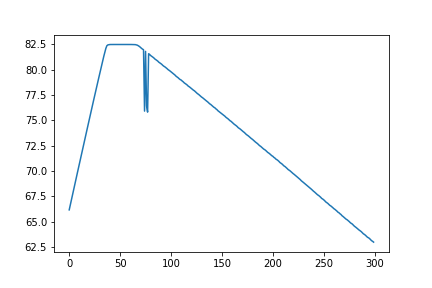

In [145]:
plt.plot(rawPositionX[animal,session][6700:7000])

In [157]:
params[animal, session]["boundaryLeft"] = read_params(animal, session, "boundaryLeft")/11
params[animal, session]["boundaryRight"] = read_params(animal, session, "boundaryRight")/11

In [158]:
params

{('Rat000', 'Rat000_2022_09_14_14_43_50'): {'sessionDuration': 405,
  'acqPer': 25,
  'waterLeft': 5.0,
  'waterRight': 5.0,
  'treadmillDist': 120,
  'weight': 0,
  'lastWeightadlib': 0,
  'lastDayadlib': 20220628,
  'lickthresholdLeft': 400,
  'lickthresholdRight': 400,
  'realEnd': '145039',
  'boundaries': [73, 38],
  'daysSinceadLib': 78,
  'realSessionDuration': datetime.timedelta(seconds=409),
  'blocks': [[0, 120],
   [120, 135],
   [135, 255],
   [255, 270],
   [270, 390],
   [390, 405]],
  'rewardP_ON': [0, 0, 90],
  'rewardP_OFF': [0, 0, 0],
  'treadmillSpeed': [20, 20, 10, 10, 2, 2],
  'rewardProbaBlock': [0, 0, 0, 0, 90, 0],
  'hasLick': True,
  'boundaryLeft': 34.54545454545455,
  'boundaryRight': 80.0}}

In [164]:
360 /11 - 16.8

15.927272727272726

In [163]:
900/11 - 97.5

-15.681818181818187

In [222]:
from ipywidgets import interactive

def correctTM(k=1, mu1=20, mu2=85, amp=20):
    """Generate the spatial cost (approximation of the Heaviside function)
    Args:
        x: scalar, list or array 
        k: scalar, steepness of the spatial penalty function 
        mu: scalar, beam location
        amp: scalar, height of the spatial penalty function
    Returns:
        p: scalar, list or array, value of the spatial cost for x 
    """  
    x = np.linspace(0, 120, 100)
    fn = []

    for _ in x:
        LEFT = 1/(1+np.exp(-k*(_-mu1)))
        RIGHT = 1/(1+np.exp(k*(_-mu2)))
        fn.append(LEFT * RIGHT * amp)
    plt.plot(x, fn, color = 'red')
    plt.ylim(-22, 22)
    plt.show()

interactive_plot = interactive(correctTM, k=(0, 5, .1), mu1=(0, 120, 1), mu2=(0, 120, 1), amp=(-20, 20, 1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot




interactive(children=(FloatSlider(value=1.0, description='k', max=5.0), IntSlider(value=20, description='mu1',…

In [207]:
np.dot([1, 2, 3, 4], [1, 2, 3, 4])

30

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;